In [0]:
import sys
import numpy as np
from IPython.core.debugger import Tracer
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
def load_fashion_mnist(input_rows=28, input_cols=28, path='fashion-mnist_train.csv'):
    df = pd.read_csv(path)
    X_train = df.drop(columns = ['label'])
    X_train = X_train.as_matrix()
    X_train = X_train.reshape(X_train.shape[0], input_rows, input_cols)
    #extract the labels
    y_train = df['label'].as_matrix()
    return X_train, y_train
X_train, y_train = load_fashion_mnist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [0]:
# Definir parámetros característicos de la imágen (ancho, alto, número de canales). Estos parámetros definen la entrada del discriminador y la salida del generador

WIDTH = 28
HEIGHT = 28
CHANNELS = 1
SHAPE = (WIDTH, HEIGHT, CHANNELS)
# Definir parámetros de entrenamiento

OPTIMIZER = Adam(lr=0.0002, decay=8e-9)
NOISE_SIZE = 100

In [0]:
# Definir generador

gnrtr = Sequential()
gnrtr.add(Dense(256, input_shape=(NOISE_SIZE,))) # tamaño del ruido de entrada, en caso de totalmente aleatoria
gnrtr.add(LeakyReLU(alpha=0.2))
gnrtr.add(BatchNormalization(momentum=0.8))
gnrtr.add(Dense(512))
gnrtr.add(LeakyReLU(alpha=0.2))
gnrtr.add(BatchNormalization(momentum=0.8))
gnrtr.add(Dense(1024))
gnrtr.add(LeakyReLU(alpha=0.2))
gnrtr.add(BatchNormalization(momentum=0.8))
gnrtr.add(Dense(WIDTH * HEIGHT * CHANNELS, activation='tanh')) # correct output size
gnrtr.add(Reshape((WIDTH, HEIGHT, CHANNELS)))
gnrtr.compile(loss='binary_crossentropy', optimizer=OPTIMIZER)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Definir discriminador

dscrmntr = Sequential()
dscrmntr.add(Flatten(input_shape=SHAPE))
dscrmntr.add(Dense((WIDTH * HEIGHT * CHANNELS), input_shape=SHAPE))
dscrmntr.add(LeakyReLU(alpha=0.2))
dscrmntr.add(Dense(int((WIDTH * HEIGHT * CHANNELS)/2)))
dscrmntr.add(LeakyReLU(alpha=0.2))
dscrmntr.add(Dense(1, activation='sigmoid')) # acepta o no 
dscrmntr.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'] )

In [0]:
# Definir modelo combinado (GAN)

dscrmntr.trainable = False
model = Sequential()
model.add(gnrtr)
model.add(dscrmntr)
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER)

In [0]:
def plot_images(gnrtr, save2file=False,  samples=16, step=0):
  noise = np.random.normal(0, 1, (samples,NOISE_SIZE))
  images = gnrtr.predict(noise)
  plt.figure(figsize=(10,10))
  for i in range(images.shape[0]):
    plt.subplot(4, 4, i+1)
    image = images[i, :, :, :]
    image = np.reshape(image, [ HEIGHT, WIDTH ])
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
  plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch: 0, [Discriminator :: d_loss: 0.518414], [ Generator :: loss: 5.198064]


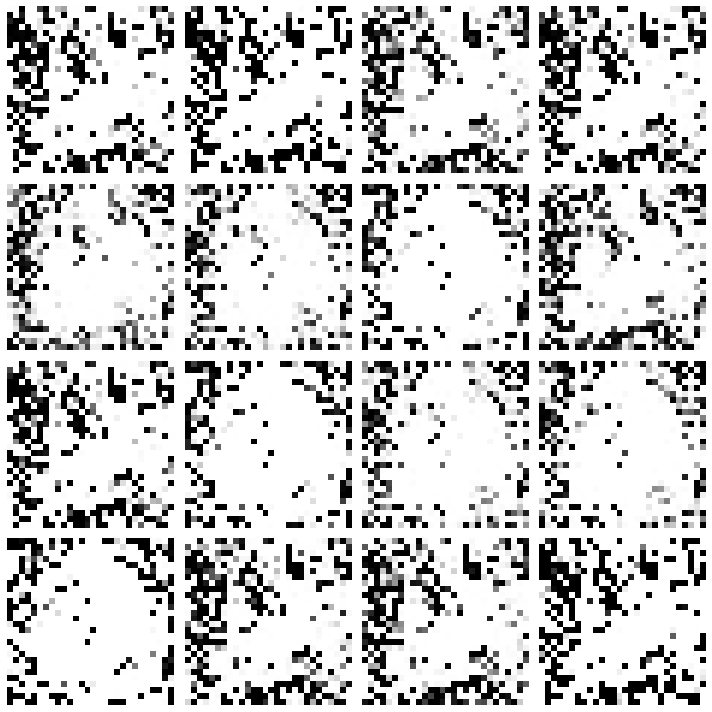

epoch: 1, [Discriminator :: d_loss: 0.006951], [ Generator :: loss: 5.206487]
epoch: 2, [Discriminator :: d_loss: 0.026182], [ Generator :: loss: 5.090856]
epoch: 3, [Discriminator :: d_loss: 0.013872], [ Generator :: loss: 4.940891]
epoch: 4, [Discriminator :: d_loss: 0.027988], [ Generator :: loss: 4.864781]
epoch: 5, [Discriminator :: d_loss: 0.025755], [ Generator :: loss: 5.067002]
epoch: 6, [Discriminator :: d_loss: 0.032217], [ Generator :: loss: 4.842111]
epoch: 7, [Discriminator :: d_loss: 1.060301], [ Generator :: loss: 5.050928]
epoch: 8, [Discriminator :: d_loss: 1.014433], [ Generator :: loss: 4.822262]
epoch: 9, [Discriminator :: d_loss: 0.584046], [ Generator :: loss: 4.935321]
epoch: 10, [Discriminator :: d_loss: 0.037175], [ Generator :: loss: 5.280539]
epoch: 11, [Discriminator :: d_loss: 0.509400], [ Generator :: loss: 5.053883]
epoch: 12, [Discriminator :: d_loss: 0.029222], [ Generator :: loss: 5.181123]
epoch: 13, [Discriminator :: d_loss: 0.347809], [ Generator :

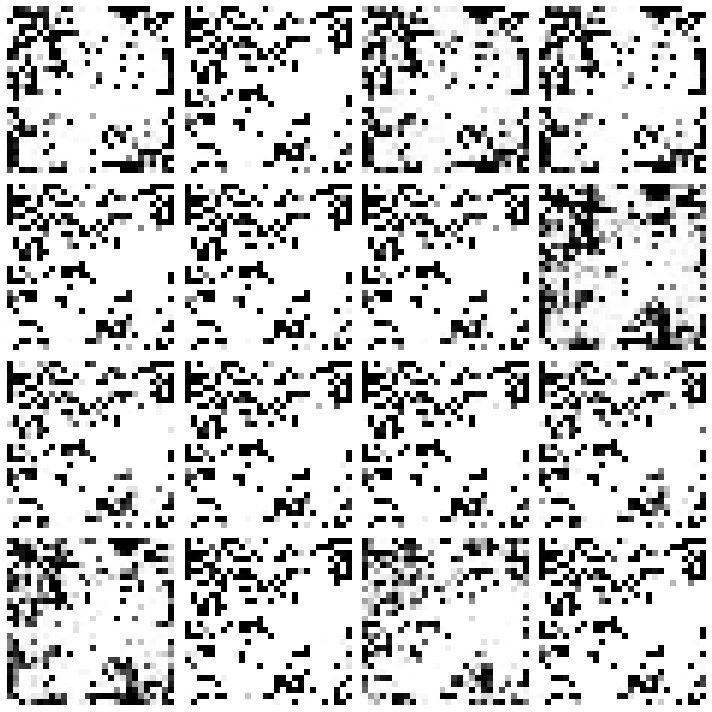

epoch: 201, [Discriminator :: d_loss: 0.021707], [ Generator :: loss: 5.937938]
epoch: 202, [Discriminator :: d_loss: 0.039348], [ Generator :: loss: 5.929664]
epoch: 203, [Discriminator :: d_loss: 0.510021], [ Generator :: loss: 6.099034]
epoch: 204, [Discriminator :: d_loss: 0.023080], [ Generator :: loss: 5.728654]
epoch: 205, [Discriminator :: d_loss: 0.539731], [ Generator :: loss: 5.854832]
epoch: 206, [Discriminator :: d_loss: 0.505283], [ Generator :: loss: 5.277720]
epoch: 207, [Discriminator :: d_loss: 0.553489], [ Generator :: loss: 5.555217]
epoch: 208, [Discriminator :: d_loss: 0.558952], [ Generator :: loss: 5.870153]
epoch: 209, [Discriminator :: d_loss: 0.519093], [ Generator :: loss: 5.891163]
epoch: 210, [Discriminator :: d_loss: 0.010565], [ Generator :: loss: 5.988873]
epoch: 211, [Discriminator :: d_loss: 0.013958], [ Generator :: loss: 5.607306]
epoch: 212, [Discriminator :: d_loss: 0.013241], [ Generator :: loss: 5.485308]
epoch: 213, [Discriminator :: d_loss: 0.

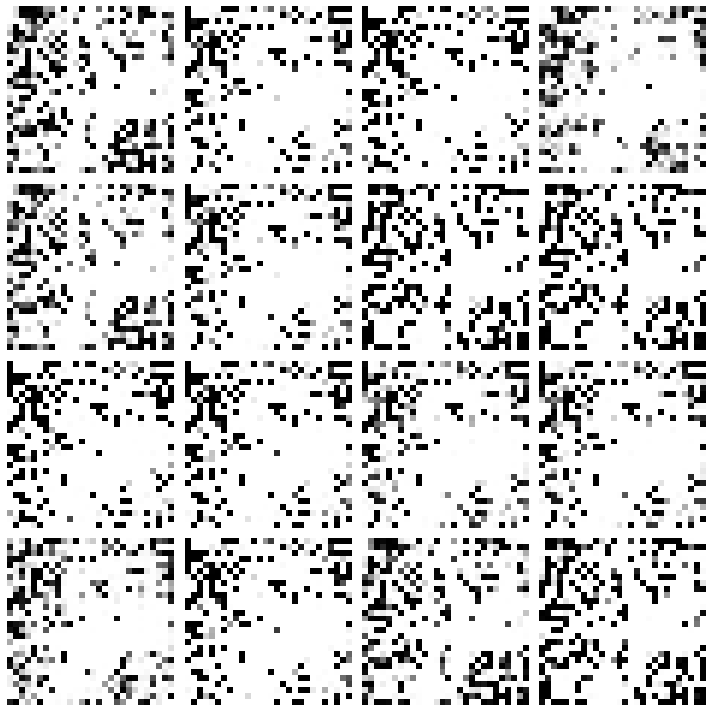

epoch: 401, [Discriminator :: d_loss: 0.000278], [ Generator :: loss: 11.625103]
epoch: 402, [Discriminator :: d_loss: 0.000052], [ Generator :: loss: 10.916054]
epoch: 403, [Discriminator :: d_loss: 0.000151], [ Generator :: loss: 10.518905]
epoch: 404, [Discriminator :: d_loss: 0.003355], [ Generator :: loss: 9.543356]
epoch: 405, [Discriminator :: d_loss: 0.011387], [ Generator :: loss: 8.278632]
epoch: 406, [Discriminator :: d_loss: 0.009629], [ Generator :: loss: 9.215414]
epoch: 407, [Discriminator :: d_loss: 0.023347], [ Generator :: loss: 7.162122]
epoch: 408, [Discriminator :: d_loss: 0.078614], [ Generator :: loss: 8.040474]
epoch: 409, [Discriminator :: d_loss: 0.236714], [ Generator :: loss: 6.403510]
epoch: 410, [Discriminator :: d_loss: 0.087757], [ Generator :: loss: 7.240062]
epoch: 411, [Discriminator :: d_loss: 0.189854], [ Generator :: loss: 6.578196]
epoch: 412, [Discriminator :: d_loss: 0.187022], [ Generator :: loss: 6.852837]
epoch: 413, [Discriminator :: d_loss:

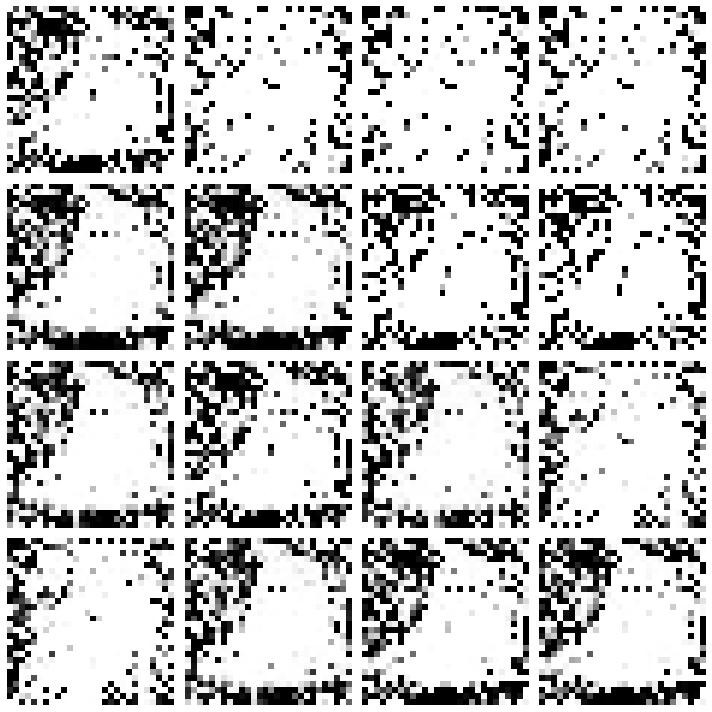

epoch: 601, [Discriminator :: d_loss: 0.056062], [ Generator :: loss: 7.108674]
epoch: 602, [Discriminator :: d_loss: 0.093759], [ Generator :: loss: 7.319461]
epoch: 603, [Discriminator :: d_loss: 0.053892], [ Generator :: loss: 6.937268]
epoch: 604, [Discriminator :: d_loss: 0.064664], [ Generator :: loss: 6.854437]
epoch: 605, [Discriminator :: d_loss: 0.040996], [ Generator :: loss: 6.994691]
epoch: 606, [Discriminator :: d_loss: 0.051010], [ Generator :: loss: 8.628057]
epoch: 607, [Discriminator :: d_loss: 0.038754], [ Generator :: loss: 7.560632]
epoch: 608, [Discriminator :: d_loss: 0.035015], [ Generator :: loss: 6.960032]
epoch: 609, [Discriminator :: d_loss: 1.055426], [ Generator :: loss: 7.204866]
epoch: 610, [Discriminator :: d_loss: 0.025904], [ Generator :: loss: 8.163655]
epoch: 611, [Discriminator :: d_loss: 0.009416], [ Generator :: loss: 7.148253]
epoch: 612, [Discriminator :: d_loss: 0.512232], [ Generator :: loss: 7.149644]
epoch: 613, [Discriminator :: d_loss: 0.

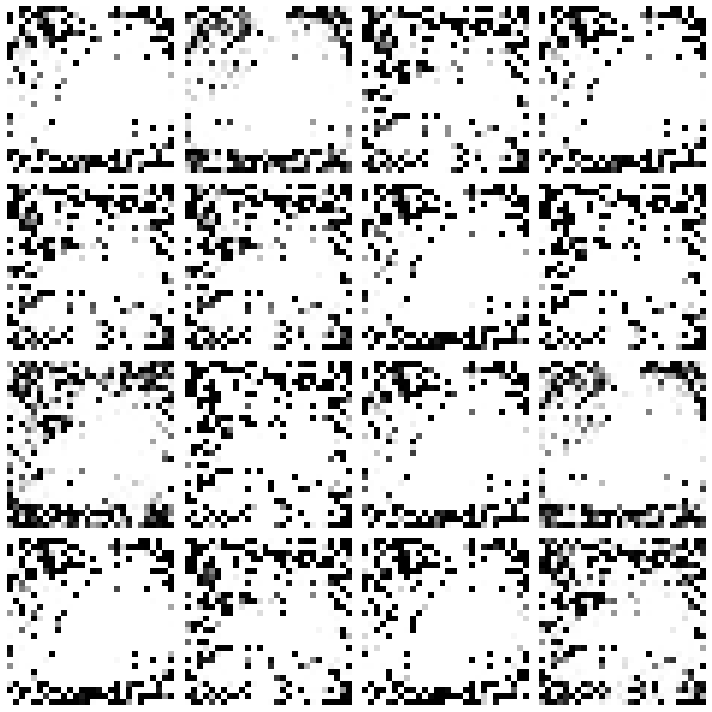

epoch: 801, [Discriminator :: d_loss: 0.003011], [ Generator :: loss: 5.517743]
epoch: 802, [Discriminator :: d_loss: 0.506020], [ Generator :: loss: 5.489172]
epoch: 803, [Discriminator :: d_loss: 0.003428], [ Generator :: loss: 5.525052]
epoch: 804, [Discriminator :: d_loss: 0.507698], [ Generator :: loss: 5.238981]
epoch: 805, [Discriminator :: d_loss: 0.004239], [ Generator :: loss: 5.274576]
epoch: 806, [Discriminator :: d_loss: 0.004578], [ Generator :: loss: 5.171869]
epoch: 807, [Discriminator :: d_loss: 0.003525], [ Generator :: loss: 5.426266]
epoch: 808, [Discriminator :: d_loss: 0.007674], [ Generator :: loss: 5.114191]
epoch: 809, [Discriminator :: d_loss: 0.512582], [ Generator :: loss: 5.123672]
epoch: 810, [Discriminator :: d_loss: 0.005391], [ Generator :: loss: 4.543977]
epoch: 811, [Discriminator :: d_loss: 0.011759], [ Generator :: loss: 4.687014]
epoch: 812, [Discriminator :: d_loss: 0.022259], [ Generator :: loss: 4.700452]
epoch: 813, [Discriminator :: d_loss: 0.

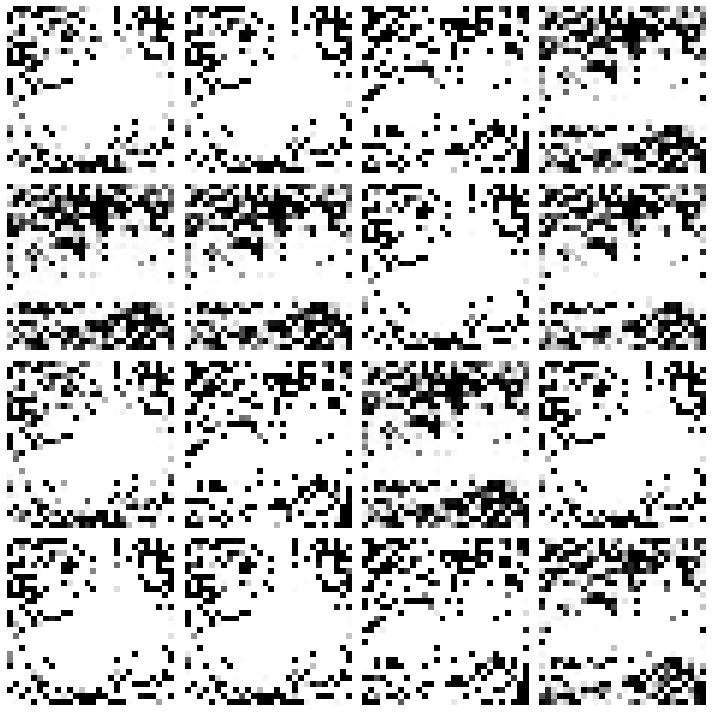

epoch: 1001, [Discriminator :: d_loss: 0.021129], [ Generator :: loss: 5.993151]
epoch: 1002, [Discriminator :: d_loss: 0.012729], [ Generator :: loss: 6.686620]
epoch: 1003, [Discriminator :: d_loss: 0.019903], [ Generator :: loss: 6.541070]
epoch: 1004, [Discriminator :: d_loss: 0.512776], [ Generator :: loss: 6.255819]
epoch: 1005, [Discriminator :: d_loss: 0.012253], [ Generator :: loss: 6.708953]
epoch: 1006, [Discriminator :: d_loss: 0.007259], [ Generator :: loss: 6.290484]
epoch: 1007, [Discriminator :: d_loss: 0.007709], [ Generator :: loss: 6.520492]
epoch: 1008, [Discriminator :: d_loss: 0.004562], [ Generator :: loss: 6.994512]
epoch: 1009, [Discriminator :: d_loss: 0.027194], [ Generator :: loss: 6.812327]
epoch: 1010, [Discriminator :: d_loss: 0.012079], [ Generator :: loss: 6.892130]
epoch: 1011, [Discriminator :: d_loss: 0.018477], [ Generator :: loss: 6.626815]
epoch: 1012, [Discriminator :: d_loss: 0.003086], [ Generator :: loss: 6.575782]
epoch: 1013, [Discriminator 

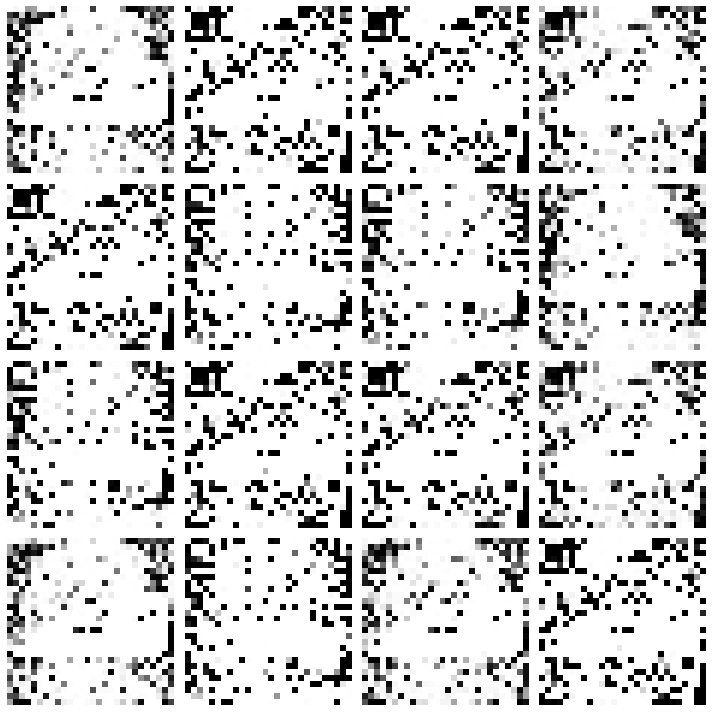

epoch: 1201, [Discriminator :: d_loss: 0.007784], [ Generator :: loss: 7.172925]
epoch: 1202, [Discriminator :: d_loss: 0.005551], [ Generator :: loss: 7.158217]
epoch: 1203, [Discriminator :: d_loss: 0.510698], [ Generator :: loss: 6.828552]
epoch: 1204, [Discriminator :: d_loss: 0.509965], [ Generator :: loss: 7.014844]
epoch: 1205, [Discriminator :: d_loss: 0.004923], [ Generator :: loss: 6.910090]
epoch: 1206, [Discriminator :: d_loss: 1.012074], [ Generator :: loss: 6.816159]
epoch: 1207, [Discriminator :: d_loss: 0.004046], [ Generator :: loss: 7.622297]
epoch: 1208, [Discriminator :: d_loss: 0.009162], [ Generator :: loss: 6.997842]
epoch: 1209, [Discriminator :: d_loss: 0.508220], [ Generator :: loss: 7.093795]
epoch: 1210, [Discriminator :: d_loss: 0.510795], [ Generator :: loss: 7.175388]
epoch: 1211, [Discriminator :: d_loss: 0.010798], [ Generator :: loss: 6.955298]
epoch: 1212, [Discriminator :: d_loss: 0.565721], [ Generator :: loss: 4.432607]
epoch: 1213, [Discriminator 

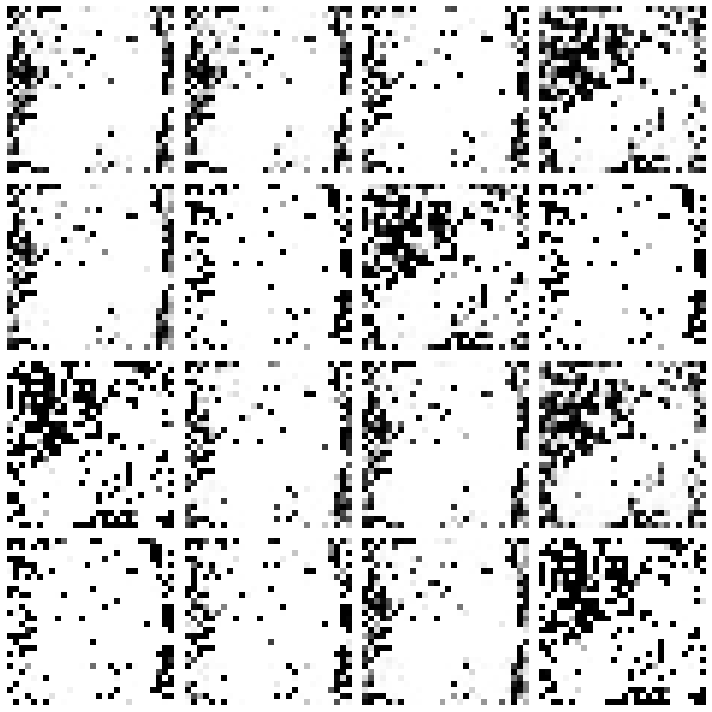

epoch: 1401, [Discriminator :: d_loss: 0.010774], [ Generator :: loss: 11.027549]
epoch: 1402, [Discriminator :: d_loss: 0.008965], [ Generator :: loss: 11.628861]
epoch: 1403, [Discriminator :: d_loss: 0.000565], [ Generator :: loss: 10.754320]
epoch: 1404, [Discriminator :: d_loss: 0.005507], [ Generator :: loss: 11.210808]
epoch: 1405, [Discriminator :: d_loss: 0.004919], [ Generator :: loss: 11.343696]
epoch: 1406, [Discriminator :: d_loss: 0.002402], [ Generator :: loss: 11.388793]
epoch: 1407, [Discriminator :: d_loss: 0.004219], [ Generator :: loss: 10.406321]
epoch: 1408, [Discriminator :: d_loss: 0.011826], [ Generator :: loss: 10.566201]
epoch: 1409, [Discriminator :: d_loss: 0.012973], [ Generator :: loss: 10.862934]
epoch: 1410, [Discriminator :: d_loss: 0.009485], [ Generator :: loss: 10.767534]
epoch: 1411, [Discriminator :: d_loss: 0.010373], [ Generator :: loss: 10.610228]
epoch: 1412, [Discriminator :: d_loss: 0.006454], [ Generator :: loss: 10.101726]
epoch: 1413, [Di

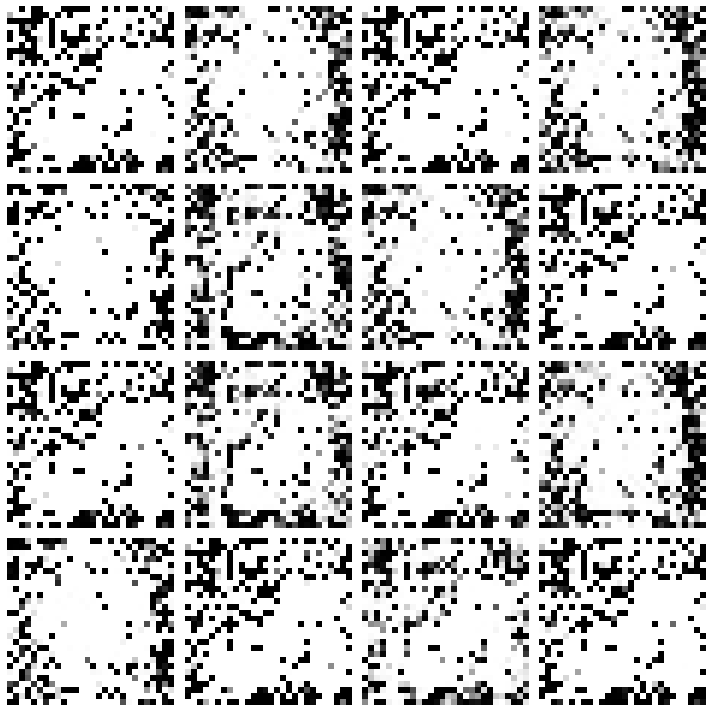

epoch: 1601, [Discriminator :: d_loss: 0.005253], [ Generator :: loss: 7.822512]
epoch: 1602, [Discriminator :: d_loss: 0.506046], [ Generator :: loss: 7.213973]
epoch: 1603, [Discriminator :: d_loss: 0.007621], [ Generator :: loss: 7.553716]
epoch: 1604, [Discriminator :: d_loss: 0.008434], [ Generator :: loss: 8.082419]
epoch: 1605, [Discriminator :: d_loss: 0.011932], [ Generator :: loss: 7.713889]
epoch: 1606, [Discriminator :: d_loss: 0.505375], [ Generator :: loss: 8.088948]
epoch: 1607, [Discriminator :: d_loss: 0.509568], [ Generator :: loss: 7.366472]
epoch: 1608, [Discriminator :: d_loss: 0.003116], [ Generator :: loss: 7.568251]
epoch: 1609, [Discriminator :: d_loss: 1.010093], [ Generator :: loss: 7.578962]
epoch: 1610, [Discriminator :: d_loss: 0.507546], [ Generator :: loss: 8.020223]
epoch: 1611, [Discriminator :: d_loss: 0.510269], [ Generator :: loss: 7.797305]
epoch: 1612, [Discriminator :: d_loss: 1.010294], [ Generator :: loss: 7.922466]
epoch: 1613, [Discriminator 

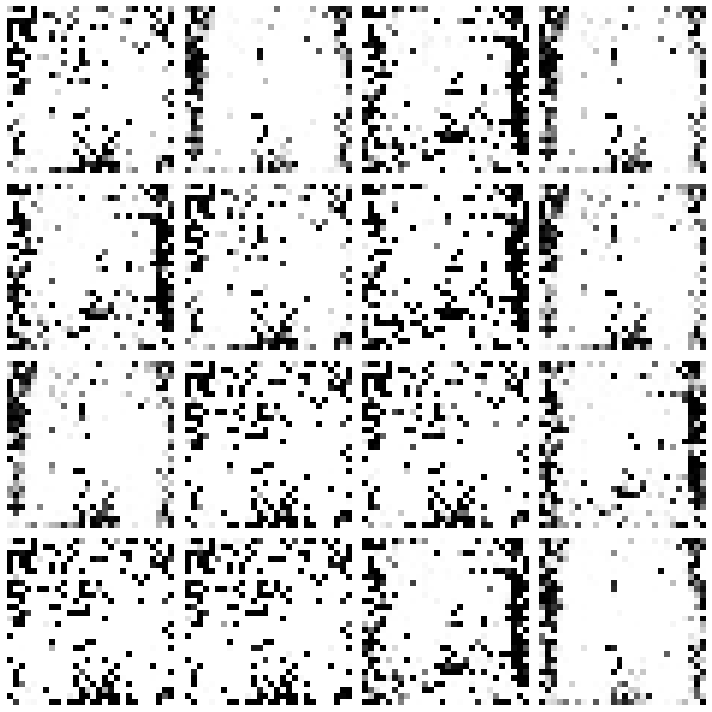

epoch: 1801, [Discriminator :: d_loss: 0.513113], [ Generator :: loss: 8.768107]
epoch: 1802, [Discriminator :: d_loss: 1.007941], [ Generator :: loss: 9.067158]
epoch: 1803, [Discriminator :: d_loss: 1.013113], [ Generator :: loss: 8.587709]
epoch: 1804, [Discriminator :: d_loss: 1.512172], [ Generator :: loss: 9.344800]
epoch: 1805, [Discriminator :: d_loss: 0.508516], [ Generator :: loss: 8.400700]
epoch: 1806, [Discriminator :: d_loss: 1.012563], [ Generator :: loss: 8.717548]
epoch: 1807, [Discriminator :: d_loss: 0.007754], [ Generator :: loss: 9.118187]
epoch: 1808, [Discriminator :: d_loss: 0.506481], [ Generator :: loss: 8.807047]
epoch: 1809, [Discriminator :: d_loss: 0.508301], [ Generator :: loss: 8.957497]
epoch: 1810, [Discriminator :: d_loss: 1.015486], [ Generator :: loss: 8.310122]
epoch: 1811, [Discriminator :: d_loss: 1.514130], [ Generator :: loss: 9.025253]
epoch: 1812, [Discriminator :: d_loss: 1.012665], [ Generator :: loss: 8.376499]
epoch: 1813, [Discriminator 

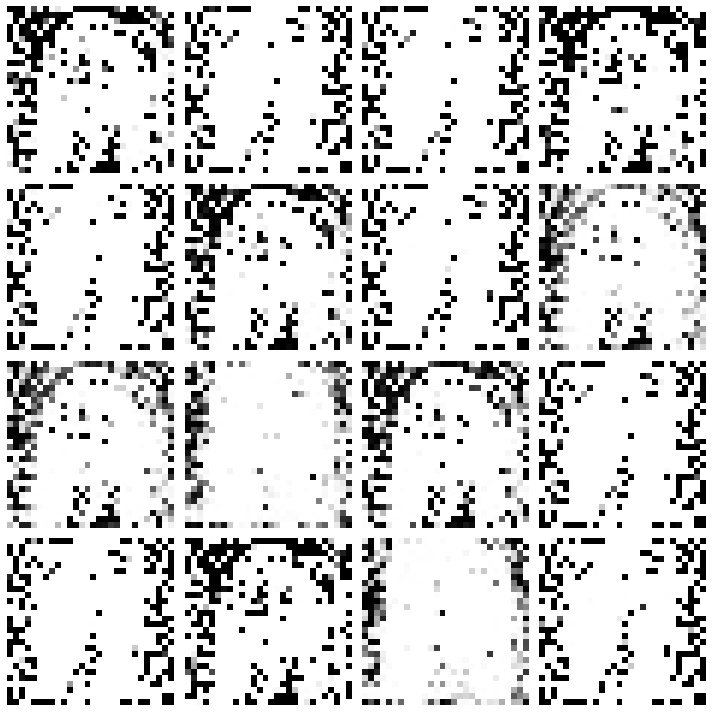

epoch: 2001, [Discriminator :: d_loss: 0.004007], [ Generator :: loss: 8.120352]
epoch: 2002, [Discriminator :: d_loss: 0.011600], [ Generator :: loss: 7.763080]
epoch: 2003, [Discriminator :: d_loss: 0.013285], [ Generator :: loss: 7.486609]
epoch: 2004, [Discriminator :: d_loss: 0.033641], [ Generator :: loss: 7.213314]
epoch: 2005, [Discriminator :: d_loss: 0.006715], [ Generator :: loss: 6.393910]
epoch: 2006, [Discriminator :: d_loss: 0.035909], [ Generator :: loss: 5.994447]
epoch: 2007, [Discriminator :: d_loss: 0.042397], [ Generator :: loss: 6.634665]
epoch: 2008, [Discriminator :: d_loss: 0.033754], [ Generator :: loss: 5.995140]
epoch: 2009, [Discriminator :: d_loss: 0.061569], [ Generator :: loss: 6.266091]
epoch: 2010, [Discriminator :: d_loss: 0.034802], [ Generator :: loss: 6.271075]
epoch: 2011, [Discriminator :: d_loss: 0.045618], [ Generator :: loss: 6.198365]
epoch: 2012, [Discriminator :: d_loss: 0.015935], [ Generator :: loss: 5.927765]
epoch: 2013, [Discriminator 

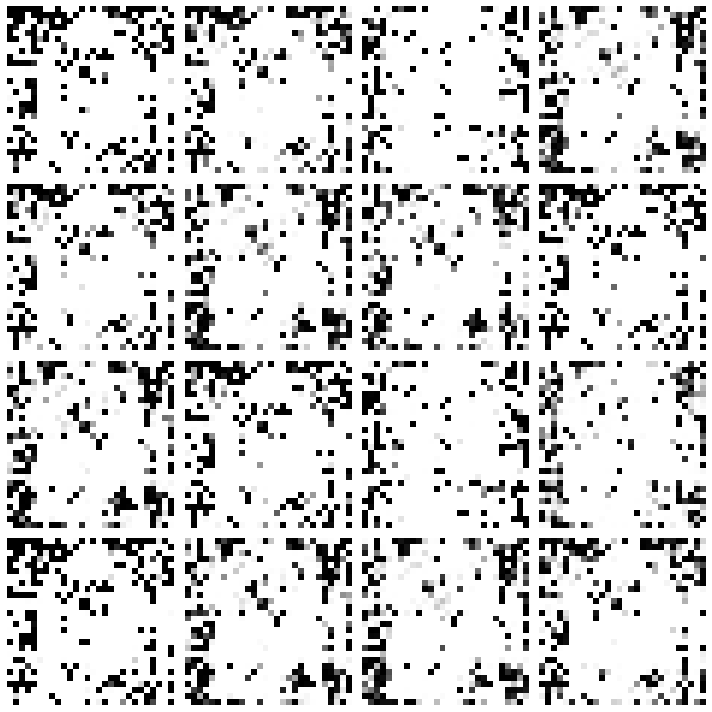

epoch: 2201, [Discriminator :: d_loss: 0.004916], [ Generator :: loss: 5.640612]
epoch: 2202, [Discriminator :: d_loss: 0.021067], [ Generator :: loss: 5.569255]
epoch: 2203, [Discriminator :: d_loss: 0.006889], [ Generator :: loss: 6.221303]
epoch: 2204, [Discriminator :: d_loss: 0.013866], [ Generator :: loss: 5.880146]
epoch: 2205, [Discriminator :: d_loss: 0.001275], [ Generator :: loss: 5.475835]
epoch: 2206, [Discriminator :: d_loss: 0.007090], [ Generator :: loss: 5.571561]
epoch: 2207, [Discriminator :: d_loss: 0.509326], [ Generator :: loss: 5.637178]
epoch: 2208, [Discriminator :: d_loss: 0.509243], [ Generator :: loss: 5.641912]
epoch: 2209, [Discriminator :: d_loss: 0.004470], [ Generator :: loss: 5.586237]
epoch: 2210, [Discriminator :: d_loss: 0.005065], [ Generator :: loss: 5.417942]
epoch: 2211, [Discriminator :: d_loss: 0.002728], [ Generator :: loss: 5.290258]
epoch: 2212, [Discriminator :: d_loss: 0.004602], [ Generator :: loss: 5.315799]
epoch: 2213, [Discriminator 

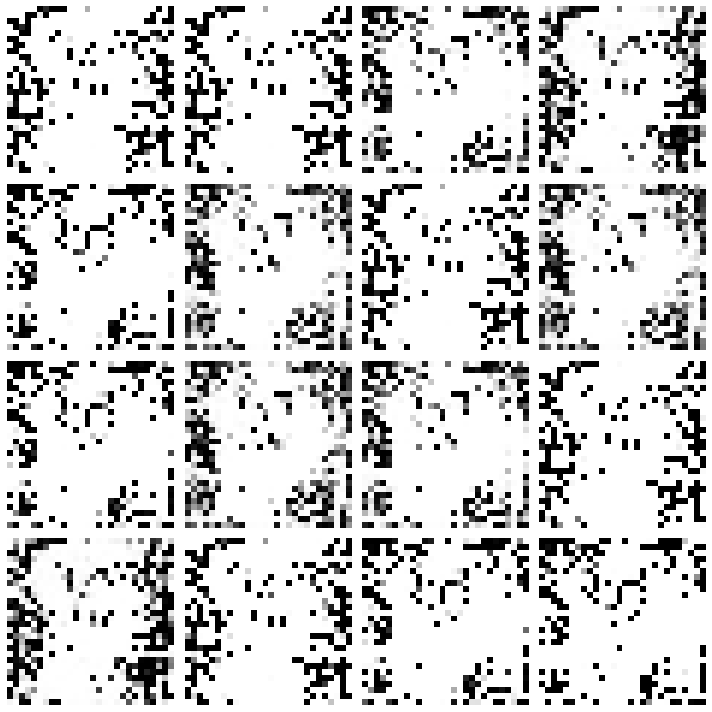

epoch: 2401, [Discriminator :: d_loss: 0.002802], [ Generator :: loss: 7.258653]
epoch: 2402, [Discriminator :: d_loss: 0.002978], [ Generator :: loss: 7.422049]
epoch: 2403, [Discriminator :: d_loss: 0.004375], [ Generator :: loss: 7.380075]
epoch: 2404, [Discriminator :: d_loss: 0.004509], [ Generator :: loss: 7.589673]
epoch: 2405, [Discriminator :: d_loss: 0.001585], [ Generator :: loss: 7.263853]
epoch: 2406, [Discriminator :: d_loss: 0.001816], [ Generator :: loss: 7.450877]
epoch: 2407, [Discriminator :: d_loss: 0.004868], [ Generator :: loss: 6.760543]
epoch: 2408, [Discriminator :: d_loss: 0.001635], [ Generator :: loss: 7.101584]
epoch: 2409, [Discriminator :: d_loss: 0.003154], [ Generator :: loss: 7.144135]
epoch: 2410, [Discriminator :: d_loss: 0.003199], [ Generator :: loss: 7.317286]
epoch: 2411, [Discriminator :: d_loss: 0.006228], [ Generator :: loss: 6.894633]
epoch: 2412, [Discriminator :: d_loss: 0.005259], [ Generator :: loss: 7.039522]
epoch: 2413, [Discriminator 

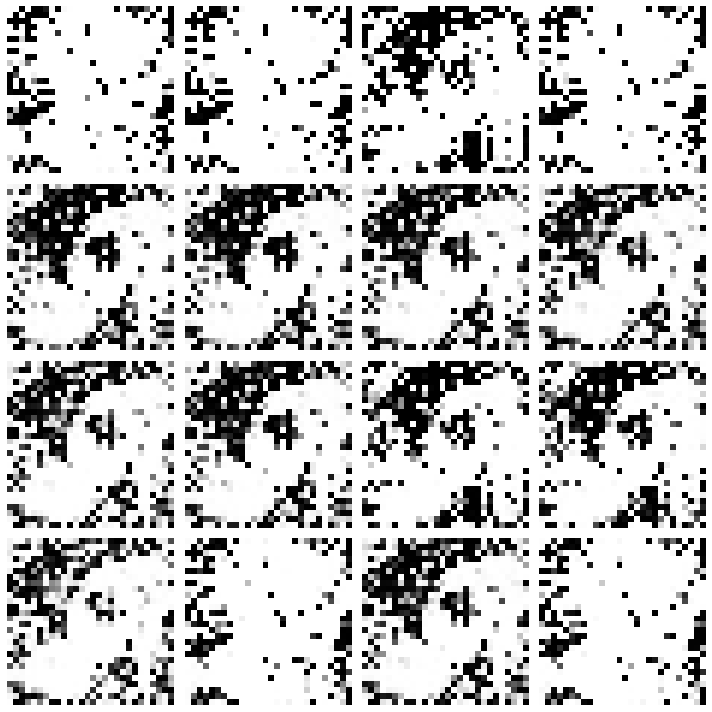

epoch: 2601, [Discriminator :: d_loss: 0.012224], [ Generator :: loss: 7.898542]
epoch: 2602, [Discriminator :: d_loss: 0.018056], [ Generator :: loss: 7.557042]
epoch: 2603, [Discriminator :: d_loss: 0.002959], [ Generator :: loss: 7.461340]
epoch: 2604, [Discriminator :: d_loss: 0.516893], [ Generator :: loss: 7.445374]
epoch: 2605, [Discriminator :: d_loss: 0.022091], [ Generator :: loss: 7.098193]
epoch: 2606, [Discriminator :: d_loss: 0.025421], [ Generator :: loss: 7.622160]
epoch: 2607, [Discriminator :: d_loss: 0.024102], [ Generator :: loss: 7.019764]
epoch: 2608, [Discriminator :: d_loss: 0.021926], [ Generator :: loss: 7.325789]
epoch: 2609, [Discriminator :: d_loss: 0.009937], [ Generator :: loss: 7.753666]
epoch: 2610, [Discriminator :: d_loss: 0.009669], [ Generator :: loss: 7.128201]
epoch: 2611, [Discriminator :: d_loss: 0.008377], [ Generator :: loss: 7.241228]
epoch: 2612, [Discriminator :: d_loss: 0.011614], [ Generator :: loss: 7.501799]
epoch: 2613, [Discriminator 

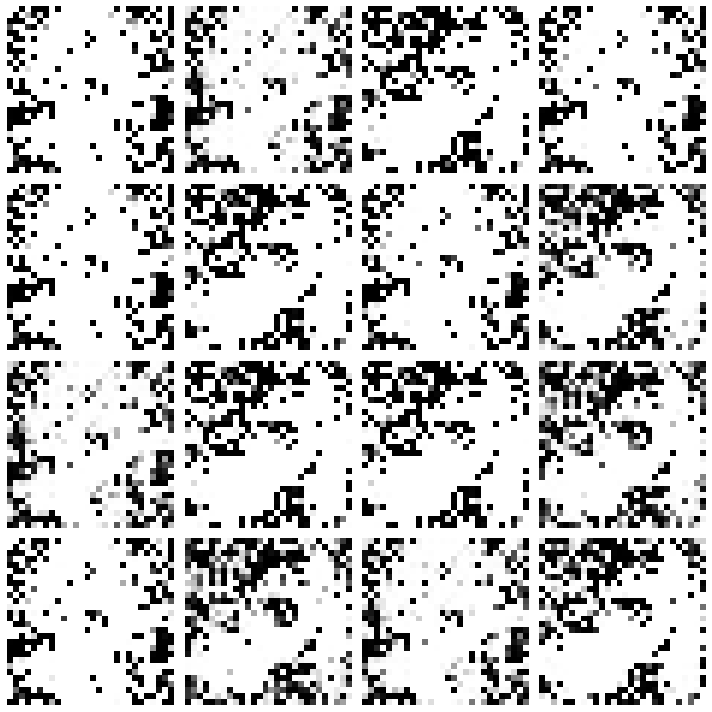

epoch: 2801, [Discriminator :: d_loss: 0.001377], [ Generator :: loss: 9.348250]
epoch: 2802, [Discriminator :: d_loss: 0.506008], [ Generator :: loss: 9.896746]
epoch: 2803, [Discriminator :: d_loss: 0.002575], [ Generator :: loss: 9.661363]
epoch: 2804, [Discriminator :: d_loss: 0.506888], [ Generator :: loss: 9.391890]
epoch: 2805, [Discriminator :: d_loss: 0.495018], [ Generator :: loss: 8.576159]
epoch: 2806, [Discriminator :: d_loss: 0.004892], [ Generator :: loss: 7.223902]
epoch: 2807, [Discriminator :: d_loss: 0.007207], [ Generator :: loss: 6.967512]
epoch: 2808, [Discriminator :: d_loss: 0.004836], [ Generator :: loss: 6.333401]
epoch: 2809, [Discriminator :: d_loss: 0.017552], [ Generator :: loss: 6.554727]
epoch: 2810, [Discriminator :: d_loss: 0.011891], [ Generator :: loss: 5.990490]
epoch: 2811, [Discriminator :: d_loss: 0.026592], [ Generator :: loss: 6.328585]
epoch: 2812, [Discriminator :: d_loss: 0.061128], [ Generator :: loss: 5.420409]
epoch: 2813, [Discriminator 

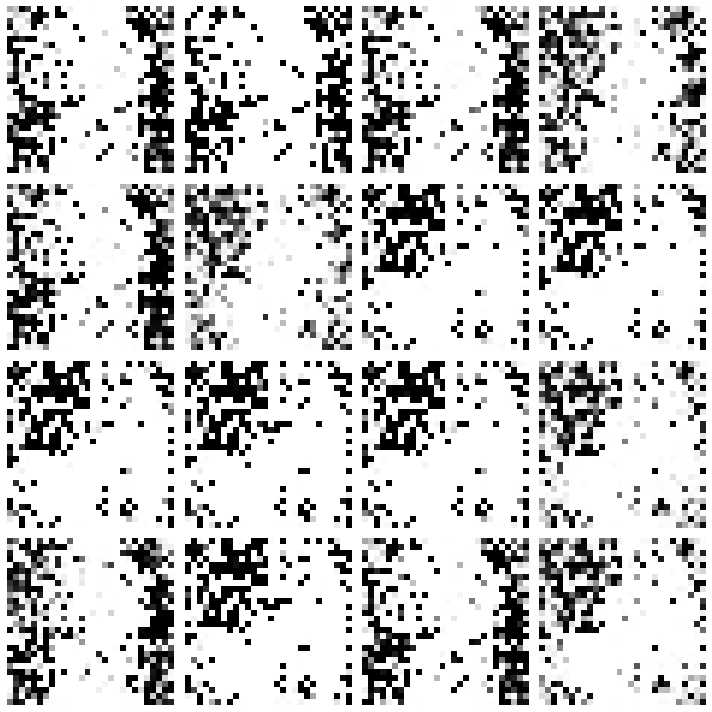

epoch: 3001, [Discriminator :: d_loss: 0.001914], [ Generator :: loss: 6.437036]
epoch: 3002, [Discriminator :: d_loss: 0.506057], [ Generator :: loss: 6.516627]
epoch: 3003, [Discriminator :: d_loss: 0.002401], [ Generator :: loss: 6.226395]
epoch: 3004, [Discriminator :: d_loss: 0.003398], [ Generator :: loss: 6.100416]
epoch: 3005, [Discriminator :: d_loss: 0.004182], [ Generator :: loss: 6.052902]
epoch: 3006, [Discriminator :: d_loss: 0.001647], [ Generator :: loss: 6.129909]
epoch: 3007, [Discriminator :: d_loss: 0.004985], [ Generator :: loss: 6.054309]
epoch: 3008, [Discriminator :: d_loss: 0.005283], [ Generator :: loss: 6.013467]
epoch: 3009, [Discriminator :: d_loss: 0.002925], [ Generator :: loss: 5.568804]
epoch: 3010, [Discriminator :: d_loss: 0.005757], [ Generator :: loss: 5.764168]
epoch: 3011, [Discriminator :: d_loss: 0.004194], [ Generator :: loss: 6.098392]
epoch: 3012, [Discriminator :: d_loss: 0.006529], [ Generator :: loss: 5.623339]
epoch: 3013, [Discriminator 

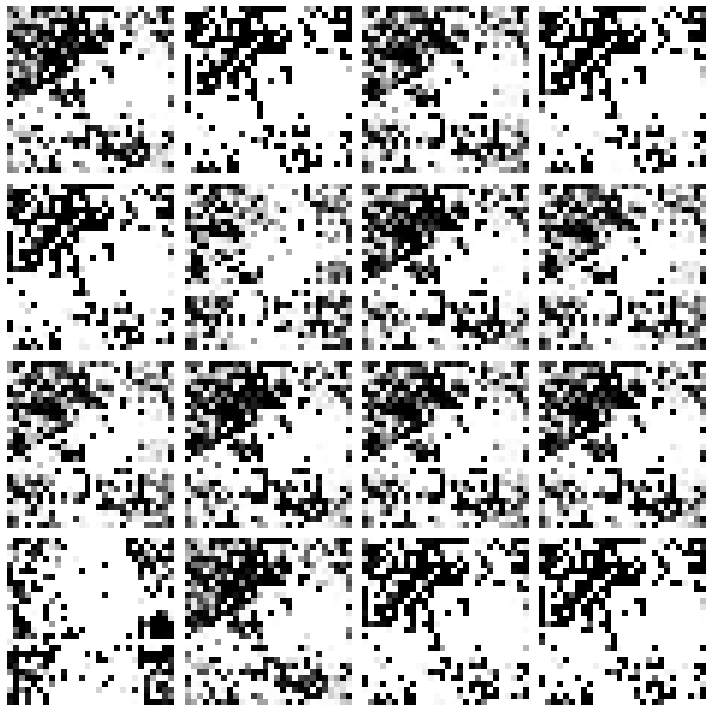

epoch: 3201, [Discriminator :: d_loss: 0.151626], [ Generator :: loss: 2.255012]
epoch: 3202, [Discriminator :: d_loss: 0.096637], [ Generator :: loss: 3.550821]
epoch: 3203, [Discriminator :: d_loss: 0.052807], [ Generator :: loss: 4.505124]
epoch: 3204, [Discriminator :: d_loss: 0.050721], [ Generator :: loss: 4.423640]
epoch: 3205, [Discriminator :: d_loss: 0.031454], [ Generator :: loss: 5.108906]
epoch: 3206, [Discriminator :: d_loss: 0.009307], [ Generator :: loss: 6.604795]
epoch: 3207, [Discriminator :: d_loss: 0.028747], [ Generator :: loss: 6.529893]
epoch: 3208, [Discriminator :: d_loss: 0.013643], [ Generator :: loss: 6.629484]
epoch: 3209, [Discriminator :: d_loss: 0.007854], [ Generator :: loss: 7.281766]
epoch: 3210, [Discriminator :: d_loss: 0.008094], [ Generator :: loss: 7.594964]
epoch: 3211, [Discriminator :: d_loss: 0.005847], [ Generator :: loss: 7.568690]
epoch: 3212, [Discriminator :: d_loss: 0.002776], [ Generator :: loss: 8.158239]
epoch: 3213, [Discriminator 

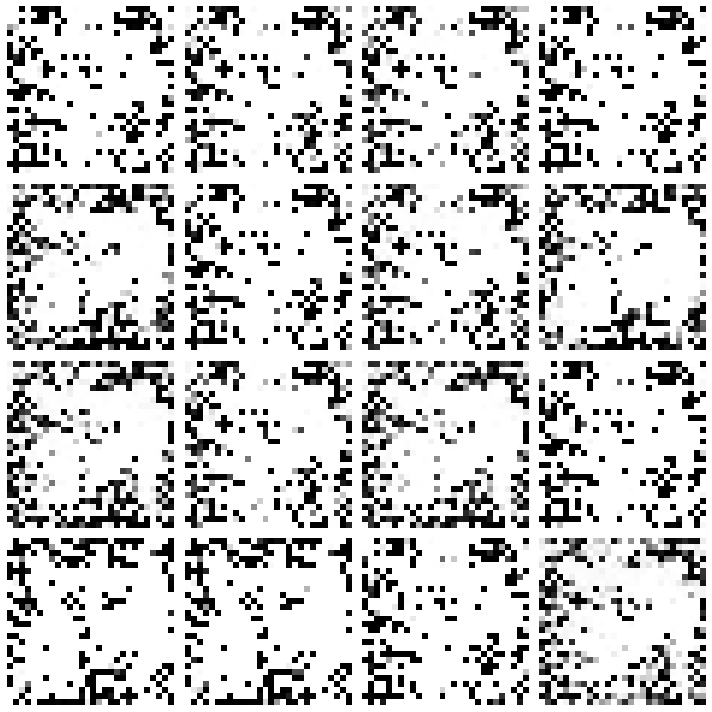

epoch: 3401, [Discriminator :: d_loss: 1.011863], [ Generator :: loss: 6.562294]
epoch: 3402, [Discriminator :: d_loss: 1.015585], [ Generator :: loss: 7.105846]
epoch: 3403, [Discriminator :: d_loss: 0.539878], [ Generator :: loss: 6.528617]
epoch: 3404, [Discriminator :: d_loss: 1.018211], [ Generator :: loss: 6.989346]
epoch: 3405, [Discriminator :: d_loss: 0.514073], [ Generator :: loss: 7.005558]
epoch: 3406, [Discriminator :: d_loss: 0.518726], [ Generator :: loss: 7.894044]
epoch: 3407, [Discriminator :: d_loss: 0.004846], [ Generator :: loss: 7.252500]
epoch: 3408, [Discriminator :: d_loss: 0.505412], [ Generator :: loss: 7.267886]
epoch: 3409, [Discriminator :: d_loss: 1.013926], [ Generator :: loss: 7.650837]
epoch: 3410, [Discriminator :: d_loss: 0.009403], [ Generator :: loss: 8.071012]
epoch: 3411, [Discriminator :: d_loss: 0.007854], [ Generator :: loss: 8.235464]
epoch: 3412, [Discriminator :: d_loss: 0.520939], [ Generator :: loss: 7.906103]
epoch: 3413, [Discriminator 

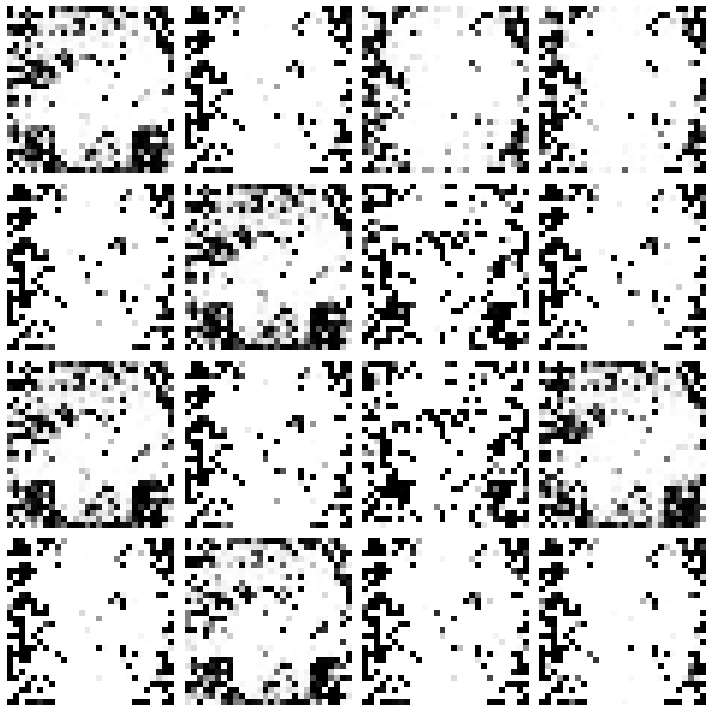

epoch: 3601, [Discriminator :: d_loss: 1.062888], [ Generator :: loss: 13.355537]
epoch: 3602, [Discriminator :: d_loss: 0.396618], [ Generator :: loss: 10.322452]
epoch: 3603, [Discriminator :: d_loss: 0.198180], [ Generator :: loss: 12.023129]
epoch: 3604, [Discriminator :: d_loss: 0.290766], [ Generator :: loss: 10.230097]
epoch: 3605, [Discriminator :: d_loss: 0.275858], [ Generator :: loss: 10.164925]
epoch: 3606, [Discriminator :: d_loss: 1.141510], [ Generator :: loss: 7.081843]
epoch: 3607, [Discriminator :: d_loss: 2.065931], [ Generator :: loss: 5.971734]
epoch: 3608, [Discriminator :: d_loss: 2.302686], [ Generator :: loss: 5.699010]
epoch: 3609, [Discriminator :: d_loss: 2.613330], [ Generator :: loss: 5.556431]
epoch: 3610, [Discriminator :: d_loss: 1.198607], [ Generator :: loss: 4.520988]
epoch: 3611, [Discriminator :: d_loss: 1.779365], [ Generator :: loss: 6.733875]
epoch: 3612, [Discriminator :: d_loss: 0.683369], [ Generator :: loss: 4.654428]
epoch: 3613, [Discrimin

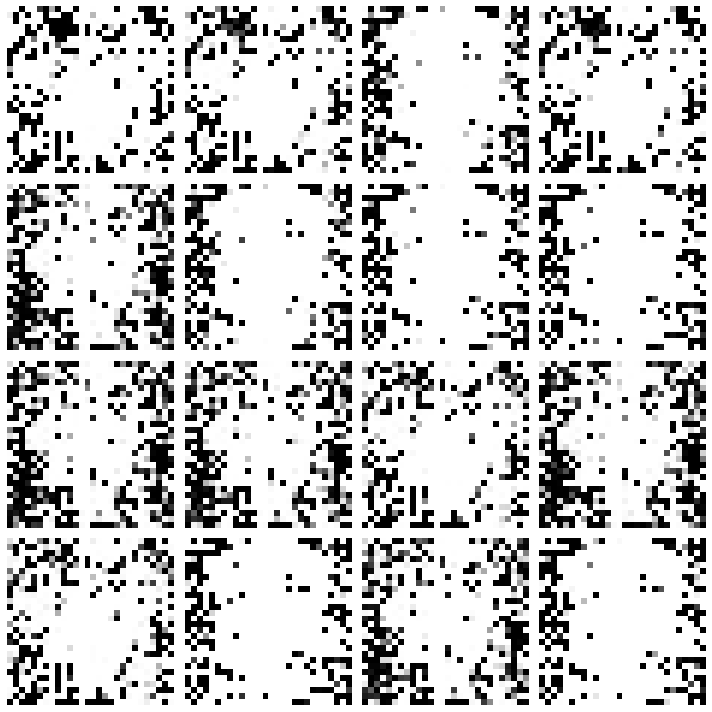

epoch: 3801, [Discriminator :: d_loss: 0.044656], [ Generator :: loss: 12.497110]
epoch: 3802, [Discriminator :: d_loss: 0.039965], [ Generator :: loss: 12.335411]
epoch: 3803, [Discriminator :: d_loss: 0.023078], [ Generator :: loss: 12.589366]
epoch: 3804, [Discriminator :: d_loss: 0.004814], [ Generator :: loss: 12.924661]
epoch: 3805, [Discriminator :: d_loss: 0.002485], [ Generator :: loss: 12.830063]
epoch: 3806, [Discriminator :: d_loss: 0.001462], [ Generator :: loss: 12.855708]
epoch: 3807, [Discriminator :: d_loss: 0.000598], [ Generator :: loss: 13.168524]
epoch: 3808, [Discriminator :: d_loss: 0.000281], [ Generator :: loss: 12.537575]
epoch: 3809, [Discriminator :: d_loss: 0.000376], [ Generator :: loss: 13.407557]
epoch: 3810, [Discriminator :: d_loss: 0.000294], [ Generator :: loss: 13.033036]
epoch: 3811, [Discriminator :: d_loss: 0.000119], [ Generator :: loss: 13.469354]
epoch: 3812, [Discriminator :: d_loss: 0.000257], [ Generator :: loss: 13.739397]
epoch: 3813, [Di

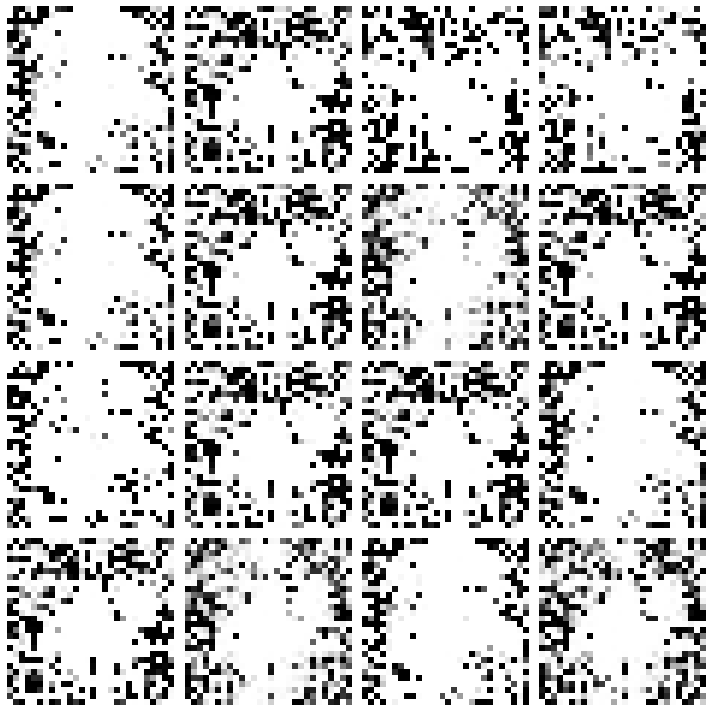

epoch: 4001, [Discriminator :: d_loss: 0.005015], [ Generator :: loss: 14.217100]
epoch: 4002, [Discriminator :: d_loss: 0.509393], [ Generator :: loss: 12.309404]
epoch: 4003, [Discriminator :: d_loss: 0.003080], [ Generator :: loss: 12.813814]
epoch: 4004, [Discriminator :: d_loss: 0.006547], [ Generator :: loss: 13.486265]
epoch: 4005, [Discriminator :: d_loss: 0.508124], [ Generator :: loss: 13.000920]
epoch: 4006, [Discriminator :: d_loss: 1.008417], [ Generator :: loss: 11.489626]
epoch: 4007, [Discriminator :: d_loss: 0.508897], [ Generator :: loss: 11.928553]
epoch: 4008, [Discriminator :: d_loss: 0.504834], [ Generator :: loss: 12.328445]
epoch: 4009, [Discriminator :: d_loss: 0.000590], [ Generator :: loss: 11.804399]
epoch: 4010, [Discriminator :: d_loss: 0.503694], [ Generator :: loss: 12.034889]
epoch: 4011, [Discriminator :: d_loss: 0.002083], [ Generator :: loss: 13.362990]
epoch: 4012, [Discriminator :: d_loss: 0.001298], [ Generator :: loss: 11.596761]
epoch: 4013, [Di

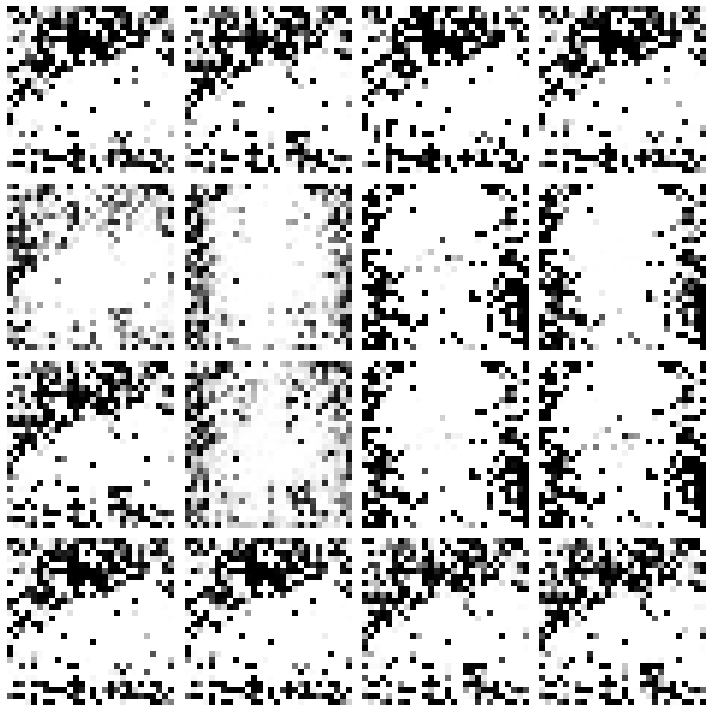

epoch: 4201, [Discriminator :: d_loss: 0.007950], [ Generator :: loss: 8.345715]
epoch: 4202, [Discriminator :: d_loss: 0.008168], [ Generator :: loss: 9.661983]
epoch: 4203, [Discriminator :: d_loss: 0.006471], [ Generator :: loss: 8.759992]
epoch: 4204, [Discriminator :: d_loss: 0.006955], [ Generator :: loss: 7.832466]
epoch: 4205, [Discriminator :: d_loss: 0.010073], [ Generator :: loss: 7.945790]
epoch: 4206, [Discriminator :: d_loss: 0.006968], [ Generator :: loss: 8.369422]
epoch: 4207, [Discriminator :: d_loss: 0.010173], [ Generator :: loss: 9.293903]
epoch: 4208, [Discriminator :: d_loss: 0.510668], [ Generator :: loss: 7.529010]
epoch: 4209, [Discriminator :: d_loss: 0.012288], [ Generator :: loss: 7.839756]
epoch: 4210, [Discriminator :: d_loss: 0.016810], [ Generator :: loss: 7.929386]
epoch: 4211, [Discriminator :: d_loss: 0.015352], [ Generator :: loss: 8.344837]
epoch: 4212, [Discriminator :: d_loss: 0.005173], [ Generator :: loss: 7.346629]
epoch: 4213, [Discriminator 

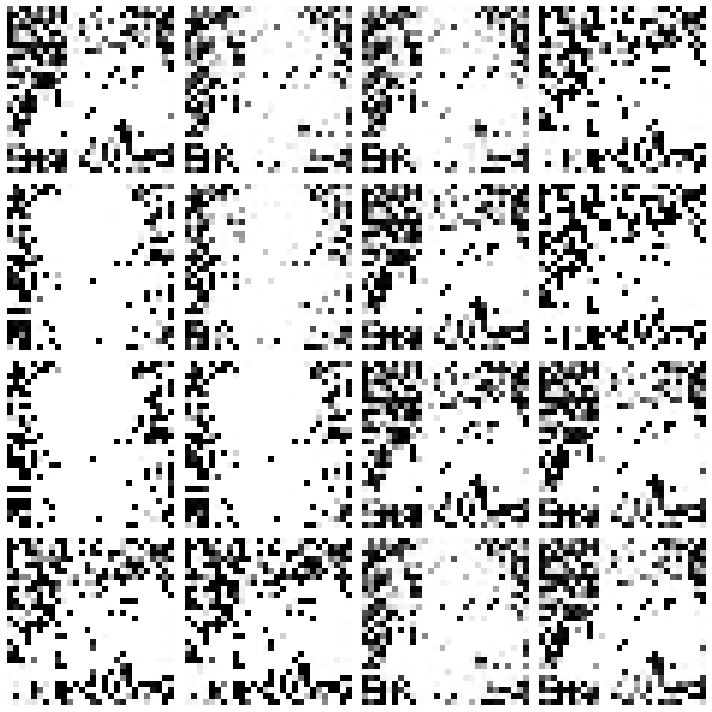

epoch: 4401, [Discriminator :: d_loss: 0.001893], [ Generator :: loss: 7.388101]
epoch: 4402, [Discriminator :: d_loss: 0.003062], [ Generator :: loss: 7.744265]
epoch: 4403, [Discriminator :: d_loss: 0.001510], [ Generator :: loss: 7.285890]
epoch: 4404, [Discriminator :: d_loss: 0.509195], [ Generator :: loss: 7.561561]
epoch: 4405, [Discriminator :: d_loss: 0.003954], [ Generator :: loss: 7.395482]
epoch: 4406, [Discriminator :: d_loss: 0.001673], [ Generator :: loss: 6.824596]
epoch: 4407, [Discriminator :: d_loss: 0.003707], [ Generator :: loss: 7.127346]
epoch: 4408, [Discriminator :: d_loss: 0.003864], [ Generator :: loss: 7.305094]
epoch: 4409, [Discriminator :: d_loss: 0.006281], [ Generator :: loss: 7.409928]
epoch: 4410, [Discriminator :: d_loss: 0.002414], [ Generator :: loss: 7.048941]
epoch: 4411, [Discriminator :: d_loss: 0.002949], [ Generator :: loss: 7.312724]
epoch: 4412, [Discriminator :: d_loss: 0.004226], [ Generator :: loss: 7.446459]
epoch: 4413, [Discriminator 

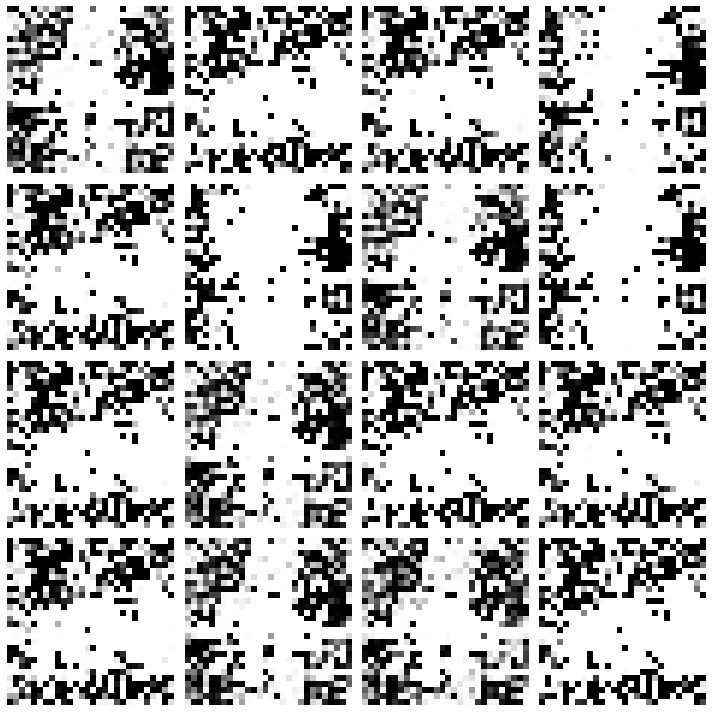

epoch: 4601, [Discriminator :: d_loss: 0.506729], [ Generator :: loss: 9.893140]
epoch: 4602, [Discriminator :: d_loss: 0.002691], [ Generator :: loss: 8.189860]
epoch: 4603, [Discriminator :: d_loss: 0.001863], [ Generator :: loss: 8.909477]
epoch: 4604, [Discriminator :: d_loss: 0.001120], [ Generator :: loss: 9.795448]
epoch: 4605, [Discriminator :: d_loss: 0.505683], [ Generator :: loss: 8.172977]
epoch: 4606, [Discriminator :: d_loss: 0.002525], [ Generator :: loss: 9.200968]
epoch: 4607, [Discriminator :: d_loss: 0.001976], [ Generator :: loss: 9.120452]
epoch: 4608, [Discriminator :: d_loss: 0.001421], [ Generator :: loss: 9.548175]
epoch: 4609, [Discriminator :: d_loss: 0.000291], [ Generator :: loss: 8.684196]
epoch: 4610, [Discriminator :: d_loss: 0.001835], [ Generator :: loss: 8.553455]
epoch: 4611, [Discriminator :: d_loss: 0.004334], [ Generator :: loss: 8.648075]
epoch: 4612, [Discriminator :: d_loss: 0.001783], [ Generator :: loss: 8.702888]
epoch: 4613, [Discriminator 

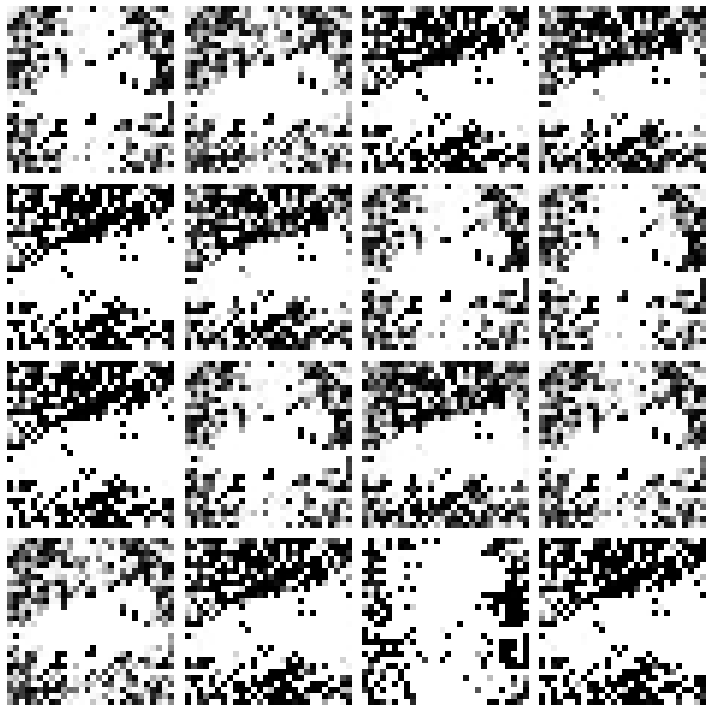

epoch: 4801, [Discriminator :: d_loss: 0.002408], [ Generator :: loss: 6.004695]
epoch: 4802, [Discriminator :: d_loss: 0.003207], [ Generator :: loss: 6.143605]
epoch: 4803, [Discriminator :: d_loss: 0.002764], [ Generator :: loss: 6.219253]
epoch: 4804, [Discriminator :: d_loss: 0.002375], [ Generator :: loss: 6.313605]
epoch: 4805, [Discriminator :: d_loss: 0.003316], [ Generator :: loss: 5.587742]
epoch: 4806, [Discriminator :: d_loss: 0.007430], [ Generator :: loss: 5.986343]
epoch: 4807, [Discriminator :: d_loss: 0.004574], [ Generator :: loss: 5.646851]
epoch: 4808, [Discriminator :: d_loss: 0.003817], [ Generator :: loss: 5.757195]
epoch: 4809, [Discriminator :: d_loss: 0.005376], [ Generator :: loss: 6.598560]
epoch: 4810, [Discriminator :: d_loss: 0.004825], [ Generator :: loss: 6.031436]
epoch: 4811, [Discriminator :: d_loss: 0.004998], [ Generator :: loss: 5.805190]
epoch: 4812, [Discriminator :: d_loss: 0.004635], [ Generator :: loss: 6.153216]
epoch: 4813, [Discriminator 

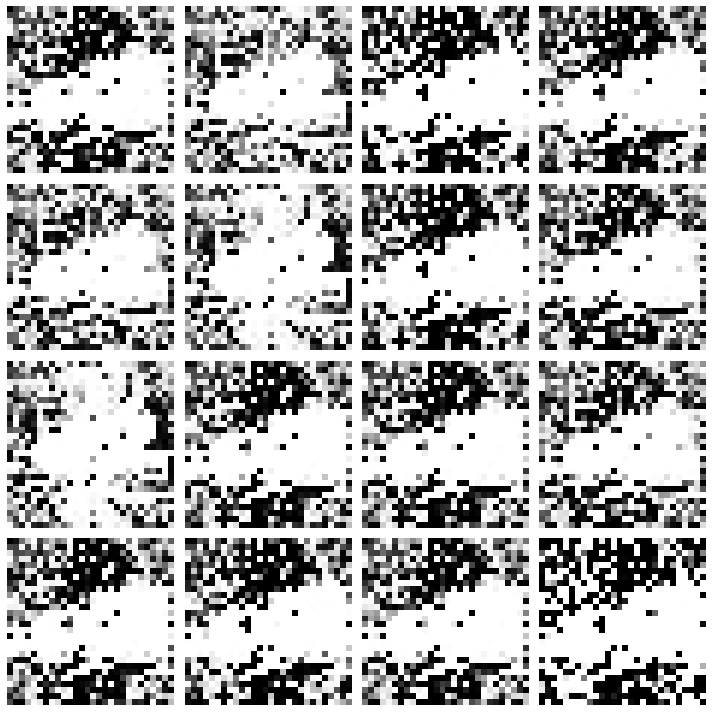

epoch: 5001, [Discriminator :: d_loss: 0.000637], [ Generator :: loss: 8.213049]
epoch: 5002, [Discriminator :: d_loss: 0.000724], [ Generator :: loss: 8.256907]
epoch: 5003, [Discriminator :: d_loss: 0.000965], [ Generator :: loss: 8.563083]
epoch: 5004, [Discriminator :: d_loss: 0.000674], [ Generator :: loss: 8.570402]
epoch: 5005, [Discriminator :: d_loss: 0.001009], [ Generator :: loss: 9.417395]
epoch: 5006, [Discriminator :: d_loss: 0.001018], [ Generator :: loss: 8.575549]
epoch: 5007, [Discriminator :: d_loss: 0.000753], [ Generator :: loss: 8.483480]
epoch: 5008, [Discriminator :: d_loss: 0.000820], [ Generator :: loss: 8.580894]
epoch: 5009, [Discriminator :: d_loss: 0.000646], [ Generator :: loss: 8.787344]
epoch: 5010, [Discriminator :: d_loss: 0.000401], [ Generator :: loss: 8.796693]
epoch: 5011, [Discriminator :: d_loss: 0.000523], [ Generator :: loss: 8.605816]
epoch: 5012, [Discriminator :: d_loss: 0.000396], [ Generator :: loss: 8.794922]
epoch: 5013, [Discriminator 

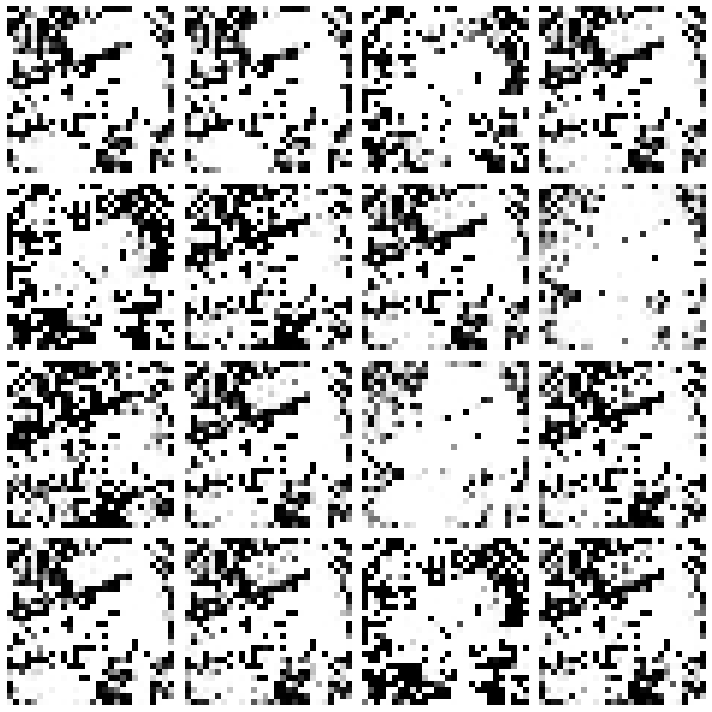

epoch: 5201, [Discriminator :: d_loss: 0.022288], [ Generator :: loss: 13.853659]
epoch: 5202, [Discriminator :: d_loss: 0.041185], [ Generator :: loss: 13.291739]
epoch: 5203, [Discriminator :: d_loss: 0.008276], [ Generator :: loss: 15.550712]
epoch: 5204, [Discriminator :: d_loss: 0.021744], [ Generator :: loss: 14.668340]
epoch: 5205, [Discriminator :: d_loss: 0.009222], [ Generator :: loss: 14.363497]
epoch: 5206, [Discriminator :: d_loss: 0.000054], [ Generator :: loss: 14.849388]
epoch: 5207, [Discriminator :: d_loss: 0.000354], [ Generator :: loss: 13.601183]
epoch: 5208, [Discriminator :: d_loss: 0.100269], [ Generator :: loss: 13.478796]
epoch: 5209, [Discriminator :: d_loss: 0.019262], [ Generator :: loss: 14.808041]
epoch: 5210, [Discriminator :: d_loss: 0.034214], [ Generator :: loss: 14.276990]
epoch: 5211, [Discriminator :: d_loss: 0.090192], [ Generator :: loss: 13.663242]
epoch: 5212, [Discriminator :: d_loss: 0.221507], [ Generator :: loss: 14.478539]
epoch: 5213, [Di

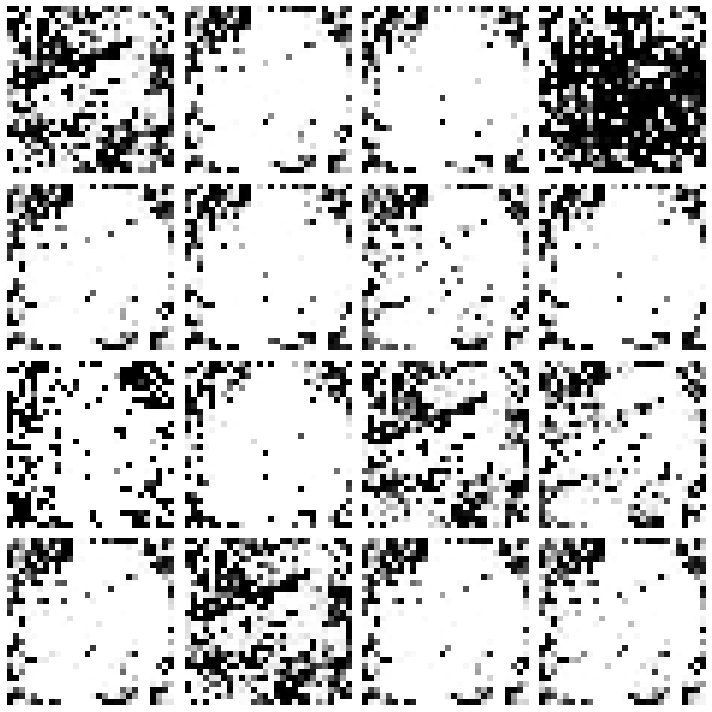

epoch: 5401, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5402, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5403, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5404, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5405, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5406, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5407, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5408, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5409, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5410, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5411, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5412, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5413, [Di

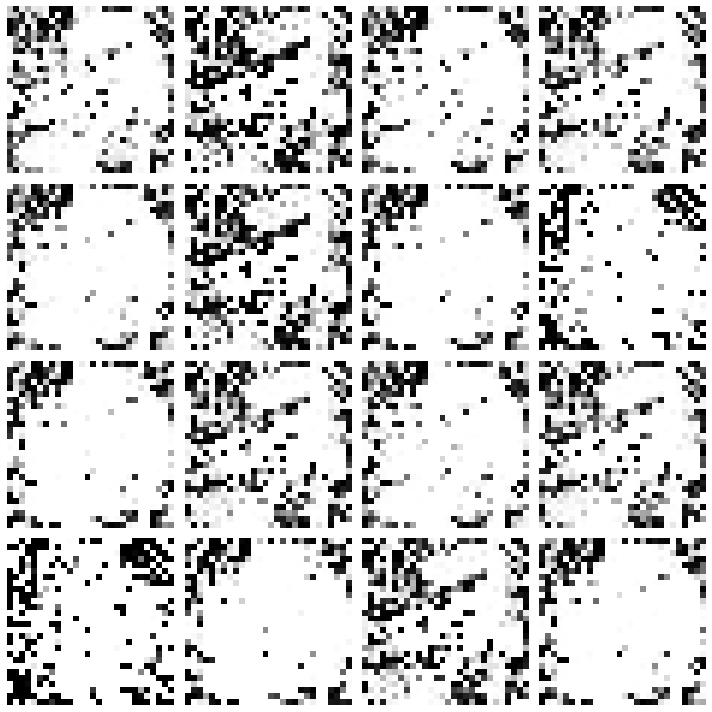

epoch: 5601, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5602, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5603, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5604, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5605, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5606, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5607, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5608, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5609, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5610, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5611, [Discriminator :: d_loss: 0.006335], [ Generator :: loss: 16.118095]
epoch: 5612, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5613, [Di

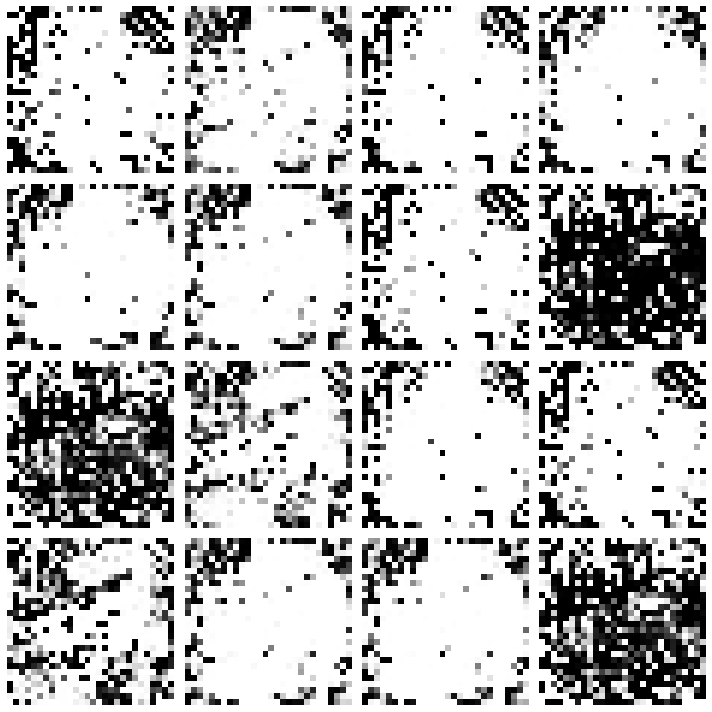

epoch: 5801, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5802, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5803, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5804, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5805, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5806, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5807, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5808, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5809, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5810, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5811, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5812, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 5813, [Di

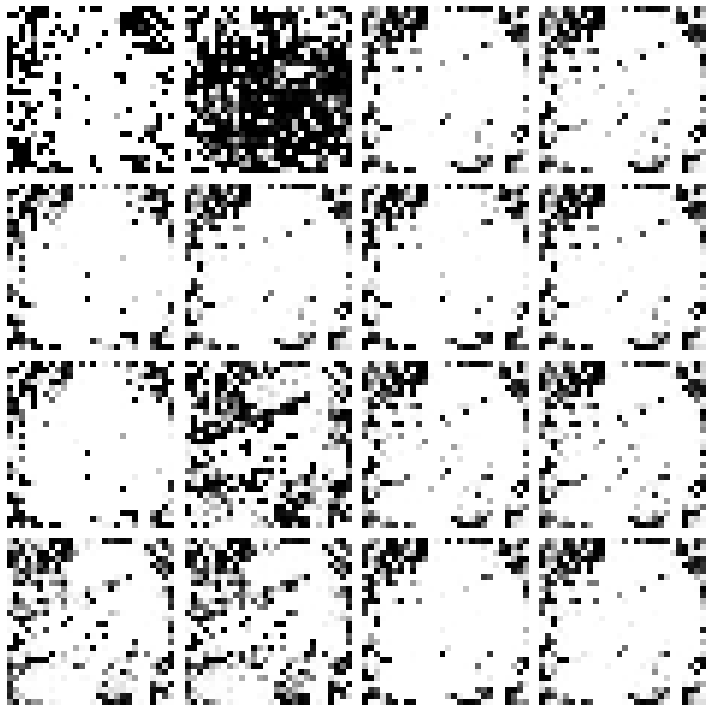

epoch: 6001, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 6002, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 6003, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 6004, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 6005, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.112604]
epoch: 6006, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 6007, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 6008, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 6009, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 6010, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 6011, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 6012, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 6013, [Di

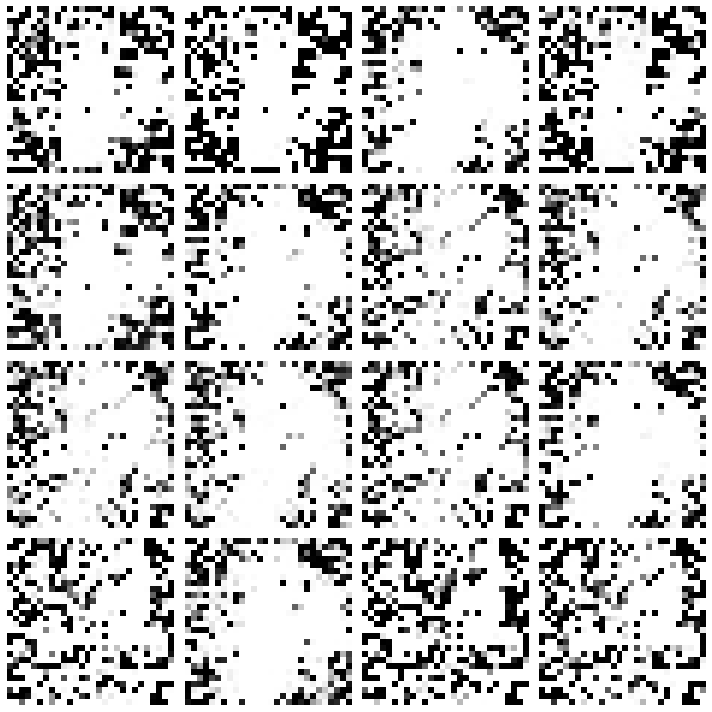

epoch: 6201, [Discriminator :: d_loss: 0.000143], [ Generator :: loss: 15.094998]
epoch: 6202, [Discriminator :: d_loss: 0.000109], [ Generator :: loss: 15.418808]
epoch: 6203, [Discriminator :: d_loss: 0.000021], [ Generator :: loss: 14.628220]
epoch: 6204, [Discriminator :: d_loss: 0.503778], [ Generator :: loss: 15.182308]
epoch: 6205, [Discriminator :: d_loss: 0.503939], [ Generator :: loss: 15.283615]
epoch: 6206, [Discriminator :: d_loss: 0.503767], [ Generator :: loss: 14.018864]
epoch: 6207, [Discriminator :: d_loss: 0.002673], [ Generator :: loss: 14.472510]
epoch: 6208, [Discriminator :: d_loss: 0.010483], [ Generator :: loss: 13.670577]
epoch: 6209, [Discriminator :: d_loss: 0.503716], [ Generator :: loss: 12.828262]
epoch: 6210, [Discriminator :: d_loss: 0.016234], [ Generator :: loss: 12.881021]
epoch: 6211, [Discriminator :: d_loss: 0.525105], [ Generator :: loss: 11.075287]
epoch: 6212, [Discriminator :: d_loss: 0.263435], [ Generator :: loss: 12.179531]
epoch: 6213, [Di

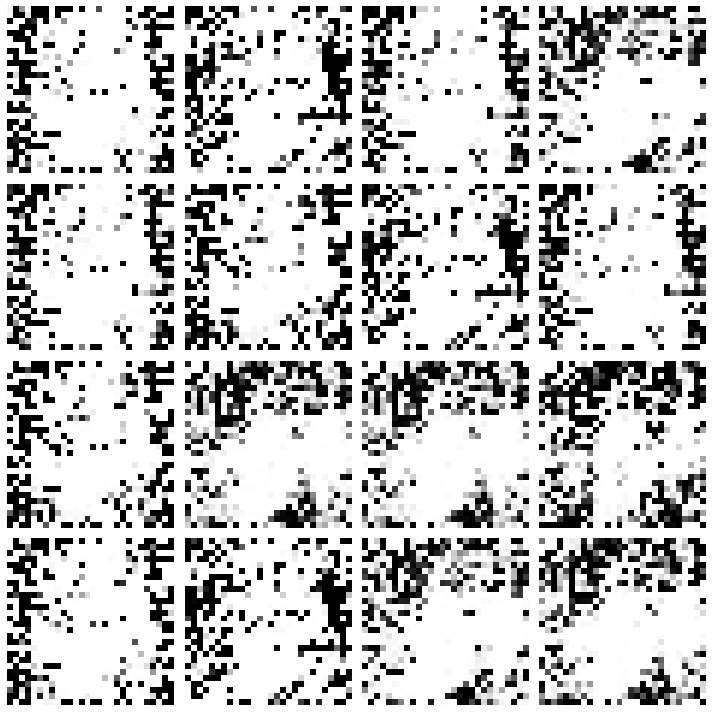

epoch: 6401, [Discriminator :: d_loss: 0.095550], [ Generator :: loss: 13.098081]
epoch: 6402, [Discriminator :: d_loss: 0.032959], [ Generator :: loss: 12.462543]
epoch: 6403, [Discriminator :: d_loss: 0.000150], [ Generator :: loss: 12.487969]
epoch: 6404, [Discriminator :: d_loss: 0.000006], [ Generator :: loss: 12.102927]
epoch: 6405, [Discriminator :: d_loss: 0.612722], [ Generator :: loss: 12.606598]
epoch: 6406, [Discriminator :: d_loss: 0.109706], [ Generator :: loss: 12.254128]
epoch: 6407, [Discriminator :: d_loss: 0.313355], [ Generator :: loss: 12.917282]
epoch: 6408, [Discriminator :: d_loss: 0.722311], [ Generator :: loss: 11.277656]
epoch: 6409, [Discriminator :: d_loss: 1.016901], [ Generator :: loss: 11.291596]
epoch: 6410, [Discriminator :: d_loss: 0.223843], [ Generator :: loss: 12.013038]
epoch: 6411, [Discriminator :: d_loss: 0.227732], [ Generator :: loss: 10.568085]
epoch: 6412, [Discriminator :: d_loss: 0.146183], [ Generator :: loss: 12.652475]
epoch: 6413, [Di

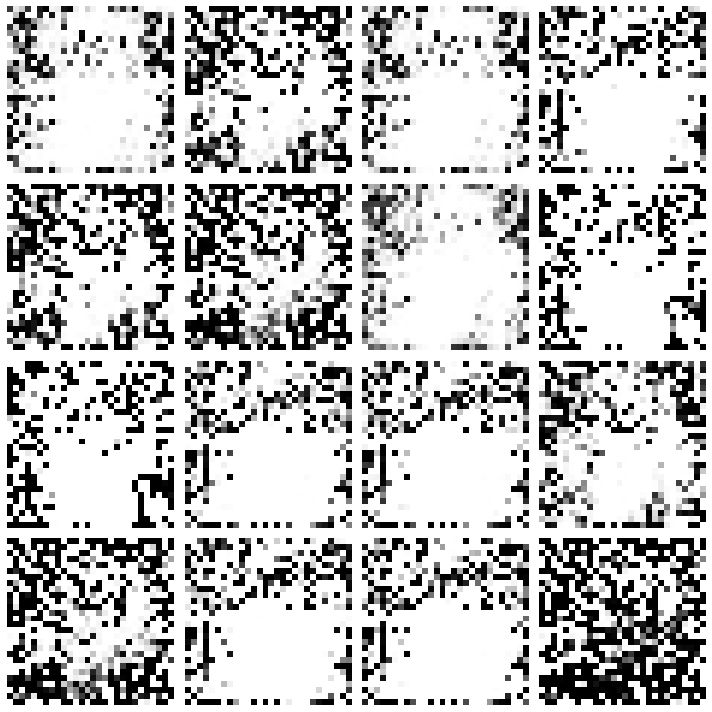

epoch: 6601, [Discriminator :: d_loss: 0.070501], [ Generator :: loss: 12.910988]
epoch: 6602, [Discriminator :: d_loss: 0.004719], [ Generator :: loss: 12.392988]
epoch: 6603, [Discriminator :: d_loss: 0.000233], [ Generator :: loss: 13.301103]
epoch: 6604, [Discriminator :: d_loss: 0.001701], [ Generator :: loss: 12.878073]
epoch: 6605, [Discriminator :: d_loss: 0.047072], [ Generator :: loss: 12.974960]
epoch: 6606, [Discriminator :: d_loss: 0.002007], [ Generator :: loss: 13.093943]
epoch: 6607, [Discriminator :: d_loss: 0.021810], [ Generator :: loss: 13.434000]
epoch: 6608, [Discriminator :: d_loss: 0.003802], [ Generator :: loss: 13.392216]
epoch: 6609, [Discriminator :: d_loss: 0.005718], [ Generator :: loss: 13.502199]
epoch: 6610, [Discriminator :: d_loss: 0.000479], [ Generator :: loss: 13.099771]
epoch: 6611, [Discriminator :: d_loss: 0.000033], [ Generator :: loss: 13.264187]
epoch: 6612, [Discriminator :: d_loss: 0.000430], [ Generator :: loss: 11.928624]
epoch: 6613, [Di

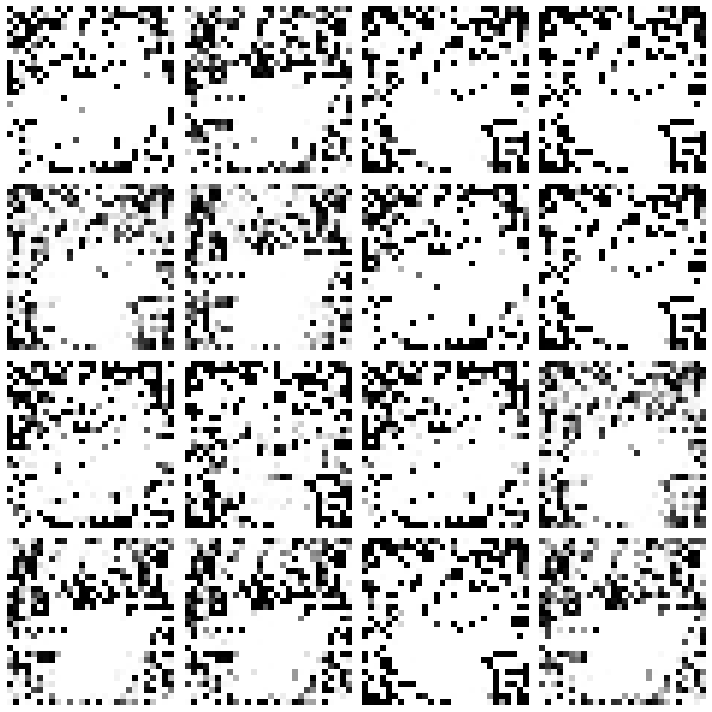

epoch: 6801, [Discriminator :: d_loss: 0.002161], [ Generator :: loss: 11.387423]
epoch: 6802, [Discriminator :: d_loss: 0.004681], [ Generator :: loss: 11.561054]
epoch: 6803, [Discriminator :: d_loss: 0.006081], [ Generator :: loss: 11.633177]
epoch: 6804, [Discriminator :: d_loss: 0.001507], [ Generator :: loss: 11.271567]
epoch: 6805, [Discriminator :: d_loss: 0.003564], [ Generator :: loss: 12.050945]
epoch: 6806, [Discriminator :: d_loss: 0.006210], [ Generator :: loss: 11.423695]
epoch: 6807, [Discriminator :: d_loss: 0.000665], [ Generator :: loss: 11.927650]
epoch: 6808, [Discriminator :: d_loss: 0.001963], [ Generator :: loss: 13.162529]
epoch: 6809, [Discriminator :: d_loss: 0.000903], [ Generator :: loss: 10.799078]
epoch: 6810, [Discriminator :: d_loss: 0.001798], [ Generator :: loss: 10.899772]
epoch: 6811, [Discriminator :: d_loss: 0.001968], [ Generator :: loss: 11.612993]
epoch: 6812, [Discriminator :: d_loss: 0.002495], [ Generator :: loss: 11.304090]
epoch: 6813, [Di

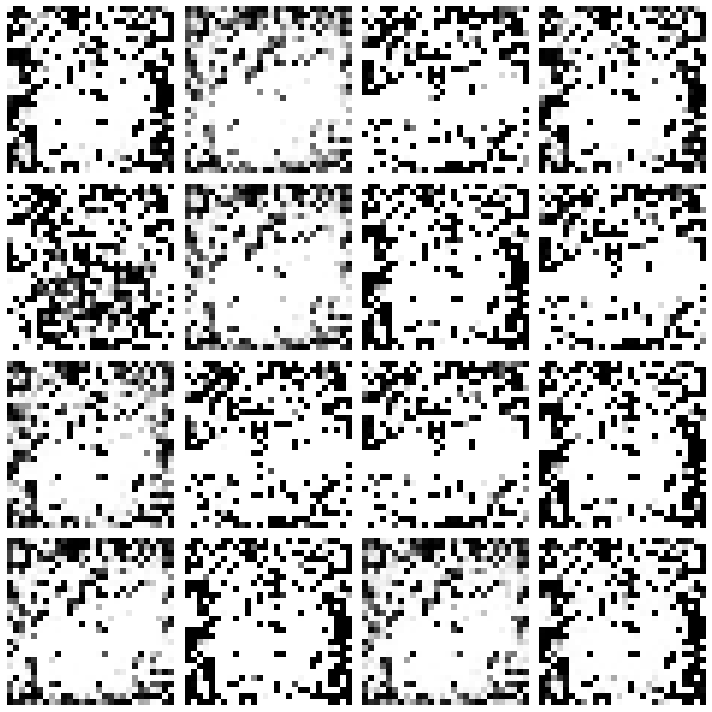

epoch: 7001, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7002, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7003, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7004, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7005, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7006, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7007, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7008, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7009, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7010, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7011, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7012, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7013, [Di

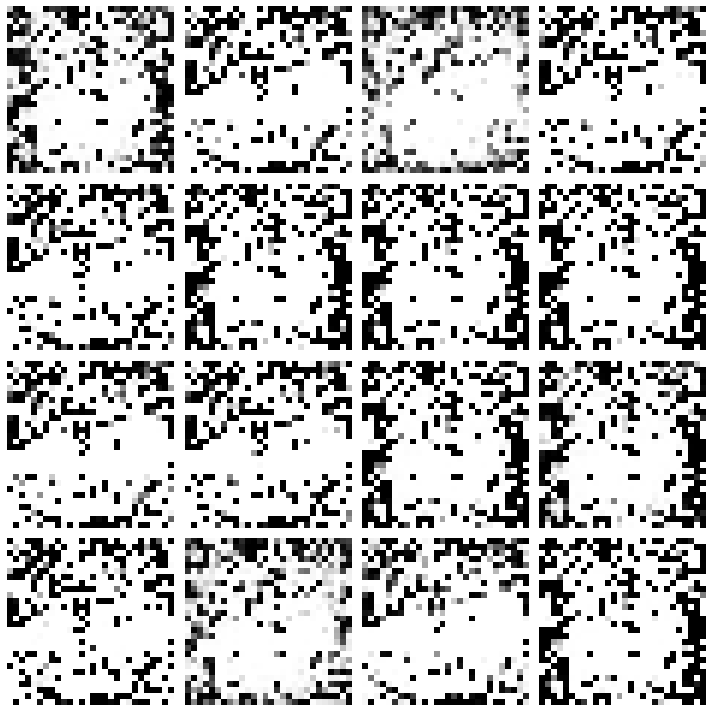

epoch: 7201, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7202, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7203, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7204, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7205, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7206, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7207, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7208, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7209, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7210, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7211, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7212, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7213, [Di

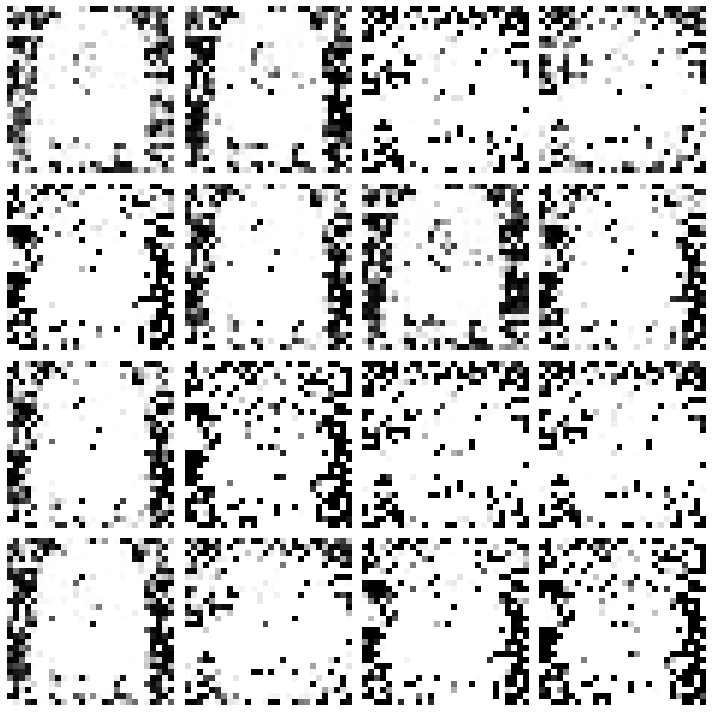

epoch: 7401, [Discriminator :: d_loss: 0.020418], [ Generator :: loss: 14.752552]
epoch: 7402, [Discriminator :: d_loss: 0.000344], [ Generator :: loss: 15.030687]
epoch: 7403, [Discriminator :: d_loss: 0.154016], [ Generator :: loss: 15.115329]
epoch: 7404, [Discriminator :: d_loss: 0.040121], [ Generator :: loss: 14.192231]
epoch: 7405, [Discriminator :: d_loss: 0.046263], [ Generator :: loss: 11.230687]
epoch: 7406, [Discriminator :: d_loss: 0.023938], [ Generator :: loss: 14.419491]
epoch: 7407, [Discriminator :: d_loss: 0.012047], [ Generator :: loss: 13.402621]
epoch: 7408, [Discriminator :: d_loss: 0.170758], [ Generator :: loss: 13.349324]
epoch: 7409, [Discriminator :: d_loss: 0.081974], [ Generator :: loss: 13.571198]
epoch: 7410, [Discriminator :: d_loss: 0.098061], [ Generator :: loss: 13.761473]
epoch: 7411, [Discriminator :: d_loss: 0.003168], [ Generator :: loss: 12.186508]
epoch: 7412, [Discriminator :: d_loss: 0.109845], [ Generator :: loss: 13.558005]
epoch: 7413, [Di

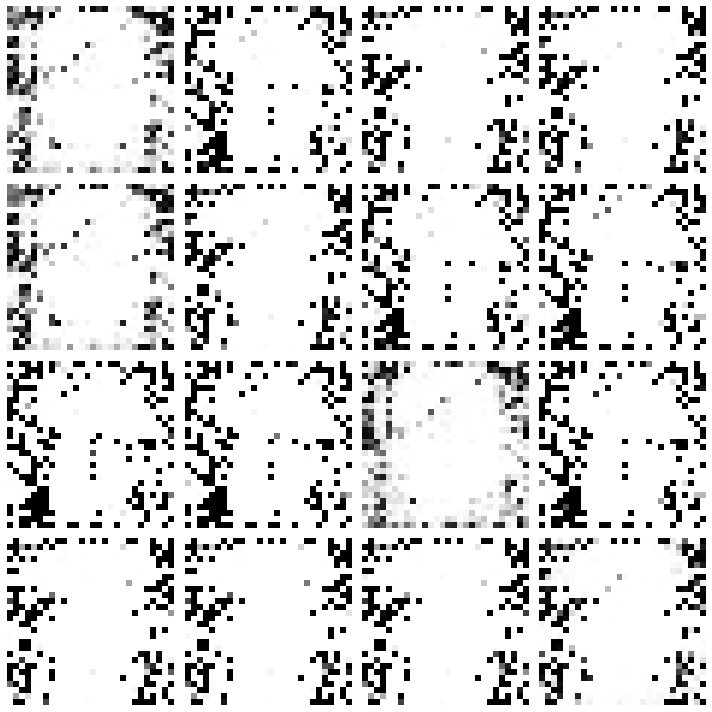

epoch: 7601, [Discriminator :: d_loss: 0.503691], [ Generator :: loss: 16.118095]
epoch: 7602, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7603, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7604, [Discriminator :: d_loss: 1.007381], [ Generator :: loss: 16.118095]
epoch: 7605, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7606, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7607, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7608, [Discriminator :: d_loss: 1.007381], [ Generator :: loss: 16.118095]
epoch: 7609, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7610, [Discriminator :: d_loss: 0.503691], [ Generator :: loss: 16.118095]
epoch: 7611, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7612, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 7613, [Di

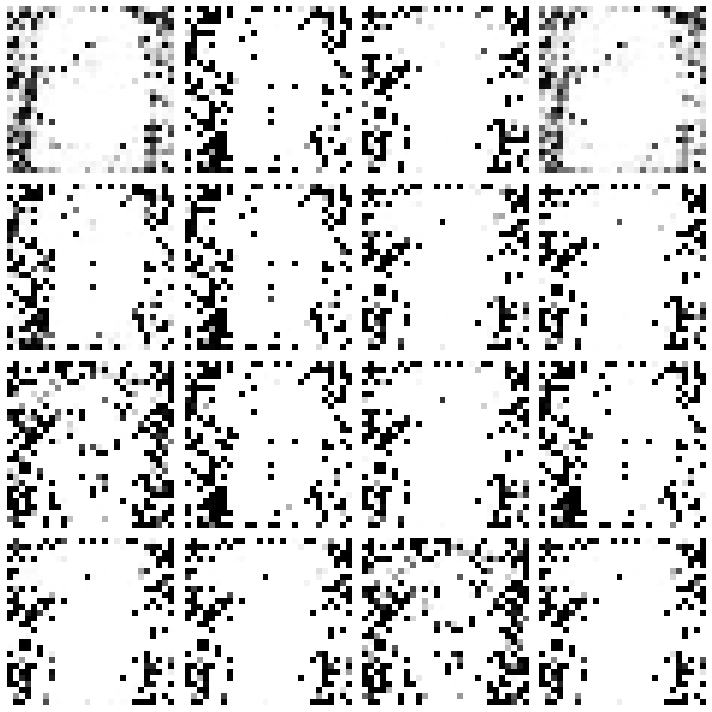

epoch: 7801, [Discriminator :: d_loss: 0.270721], [ Generator :: loss: 13.025215]
epoch: 7802, [Discriminator :: d_loss: 0.523296], [ Generator :: loss: 13.544923]
epoch: 7803, [Discriminator :: d_loss: 0.000001], [ Generator :: loss: 12.335777]
epoch: 7804, [Discriminator :: d_loss: 1.968277], [ Generator :: loss: 13.018833]
epoch: 7805, [Discriminator :: d_loss: 0.996399], [ Generator :: loss: 12.919669]
epoch: 7806, [Discriminator :: d_loss: 1.703738], [ Generator :: loss: 15.203596]
epoch: 7807, [Discriminator :: d_loss: 0.401605], [ Generator :: loss: 12.991861]
epoch: 7808, [Discriminator :: d_loss: 0.169670], [ Generator :: loss: 14.594560]
epoch: 7809, [Discriminator :: d_loss: 1.494599], [ Generator :: loss: 15.110714]
epoch: 7810, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 12.764910]
epoch: 7811, [Discriminator :: d_loss: 0.023205], [ Generator :: loss: 13.964350]
epoch: 7812, [Discriminator :: d_loss: 3.022650], [ Generator :: loss: 13.502398]
epoch: 7813, [Di

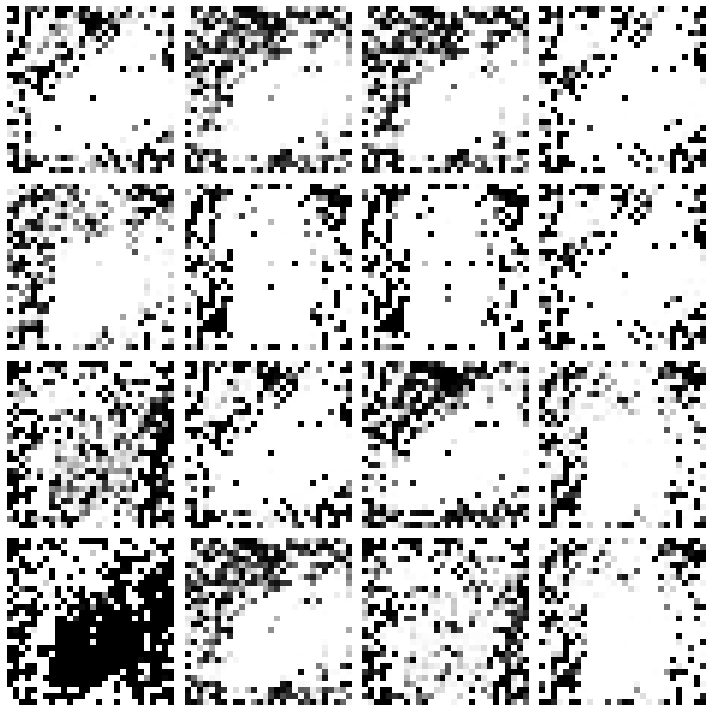

epoch: 8001, [Discriminator :: d_loss: 0.006722], [ Generator :: loss: 15.296919]
epoch: 8002, [Discriminator :: d_loss: 0.000002], [ Generator :: loss: 14.495304]
epoch: 8003, [Discriminator :: d_loss: 0.199592], [ Generator :: loss: 15.545657]
epoch: 8004, [Discriminator :: d_loss: 0.000058], [ Generator :: loss: 15.835842]
epoch: 8005, [Discriminator :: d_loss: 0.000143], [ Generator :: loss: 15.200845]
epoch: 8006, [Discriminator :: d_loss: 0.019088], [ Generator :: loss: 14.711108]
epoch: 8007, [Discriminator :: d_loss: 0.005897], [ Generator :: loss: 14.268256]
epoch: 8008, [Discriminator :: d_loss: 0.033349], [ Generator :: loss: 16.080992]
epoch: 8009, [Discriminator :: d_loss: 0.000132], [ Generator :: loss: 15.598437]
epoch: 8010, [Discriminator :: d_loss: 0.000001], [ Generator :: loss: 15.762066]
epoch: 8011, [Discriminator :: d_loss: 0.000290], [ Generator :: loss: 15.813055]
epoch: 8012, [Discriminator :: d_loss: 0.000002], [ Generator :: loss: 15.256688]
epoch: 8013, [Di

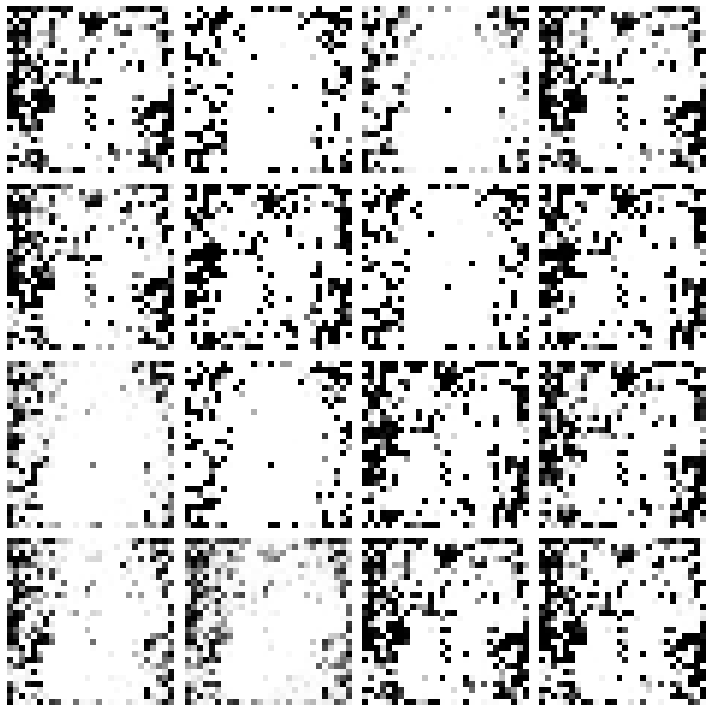

epoch: 8201, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.063911]
epoch: 8202, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 15.948018]
epoch: 8203, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 15.402439]
epoch: 8204, [Discriminator :: d_loss: 0.000561], [ Generator :: loss: 15.948512]
epoch: 8205, [Discriminator :: d_loss: 0.020001], [ Generator :: loss: 15.280484]
epoch: 8206, [Discriminator :: d_loss: 0.000003], [ Generator :: loss: 15.926871]
epoch: 8207, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 15.153817]
epoch: 8208, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 15.521650]
epoch: 8209, [Discriminator :: d_loss: 0.000010], [ Generator :: loss: 15.359329]
epoch: 8210, [Discriminator :: d_loss: 0.121190], [ Generator :: loss: 15.588656]
epoch: 8211, [Discriminator :: d_loss: 0.147221], [ Generator :: loss: 15.535431]
epoch: 8212, [Discriminator :: d_loss: 0.201776], [ Generator :: loss: 14.365827]
epoch: 8213, [Di

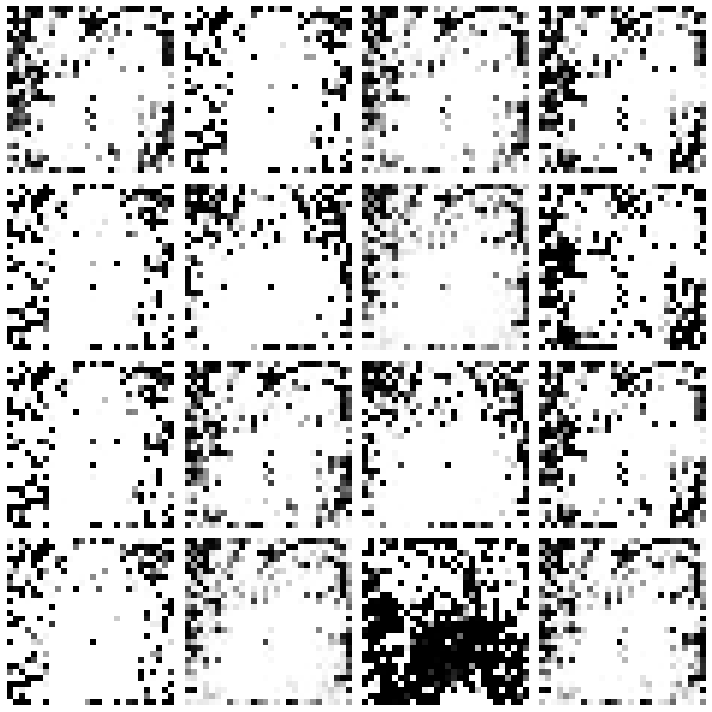

epoch: 8401, [Discriminator :: d_loss: 0.000007], [ Generator :: loss: 16.112604]
epoch: 8402, [Discriminator :: d_loss: 0.000006], [ Generator :: loss: 15.539293]
epoch: 8403, [Discriminator :: d_loss: 0.000001], [ Generator :: loss: 15.596902]
epoch: 8404, [Discriminator :: d_loss: 0.001486], [ Generator :: loss: 15.970627]
epoch: 8405, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 13.700083]
epoch: 8406, [Discriminator :: d_loss: 0.036948], [ Generator :: loss: 14.669518]
epoch: 8407, [Discriminator :: d_loss: 0.019494], [ Generator :: loss: 13.870459]
epoch: 8408, [Discriminator :: d_loss: 0.115320], [ Generator :: loss: 14.821408]
epoch: 8409, [Discriminator :: d_loss: 0.281835], [ Generator :: loss: 14.153934]
epoch: 8410, [Discriminator :: d_loss: 0.151221], [ Generator :: loss: 13.945936]
epoch: 8411, [Discriminator :: d_loss: 0.152992], [ Generator :: loss: 13.517382]
epoch: 8412, [Discriminator :: d_loss: 0.102072], [ Generator :: loss: 13.242844]
epoch: 8413, [Di

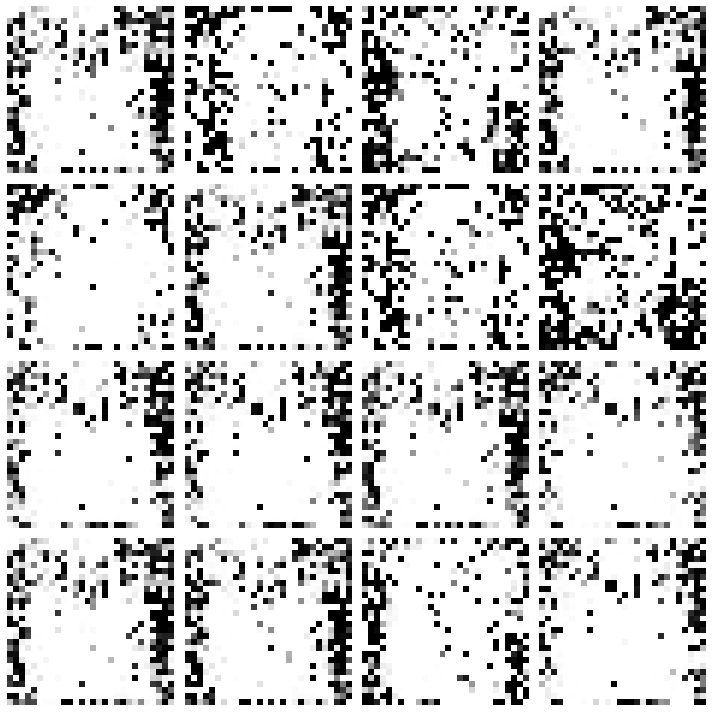

epoch: 8601, [Discriminator :: d_loss: 0.008999], [ Generator :: loss: 11.637833]
epoch: 8602, [Discriminator :: d_loss: 0.000774], [ Generator :: loss: 11.600924]
epoch: 8603, [Discriminator :: d_loss: 0.017946], [ Generator :: loss: 11.699459]
epoch: 8604, [Discriminator :: d_loss: 0.019237], [ Generator :: loss: 11.143085]
epoch: 8605, [Discriminator :: d_loss: 0.012561], [ Generator :: loss: 13.189288]
epoch: 8606, [Discriminator :: d_loss: 0.005101], [ Generator :: loss: 12.246017]
epoch: 8607, [Discriminator :: d_loss: 0.021449], [ Generator :: loss: 10.797615]
epoch: 8608, [Discriminator :: d_loss: 0.005345], [ Generator :: loss: 10.481499]
epoch: 8609, [Discriminator :: d_loss: 0.021405], [ Generator :: loss: 11.486826]
epoch: 8610, [Discriminator :: d_loss: 0.005087], [ Generator :: loss: 11.333549]
epoch: 8611, [Discriminator :: d_loss: 0.004099], [ Generator :: loss: 11.210346]
epoch: 8612, [Discriminator :: d_loss: 0.004696], [ Generator :: loss: 10.545935]
epoch: 8613, [Di

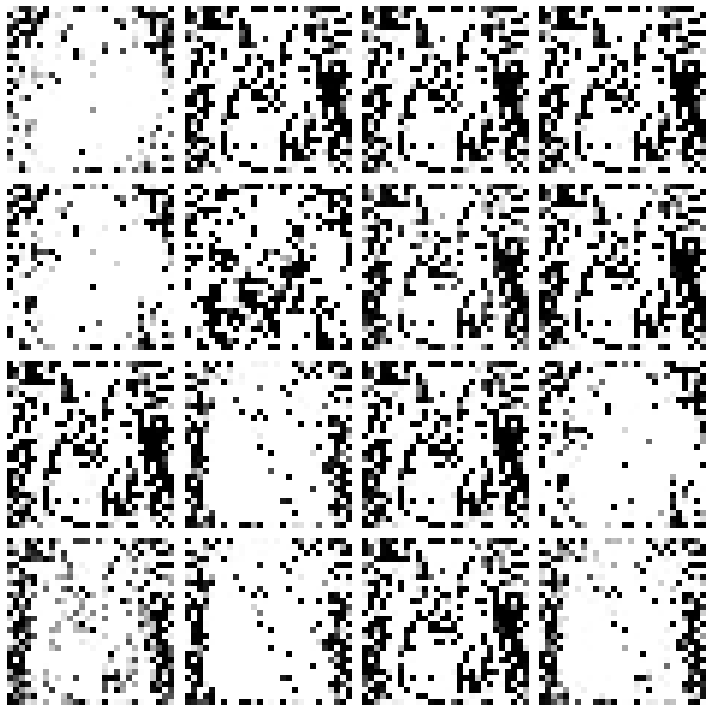

epoch: 8801, [Discriminator :: d_loss: 0.000748], [ Generator :: loss: 10.780036]
epoch: 8802, [Discriminator :: d_loss: 0.000249], [ Generator :: loss: 11.165325]
epoch: 8803, [Discriminator :: d_loss: 0.000289], [ Generator :: loss: 11.334256]
epoch: 8804, [Discriminator :: d_loss: 0.000405], [ Generator :: loss: 11.238127]
epoch: 8805, [Discriminator :: d_loss: 0.503951], [ Generator :: loss: 11.834625]
epoch: 8806, [Discriminator :: d_loss: 0.504158], [ Generator :: loss: 10.615020]
epoch: 8807, [Discriminator :: d_loss: 0.000370], [ Generator :: loss: 12.427128]
epoch: 8808, [Discriminator :: d_loss: 0.000389], [ Generator :: loss: 12.024729]
epoch: 8809, [Discriminator :: d_loss: 0.000331], [ Generator :: loss: 10.949133]
epoch: 8810, [Discriminator :: d_loss: 0.000435], [ Generator :: loss: 11.056683]
epoch: 8811, [Discriminator :: d_loss: 0.000340], [ Generator :: loss: 10.960631]
epoch: 8812, [Discriminator :: d_loss: 0.000384], [ Generator :: loss: 12.224283]
epoch: 8813, [Di

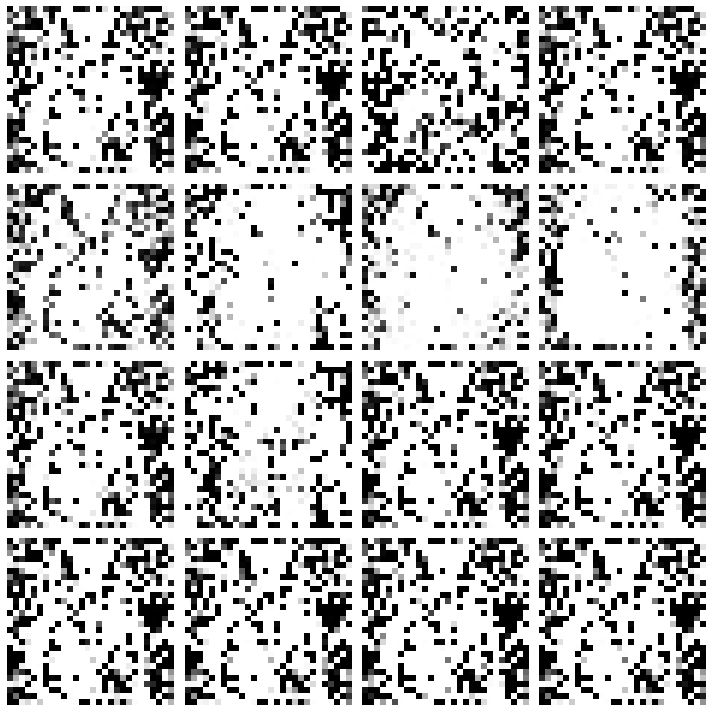

epoch: 9001, [Discriminator :: d_loss: 0.000461], [ Generator :: loss: 10.941539]
epoch: 9002, [Discriminator :: d_loss: 0.000441], [ Generator :: loss: 11.082649]
epoch: 9003, [Discriminator :: d_loss: 0.000545], [ Generator :: loss: 10.670196]
epoch: 9004, [Discriminator :: d_loss: 0.000481], [ Generator :: loss: 10.309458]
epoch: 9005, [Discriminator :: d_loss: 0.000695], [ Generator :: loss: 10.683813]
epoch: 9006, [Discriminator :: d_loss: 0.000726], [ Generator :: loss: 11.238974]
epoch: 9007, [Discriminator :: d_loss: 0.000700], [ Generator :: loss: 10.233358]
epoch: 9008, [Discriminator :: d_loss: 0.000543], [ Generator :: loss: 10.022750]
epoch: 9009, [Discriminator :: d_loss: 0.000556], [ Generator :: loss: 10.856178]
epoch: 9010, [Discriminator :: d_loss: 0.000602], [ Generator :: loss: 10.587571]
epoch: 9011, [Discriminator :: d_loss: 0.000295], [ Generator :: loss: 11.708784]
epoch: 9012, [Discriminator :: d_loss: 0.000379], [ Generator :: loss: 11.121769]
epoch: 9013, [Di

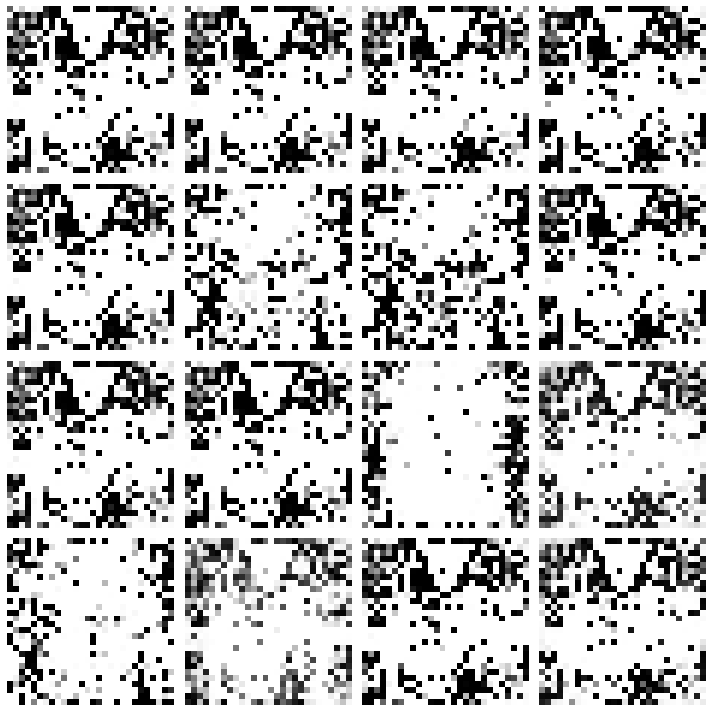

epoch: 9201, [Discriminator :: d_loss: 0.000293], [ Generator :: loss: 10.032490]
epoch: 9202, [Discriminator :: d_loss: 0.000877], [ Generator :: loss: 11.145048]
epoch: 9203, [Discriminator :: d_loss: 0.001250], [ Generator :: loss: 9.999498]
epoch: 9204, [Discriminator :: d_loss: 0.001040], [ Generator :: loss: 10.603785]
epoch: 9205, [Discriminator :: d_loss: 0.001314], [ Generator :: loss: 9.430357]
epoch: 9206, [Discriminator :: d_loss: 0.001205], [ Generator :: loss: 11.382761]
epoch: 9207, [Discriminator :: d_loss: 0.001121], [ Generator :: loss: 10.272604]
epoch: 9208, [Discriminator :: d_loss: 0.000935], [ Generator :: loss: 10.502974]
epoch: 9209, [Discriminator :: d_loss: 0.000853], [ Generator :: loss: 11.576081]
epoch: 9210, [Discriminator :: d_loss: 0.001056], [ Generator :: loss: 10.067096]
epoch: 9211, [Discriminator :: d_loss: 0.001062], [ Generator :: loss: 10.225775]
epoch: 9212, [Discriminator :: d_loss: 0.000818], [ Generator :: loss: 10.937112]
epoch: 9213, [Disc

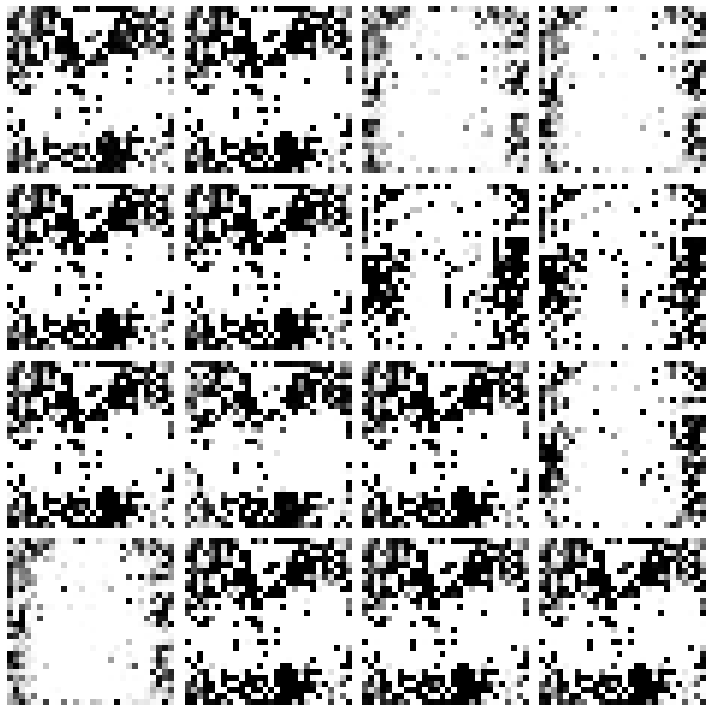

epoch: 9401, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.112604]
epoch: 9402, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 15.584601]
epoch: 9403, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 9404, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 15.238205]
epoch: 9405, [Discriminator :: d_loss: 0.002451], [ Generator :: loss: 16.118095]
epoch: 9406, [Discriminator :: d_loss: 0.000001], [ Generator :: loss: 16.118095]
epoch: 9407, [Discriminator :: d_loss: 0.034275], [ Generator :: loss: 16.118095]
epoch: 9408, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 15.545235]
epoch: 9409, [Discriminator :: d_loss: 0.000544], [ Generator :: loss: 15.796267]
epoch: 9410, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 9411, [Discriminator :: d_loss: 0.000131], [ Generator :: loss: 15.664553]
epoch: 9412, [Discriminator :: d_loss: 0.000001], [ Generator :: loss: 15.594583]
epoch: 9413, [Di

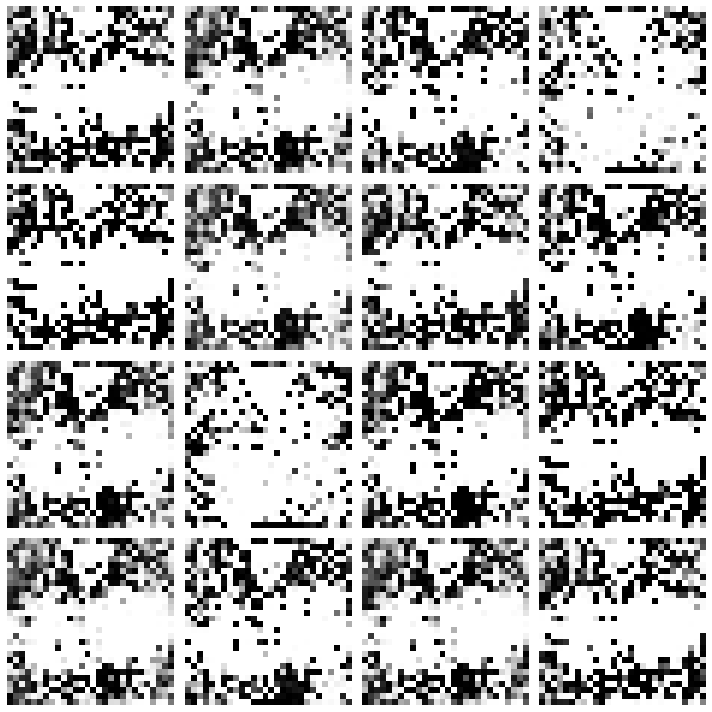

epoch: 9601, [Discriminator :: d_loss: 0.000629], [ Generator :: loss: 12.361517]
epoch: 9602, [Discriminator :: d_loss: 0.001164], [ Generator :: loss: 12.965227]
epoch: 9603, [Discriminator :: d_loss: 0.000542], [ Generator :: loss: 12.231085]
epoch: 9604, [Discriminator :: d_loss: 0.000488], [ Generator :: loss: 12.823490]
epoch: 9605, [Discriminator :: d_loss: 0.000559], [ Generator :: loss: 12.725113]
epoch: 9606, [Discriminator :: d_loss: 0.000381], [ Generator :: loss: 13.155184]
epoch: 9607, [Discriminator :: d_loss: 0.000267], [ Generator :: loss: 11.480600]
epoch: 9608, [Discriminator :: d_loss: 0.000147], [ Generator :: loss: 12.469498]
epoch: 9609, [Discriminator :: d_loss: 0.000412], [ Generator :: loss: 12.124623]
epoch: 9610, [Discriminator :: d_loss: 0.000398], [ Generator :: loss: 11.530707]
epoch: 9611, [Discriminator :: d_loss: 0.504378], [ Generator :: loss: 12.243416]
epoch: 9612, [Discriminator :: d_loss: 0.000294], [ Generator :: loss: 12.930336]
epoch: 9613, [Di

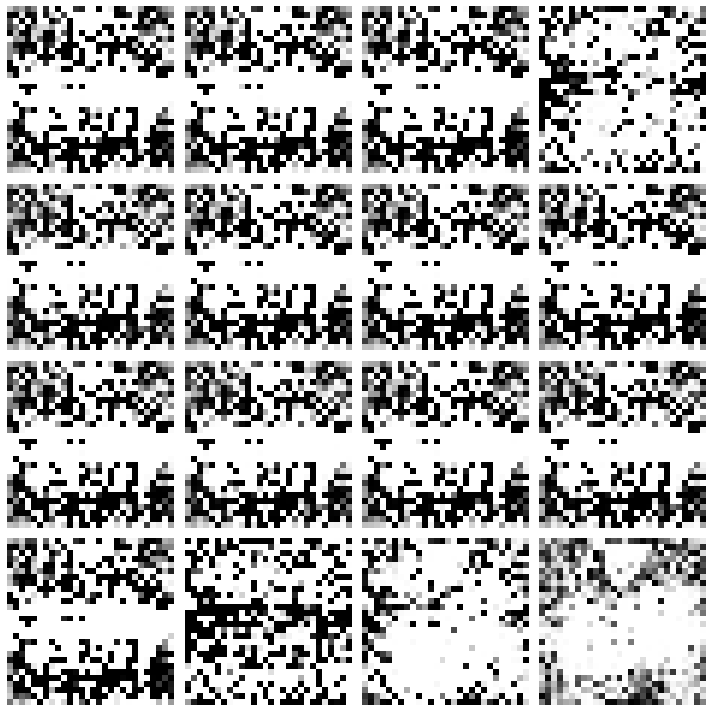

epoch: 9801, [Discriminator :: d_loss: 0.000476], [ Generator :: loss: 10.713436]
epoch: 9802, [Discriminator :: d_loss: 0.000301], [ Generator :: loss: 10.352034]
epoch: 9803, [Discriminator :: d_loss: 0.000254], [ Generator :: loss: 10.501381]
epoch: 9804, [Discriminator :: d_loss: 0.000397], [ Generator :: loss: 10.339547]
epoch: 9805, [Discriminator :: d_loss: 0.000247], [ Generator :: loss: 10.324564]
epoch: 9806, [Discriminator :: d_loss: 0.000342], [ Generator :: loss: 10.541611]
epoch: 9807, [Discriminator :: d_loss: 0.000340], [ Generator :: loss: 10.685131]
epoch: 9808, [Discriminator :: d_loss: 0.000229], [ Generator :: loss: 11.230513]
epoch: 9809, [Discriminator :: d_loss: 0.000178], [ Generator :: loss: 11.412426]
epoch: 9810, [Discriminator :: d_loss: 0.000154], [ Generator :: loss: 11.221039]
epoch: 9811, [Discriminator :: d_loss: 0.000120], [ Generator :: loss: 10.058716]
epoch: 9812, [Discriminator :: d_loss: 0.000226], [ Generator :: loss: 11.082739]
epoch: 9813, [Di

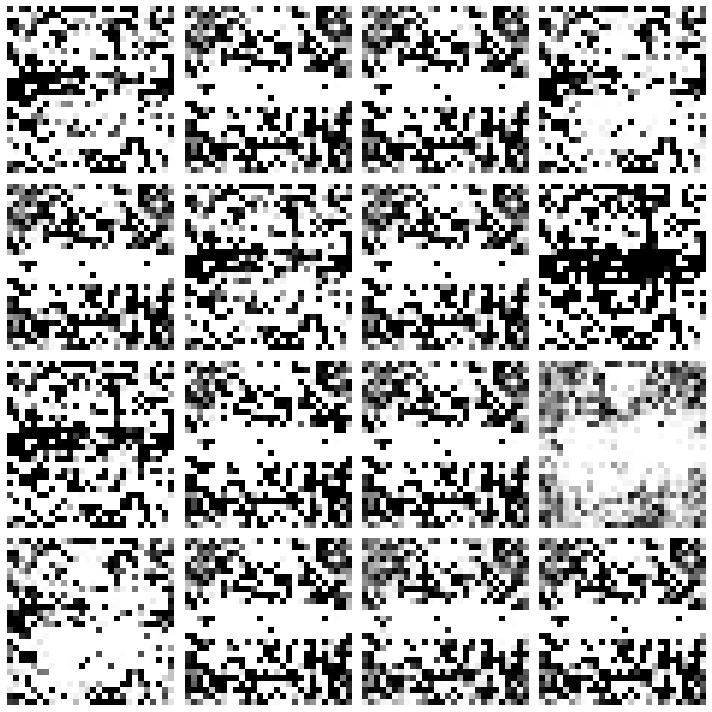

epoch: 10001, [Discriminator :: d_loss: 0.503878], [ Generator :: loss: 10.346241]
epoch: 10002, [Discriminator :: d_loss: 0.000139], [ Generator :: loss: 10.852734]
epoch: 10003, [Discriminator :: d_loss: 0.000112], [ Generator :: loss: 11.476827]
epoch: 10004, [Discriminator :: d_loss: 0.000109], [ Generator :: loss: 10.327676]
epoch: 10005, [Discriminator :: d_loss: 0.000147], [ Generator :: loss: 10.551833]
epoch: 10006, [Discriminator :: d_loss: 0.000178], [ Generator :: loss: 10.460649]
epoch: 10007, [Discriminator :: d_loss: 0.000137], [ Generator :: loss: 10.068934]
epoch: 10008, [Discriminator :: d_loss: 0.000182], [ Generator :: loss: 9.334242]
epoch: 10009, [Discriminator :: d_loss: 0.000155], [ Generator :: loss: 10.344983]
epoch: 10010, [Discriminator :: d_loss: 0.000129], [ Generator :: loss: 10.527447]
epoch: 10011, [Discriminator :: d_loss: 0.000130], [ Generator :: loss: 9.773002]
epoch: 10012, [Discriminator :: d_loss: 1.007595], [ Generator :: loss: 9.385661]
epoch: 

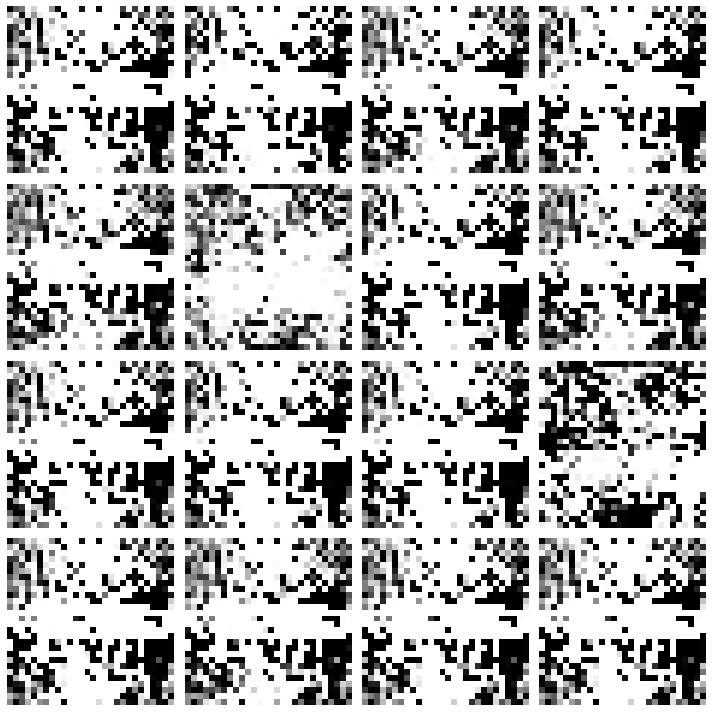

epoch: 10201, [Discriminator :: d_loss: 0.000227], [ Generator :: loss: 10.189003]
epoch: 10202, [Discriminator :: d_loss: 0.000249], [ Generator :: loss: 9.561577]
epoch: 10203, [Discriminator :: d_loss: 0.000203], [ Generator :: loss: 10.578054]
epoch: 10204, [Discriminator :: d_loss: 0.000166], [ Generator :: loss: 10.457878]
epoch: 10205, [Discriminator :: d_loss: 0.000219], [ Generator :: loss: 10.298018]
epoch: 10206, [Discriminator :: d_loss: 0.000183], [ Generator :: loss: 10.147577]
epoch: 10207, [Discriminator :: d_loss: 0.000184], [ Generator :: loss: 10.289499]
epoch: 10208, [Discriminator :: d_loss: 0.000102], [ Generator :: loss: 10.343507]
epoch: 10209, [Discriminator :: d_loss: 0.000152], [ Generator :: loss: 10.306985]
epoch: 10210, [Discriminator :: d_loss: 0.000128], [ Generator :: loss: 10.291281]
epoch: 10211, [Discriminator :: d_loss: 0.000126], [ Generator :: loss: 10.238717]
epoch: 10212, [Discriminator :: d_loss: 0.000161], [ Generator :: loss: 10.469020]
epoch

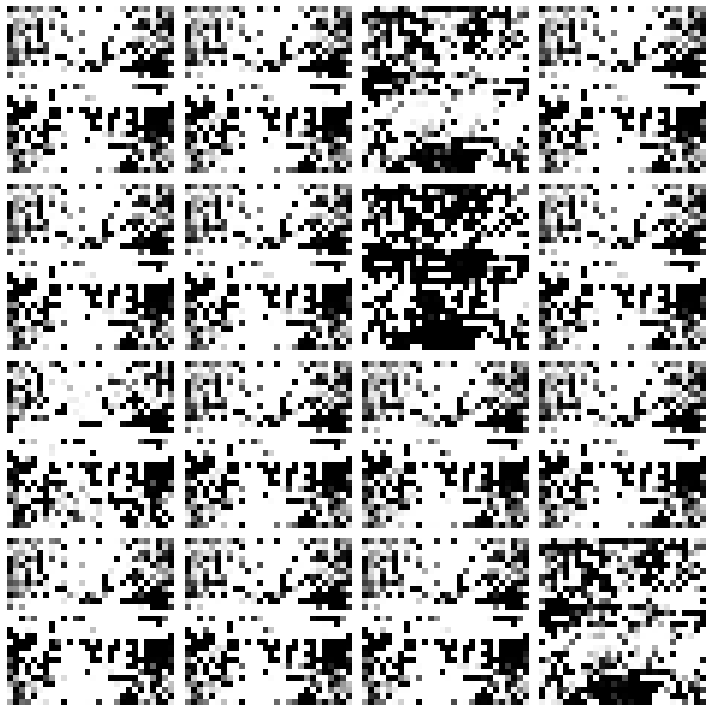

epoch: 10401, [Discriminator :: d_loss: 0.000102], [ Generator :: loss: 10.707237]
epoch: 10402, [Discriminator :: d_loss: 0.000097], [ Generator :: loss: 10.113458]
epoch: 10403, [Discriminator :: d_loss: 0.000093], [ Generator :: loss: 10.079967]
epoch: 10404, [Discriminator :: d_loss: 0.503775], [ Generator :: loss: 10.266745]
epoch: 10405, [Discriminator :: d_loss: 0.000090], [ Generator :: loss: 10.770576]
epoch: 10406, [Discriminator :: d_loss: 0.000085], [ Generator :: loss: 10.094265]
epoch: 10407, [Discriminator :: d_loss: 0.000048], [ Generator :: loss: 11.323323]
epoch: 10408, [Discriminator :: d_loss: 0.503791], [ Generator :: loss: 10.248600]
epoch: 10409, [Discriminator :: d_loss: 0.000101], [ Generator :: loss: 10.286333]
epoch: 10410, [Discriminator :: d_loss: 0.000054], [ Generator :: loss: 10.362972]
epoch: 10411, [Discriminator :: d_loss: 0.000075], [ Generator :: loss: 10.472806]
epoch: 10412, [Discriminator :: d_loss: 0.000069], [ Generator :: loss: 10.239305]
epoc

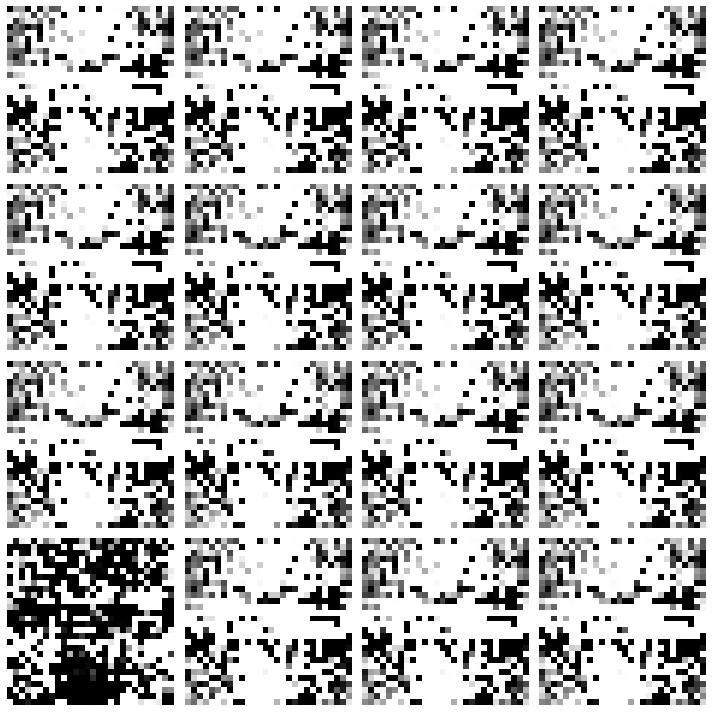

epoch: 10601, [Discriminator :: d_loss: 0.000128], [ Generator :: loss: 9.352042]
epoch: 10602, [Discriminator :: d_loss: 0.000151], [ Generator :: loss: 9.683174]
epoch: 10603, [Discriminator :: d_loss: 0.000152], [ Generator :: loss: 10.501869]
epoch: 10604, [Discriminator :: d_loss: 0.000104], [ Generator :: loss: 10.842927]
epoch: 10605, [Discriminator :: d_loss: 0.000099], [ Generator :: loss: 10.231377]
epoch: 10606, [Discriminator :: d_loss: 0.000109], [ Generator :: loss: 10.480228]
epoch: 10607, [Discriminator :: d_loss: 0.000125], [ Generator :: loss: 9.838745]
epoch: 10608, [Discriminator :: d_loss: 0.000128], [ Generator :: loss: 10.339827]
epoch: 10609, [Discriminator :: d_loss: 0.000136], [ Generator :: loss: 9.113236]
epoch: 10610, [Discriminator :: d_loss: 0.000189], [ Generator :: loss: 10.037704]
epoch: 10611, [Discriminator :: d_loss: 0.000138], [ Generator :: loss: 9.369775]
epoch: 10612, [Discriminator :: d_loss: 0.000127], [ Generator :: loss: 9.650391]
epoch: 106

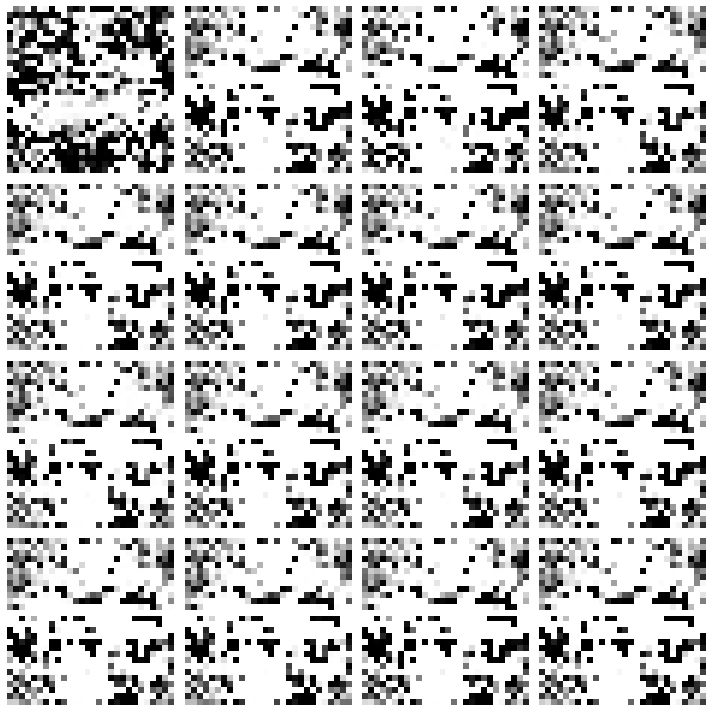

epoch: 10801, [Discriminator :: d_loss: 0.000063], [ Generator :: loss: 10.292341]
epoch: 10802, [Discriminator :: d_loss: 0.000060], [ Generator :: loss: 9.962963]
epoch: 10803, [Discriminator :: d_loss: 0.000066], [ Generator :: loss: 10.884190]
epoch: 10804, [Discriminator :: d_loss: 0.000056], [ Generator :: loss: 10.968018]
epoch: 10805, [Discriminator :: d_loss: 0.000033], [ Generator :: loss: 10.488395]
epoch: 10806, [Discriminator :: d_loss: 0.000058], [ Generator :: loss: 10.747705]
epoch: 10807, [Discriminator :: d_loss: 0.000047], [ Generator :: loss: 10.010359]
epoch: 10808, [Discriminator :: d_loss: 0.000048], [ Generator :: loss: 10.385490]
epoch: 10809, [Discriminator :: d_loss: 0.000051], [ Generator :: loss: 10.582933]
epoch: 10810, [Discriminator :: d_loss: 0.000045], [ Generator :: loss: 10.038473]
epoch: 10811, [Discriminator :: d_loss: 0.000054], [ Generator :: loss: 9.909439]
epoch: 10812, [Discriminator :: d_loss: 0.000070], [ Generator :: loss: 10.635923]
epoch:

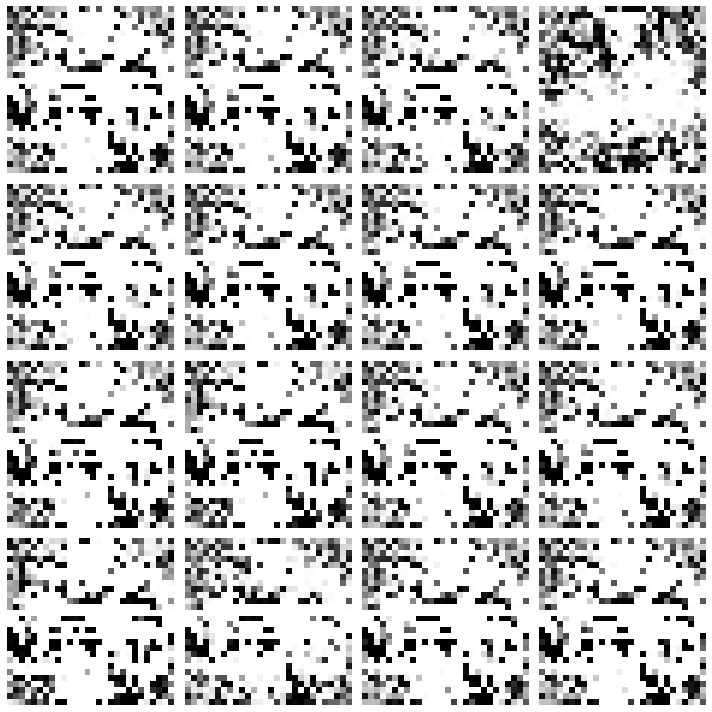

epoch: 11001, [Discriminator :: d_loss: 0.000035], [ Generator :: loss: 10.166755]
epoch: 11002, [Discriminator :: d_loss: 0.000038], [ Generator :: loss: 10.243479]
epoch: 11003, [Discriminator :: d_loss: 0.000034], [ Generator :: loss: 10.676144]
epoch: 11004, [Discriminator :: d_loss: 0.000071], [ Generator :: loss: 11.011010]
epoch: 11005, [Discriminator :: d_loss: 0.000024], [ Generator :: loss: 10.081312]
epoch: 11006, [Discriminator :: d_loss: 0.000073], [ Generator :: loss: 11.211290]
epoch: 11007, [Discriminator :: d_loss: 0.000066], [ Generator :: loss: 11.690528]
epoch: 11008, [Discriminator :: d_loss: 0.000067], [ Generator :: loss: 10.216850]
epoch: 11009, [Discriminator :: d_loss: 0.000071], [ Generator :: loss: 10.173786]
epoch: 11010, [Discriminator :: d_loss: 0.000022], [ Generator :: loss: 10.041038]
epoch: 11011, [Discriminator :: d_loss: 0.000024], [ Generator :: loss: 10.912901]
epoch: 11012, [Discriminator :: d_loss: 0.000040], [ Generator :: loss: 10.097574]
epoc

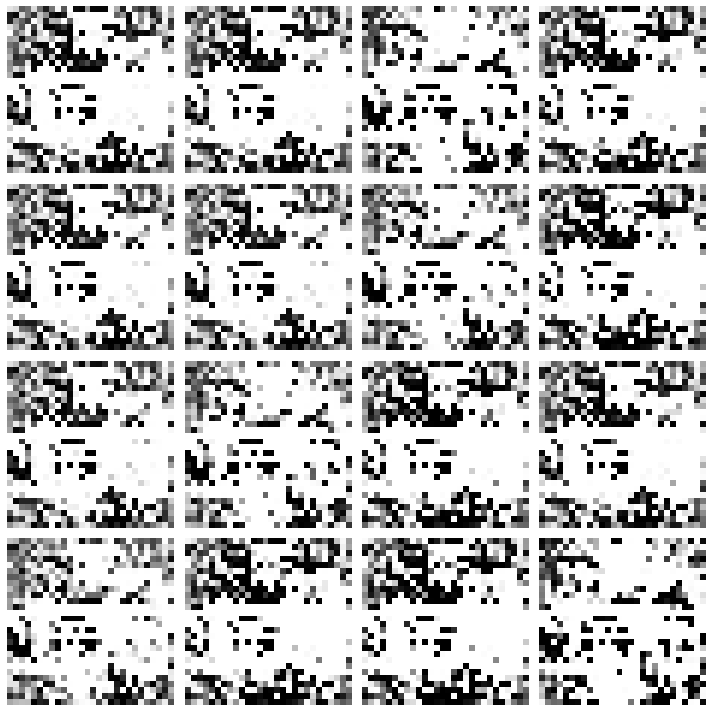

epoch: 11201, [Discriminator :: d_loss: 0.000032], [ Generator :: loss: 13.015986]
epoch: 11202, [Discriminator :: d_loss: 0.000065], [ Generator :: loss: 12.832127]
epoch: 11203, [Discriminator :: d_loss: 0.000095], [ Generator :: loss: 13.287949]
epoch: 11204, [Discriminator :: d_loss: 0.000089], [ Generator :: loss: 12.688650]
epoch: 11205, [Discriminator :: d_loss: 0.000033], [ Generator :: loss: 12.659445]
epoch: 11206, [Discriminator :: d_loss: 0.000067], [ Generator :: loss: 12.877913]
epoch: 11207, [Discriminator :: d_loss: 0.000031], [ Generator :: loss: 12.295847]
epoch: 11208, [Discriminator :: d_loss: 0.000128], [ Generator :: loss: 12.411516]
epoch: 11209, [Discriminator :: d_loss: 0.000049], [ Generator :: loss: 12.849088]
epoch: 11210, [Discriminator :: d_loss: 0.000023], [ Generator :: loss: 12.523361]
epoch: 11211, [Discriminator :: d_loss: 0.000086], [ Generator :: loss: 12.335138]
epoch: 11212, [Discriminator :: d_loss: 0.000125], [ Generator :: loss: 11.577080]
epoc

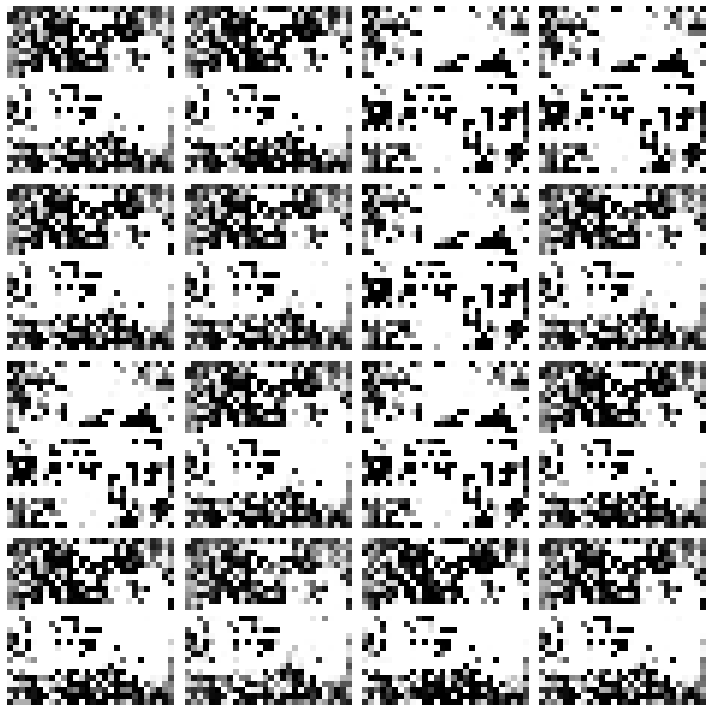

epoch: 11401, [Discriminator :: d_loss: 0.000045], [ Generator :: loss: 11.604677]
epoch: 11402, [Discriminator :: d_loss: 0.000023], [ Generator :: loss: 12.205684]
epoch: 11403, [Discriminator :: d_loss: 0.000036], [ Generator :: loss: 12.522085]
epoch: 11404, [Discriminator :: d_loss: 0.000029], [ Generator :: loss: 11.339169]
epoch: 11405, [Discriminator :: d_loss: 0.000031], [ Generator :: loss: 11.700742]
epoch: 11406, [Discriminator :: d_loss: 0.000031], [ Generator :: loss: 10.992314]
epoch: 11407, [Discriminator :: d_loss: 0.000051], [ Generator :: loss: 11.595097]
epoch: 11408, [Discriminator :: d_loss: 0.000045], [ Generator :: loss: 11.008286]
epoch: 11409, [Discriminator :: d_loss: 0.000033], [ Generator :: loss: 11.040804]
epoch: 11410, [Discriminator :: d_loss: 0.000043], [ Generator :: loss: 10.991849]
epoch: 11411, [Discriminator :: d_loss: 0.000028], [ Generator :: loss: 11.535677]
epoch: 11412, [Discriminator :: d_loss: 0.000029], [ Generator :: loss: 11.189963]
epoc

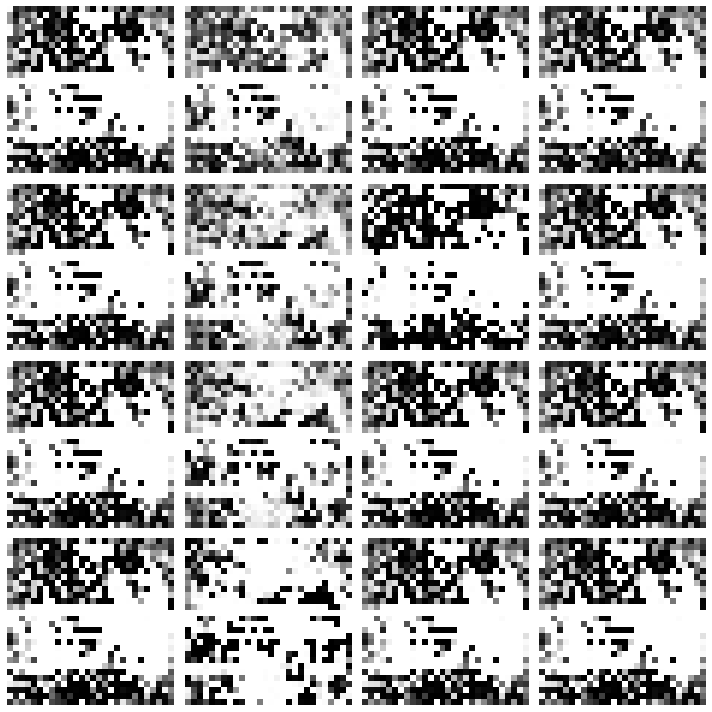

epoch: 11601, [Discriminator :: d_loss: 0.000023], [ Generator :: loss: 11.062107]
epoch: 11602, [Discriminator :: d_loss: 0.000017], [ Generator :: loss: 11.406670]
epoch: 11603, [Discriminator :: d_loss: 0.000013], [ Generator :: loss: 12.111315]
epoch: 11604, [Discriminator :: d_loss: 0.000021], [ Generator :: loss: 11.610982]
epoch: 11605, [Discriminator :: d_loss: 0.000019], [ Generator :: loss: 11.347586]
epoch: 11606, [Discriminator :: d_loss: 0.000017], [ Generator :: loss: 11.352098]
epoch: 11607, [Discriminator :: d_loss: 0.000015], [ Generator :: loss: 11.402656]
epoch: 11608, [Discriminator :: d_loss: 0.000019], [ Generator :: loss: 11.344995]
epoch: 11609, [Discriminator :: d_loss: 0.000017], [ Generator :: loss: 11.438524]
epoch: 11610, [Discriminator :: d_loss: 0.000017], [ Generator :: loss: 11.328469]
epoch: 11611, [Discriminator :: d_loss: 0.000014], [ Generator :: loss: 11.231061]
epoch: 11612, [Discriminator :: d_loss: 0.000015], [ Generator :: loss: 11.820396]
epoc

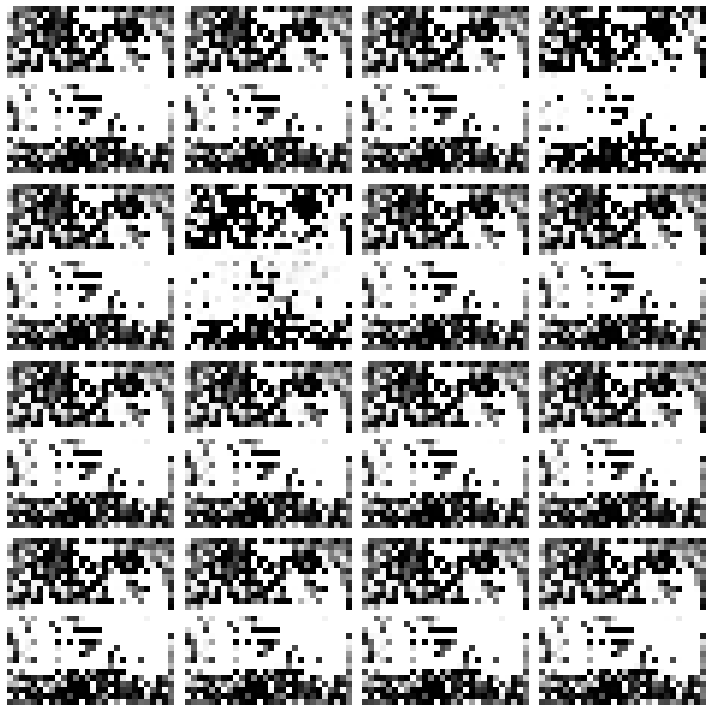

epoch: 11801, [Discriminator :: d_loss: 0.000010], [ Generator :: loss: 11.944696]
epoch: 11802, [Discriminator :: d_loss: 0.000011], [ Generator :: loss: 11.445550]
epoch: 11803, [Discriminator :: d_loss: 0.000011], [ Generator :: loss: 11.387820]
epoch: 11804, [Discriminator :: d_loss: 0.000011], [ Generator :: loss: 11.221748]
epoch: 11805, [Discriminator :: d_loss: 0.000009], [ Generator :: loss: 11.224225]
epoch: 11806, [Discriminator :: d_loss: 0.000012], [ Generator :: loss: 11.160624]
epoch: 11807, [Discriminator :: d_loss: 0.503700], [ Generator :: loss: 11.048405]
epoch: 11808, [Discriminator :: d_loss: 0.000012], [ Generator :: loss: 11.534927]
epoch: 11809, [Discriminator :: d_loss: 0.000010], [ Generator :: loss: 11.620681]
epoch: 11810, [Discriminator :: d_loss: 0.000013], [ Generator :: loss: 11.327807]
epoch: 11811, [Discriminator :: d_loss: 0.000013], [ Generator :: loss: 11.088207]
epoch: 11812, [Discriminator :: d_loss: 0.000012], [ Generator :: loss: 11.187321]
epoc

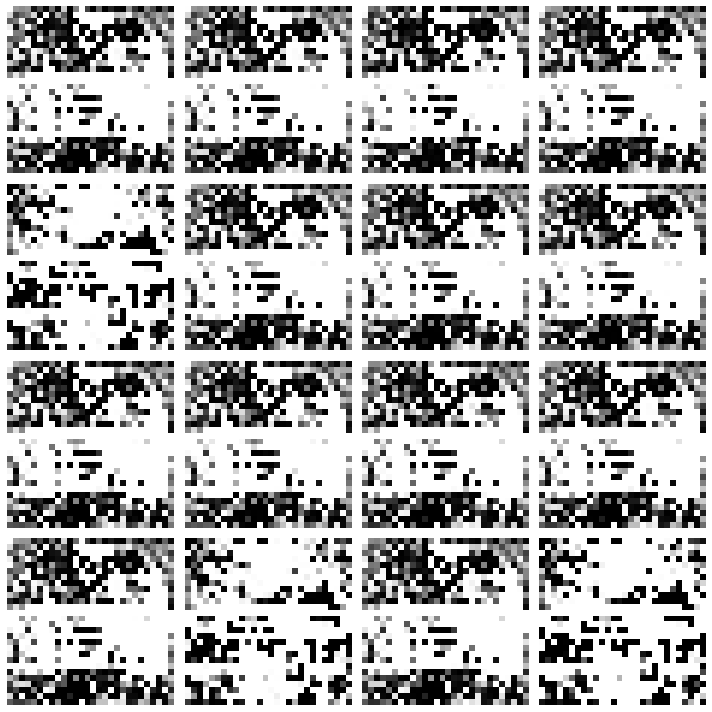

epoch: 12001, [Discriminator :: d_loss: 0.000008], [ Generator :: loss: 11.685779]
epoch: 12002, [Discriminator :: d_loss: 0.000007], [ Generator :: loss: 11.411336]
epoch: 12003, [Discriminator :: d_loss: 0.000006], [ Generator :: loss: 11.730056]
epoch: 12004, [Discriminator :: d_loss: 0.000008], [ Generator :: loss: 11.512755]
epoch: 12005, [Discriminator :: d_loss: 0.000006], [ Generator :: loss: 11.725223]
epoch: 12006, [Discriminator :: d_loss: 0.000007], [ Generator :: loss: 11.624666]
epoch: 12007, [Discriminator :: d_loss: 0.000008], [ Generator :: loss: 11.465670]
epoch: 12008, [Discriminator :: d_loss: 0.000008], [ Generator :: loss: 11.473658]
epoch: 12009, [Discriminator :: d_loss: 0.000009], [ Generator :: loss: 11.490002]
epoch: 12010, [Discriminator :: d_loss: 0.000009], [ Generator :: loss: 11.524137]
epoch: 12011, [Discriminator :: d_loss: 0.000007], [ Generator :: loss: 11.676952]
epoch: 12012, [Discriminator :: d_loss: 0.000008], [ Generator :: loss: 11.279846]
epoc

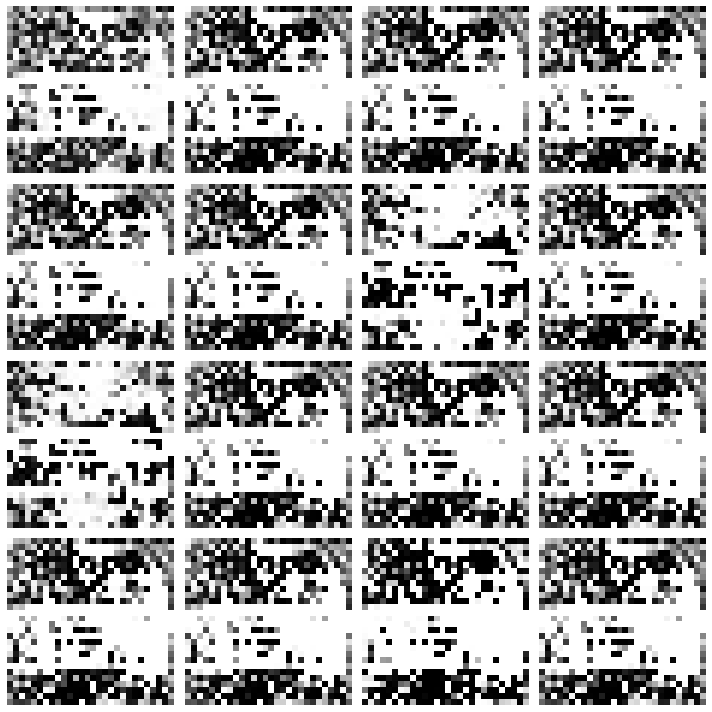

epoch: 12201, [Discriminator :: d_loss: 0.000005], [ Generator :: loss: 11.778807]
epoch: 12202, [Discriminator :: d_loss: 0.000004], [ Generator :: loss: 12.269461]
epoch: 12203, [Discriminator :: d_loss: 0.000005], [ Generator :: loss: 12.173254]
epoch: 12204, [Discriminator :: d_loss: 0.000005], [ Generator :: loss: 11.840420]
epoch: 12205, [Discriminator :: d_loss: 0.000005], [ Generator :: loss: 12.084347]
epoch: 12206, [Discriminator :: d_loss: 0.000005], [ Generator :: loss: 12.204050]
epoch: 12207, [Discriminator :: d_loss: 0.000005], [ Generator :: loss: 11.957652]
epoch: 12208, [Discriminator :: d_loss: 0.000004], [ Generator :: loss: 12.248508]
epoch: 12209, [Discriminator :: d_loss: 0.000004], [ Generator :: loss: 12.226571]
epoch: 12210, [Discriminator :: d_loss: 0.000004], [ Generator :: loss: 11.942616]
epoch: 12211, [Discriminator :: d_loss: 0.000004], [ Generator :: loss: 11.818869]
epoch: 12212, [Discriminator :: d_loss: 0.000005], [ Generator :: loss: 12.374698]
epoc

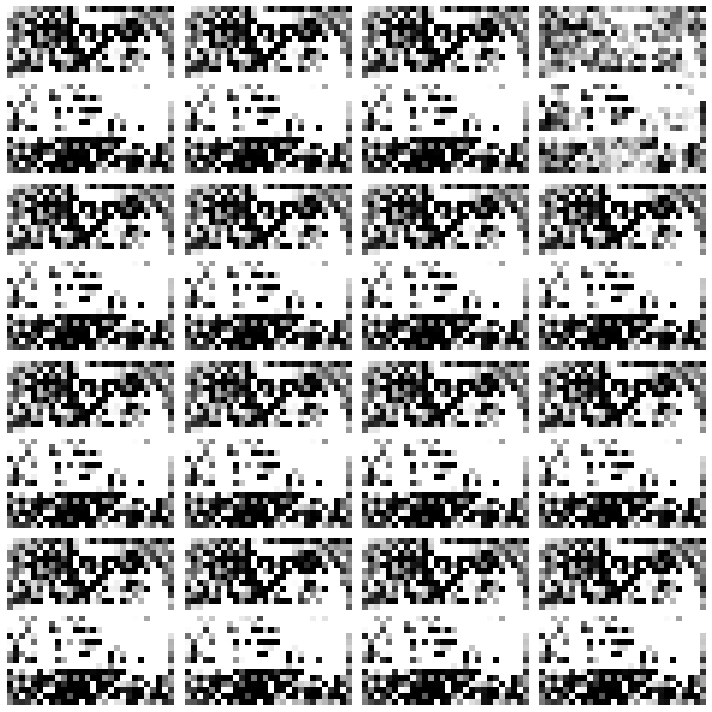

epoch: 12401, [Discriminator :: d_loss: 0.000055], [ Generator :: loss: 10.988048]
epoch: 12402, [Discriminator :: d_loss: 0.000300], [ Generator :: loss: 10.477657]
epoch: 12403, [Discriminator :: d_loss: 0.002494], [ Generator :: loss: 11.822920]
epoch: 12404, [Discriminator :: d_loss: 0.000060], [ Generator :: loss: 12.284053]
epoch: 12405, [Discriminator :: d_loss: 0.000127], [ Generator :: loss: 10.932093]
epoch: 12406, [Discriminator :: d_loss: 0.000355], [ Generator :: loss: 10.637283]
epoch: 12407, [Discriminator :: d_loss: 0.140639], [ Generator :: loss: 13.294619]
epoch: 12408, [Discriminator :: d_loss: 0.003435], [ Generator :: loss: 13.079867]
epoch: 12409, [Discriminator :: d_loss: 0.000029], [ Generator :: loss: 14.862890]
epoch: 12410, [Discriminator :: d_loss: 0.000002], [ Generator :: loss: 15.939423]
epoch: 12411, [Discriminator :: d_loss: 0.000001], [ Generator :: loss: 16.118095]
epoch: 12412, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

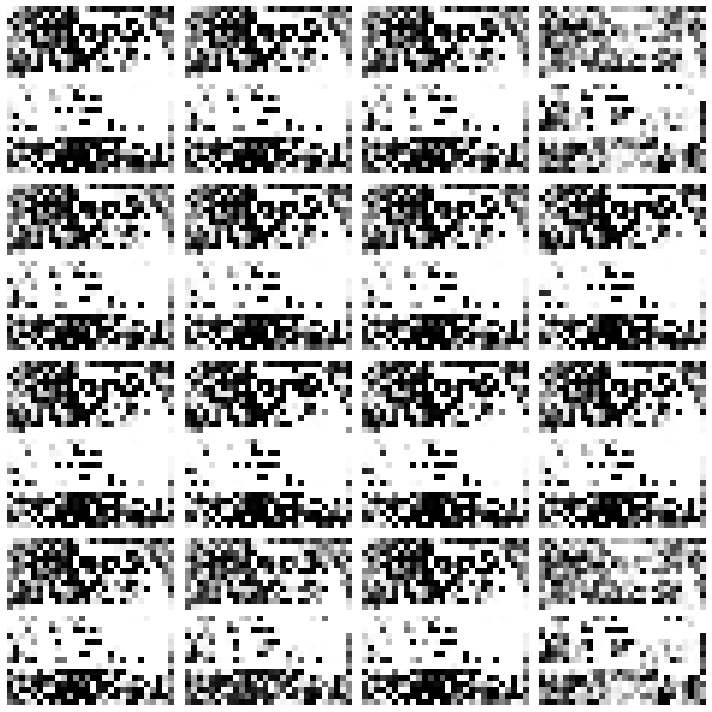

epoch: 12601, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12602, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12603, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12604, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12605, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12606, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12607, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12608, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12609, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12610, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12611, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12612, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

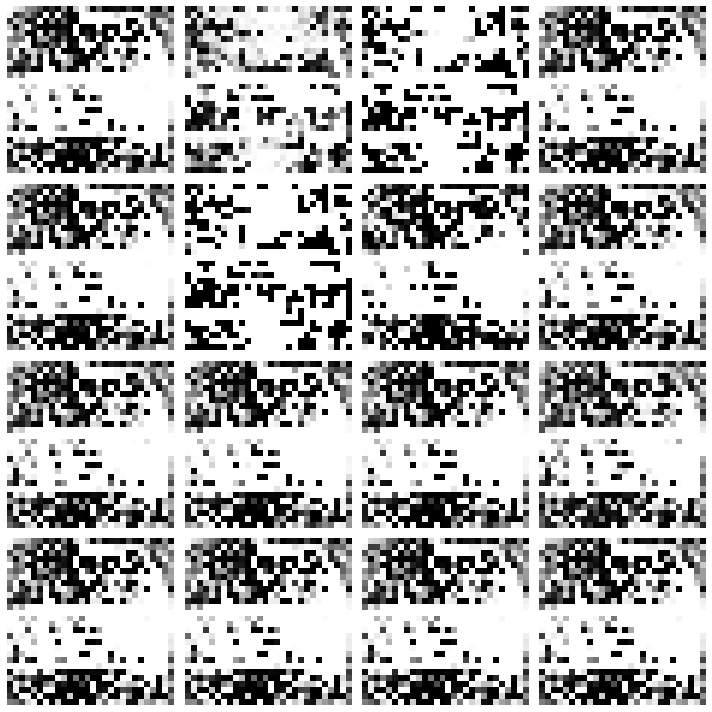

epoch: 12801, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12802, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12803, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12804, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12805, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12806, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12807, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12808, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12809, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12810, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12811, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 12812, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

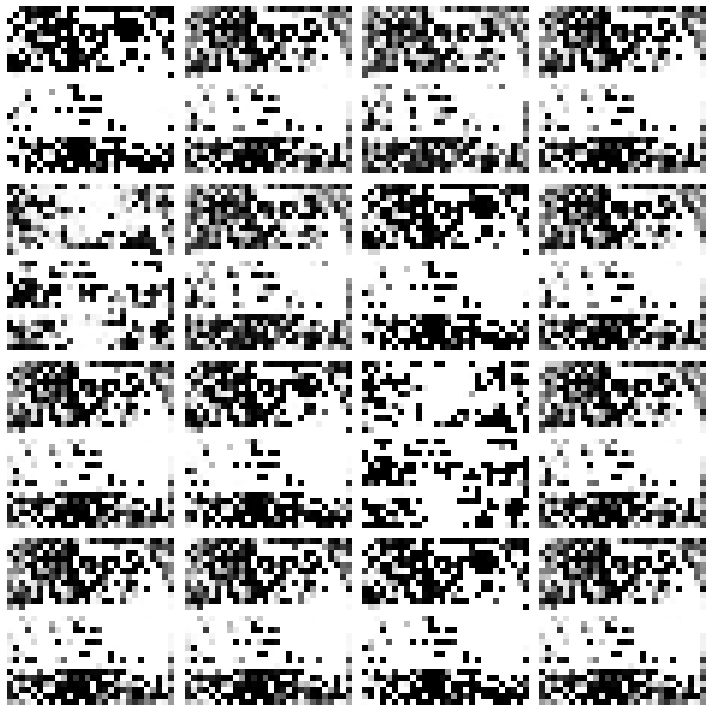

epoch: 13001, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13002, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13003, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13004, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13005, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13006, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13007, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13008, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13009, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13010, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13011, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13012, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

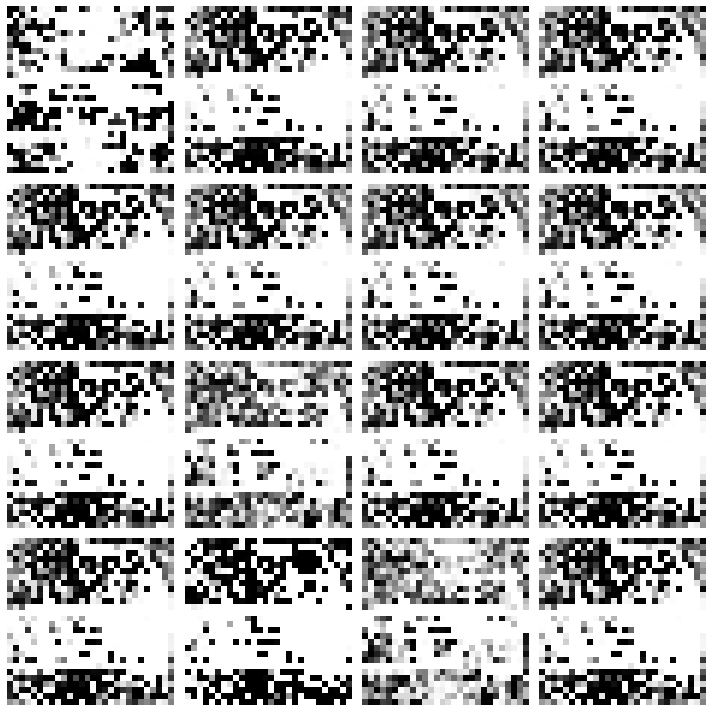

epoch: 13201, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13202, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13203, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13204, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13205, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13206, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13207, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13208, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13209, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13210, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13211, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13212, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

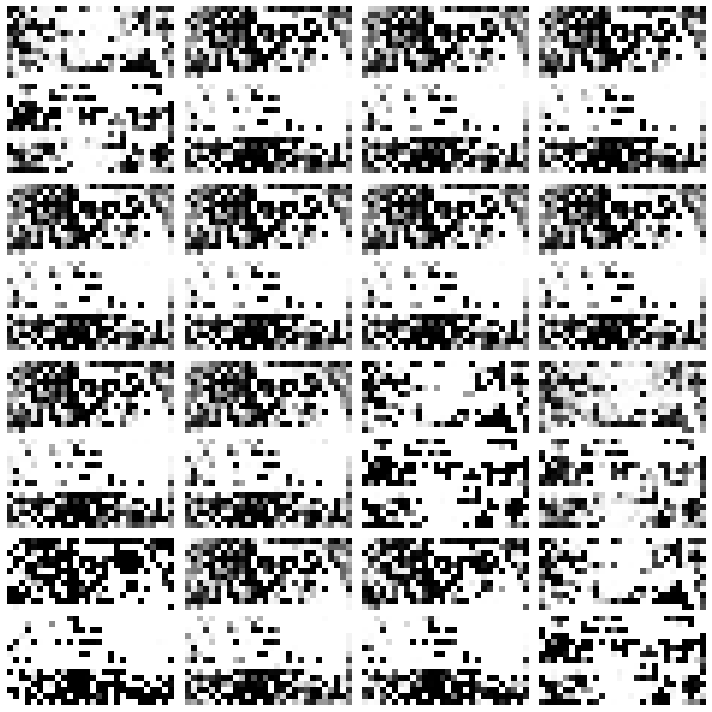

epoch: 13401, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13402, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13403, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13404, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13405, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13406, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13407, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13408, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13409, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13410, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13411, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13412, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

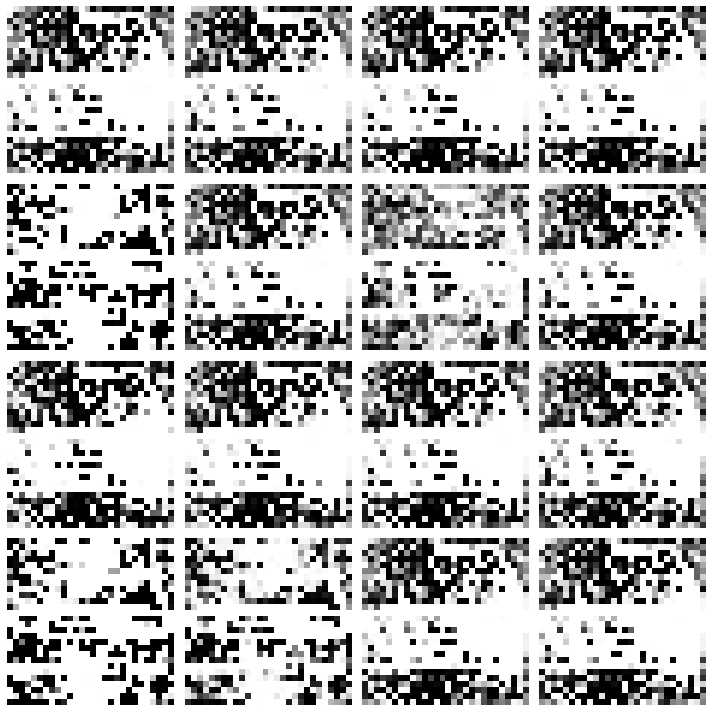

epoch: 13601, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13602, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13603, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13604, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13605, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13606, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13607, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13608, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13609, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13610, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13611, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13612, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

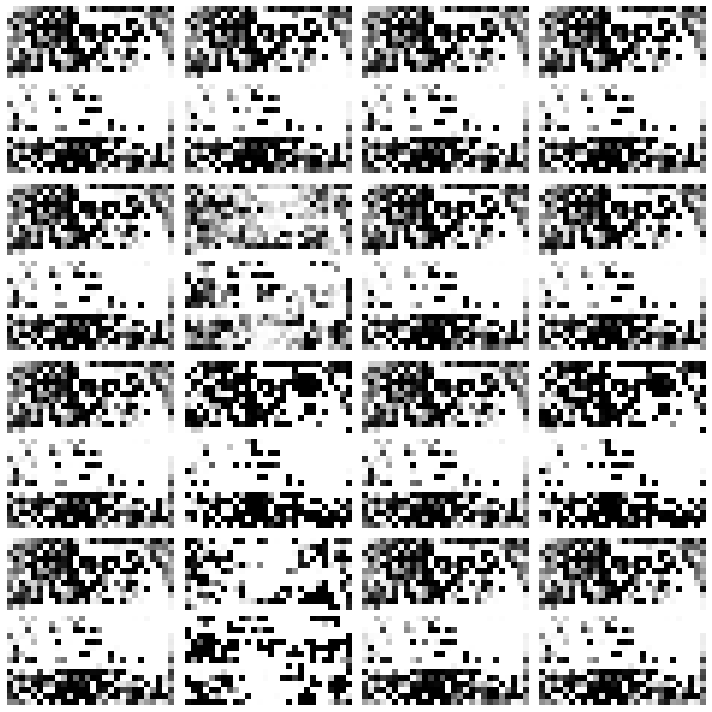

epoch: 13801, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13802, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13803, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13804, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13805, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13806, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13807, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13808, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13809, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13810, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13811, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 13812, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

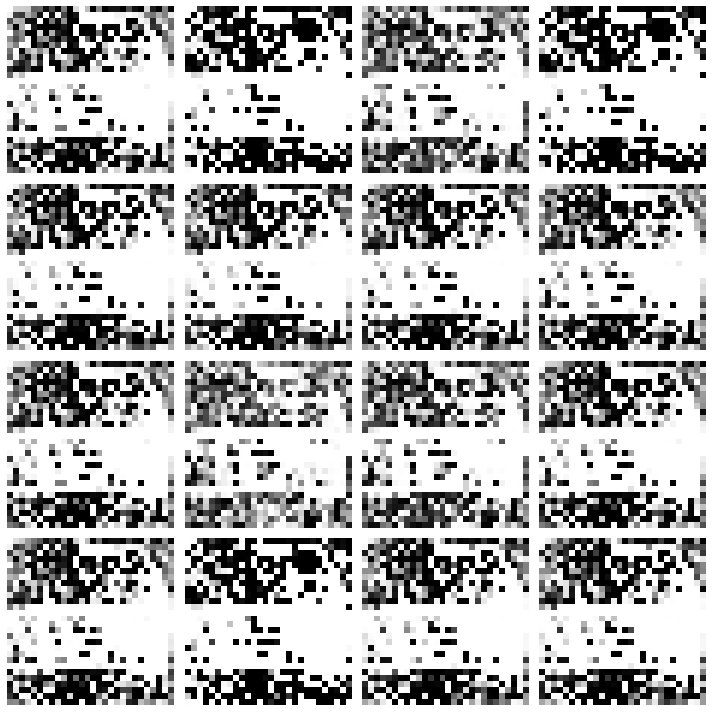

epoch: 14001, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14002, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14003, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14004, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14005, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14006, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14007, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14008, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14009, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14010, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14011, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14012, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

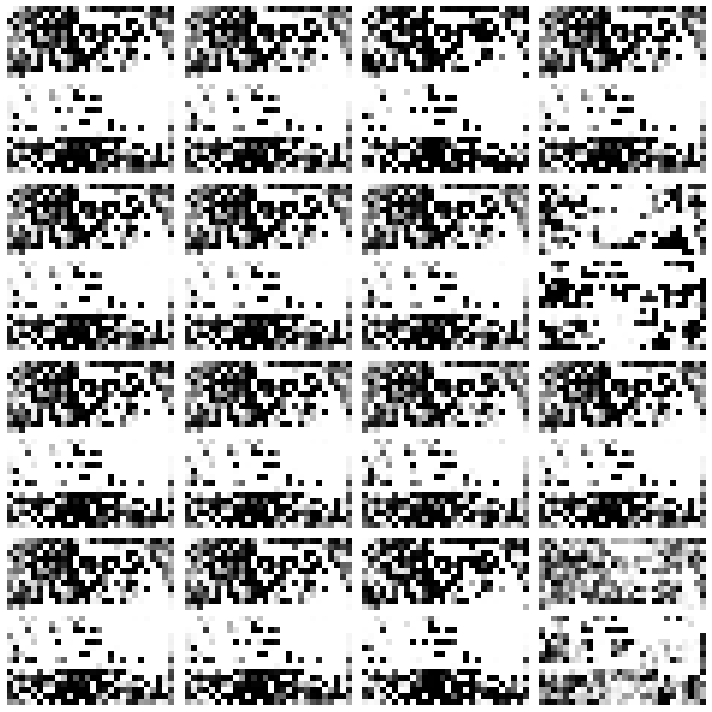

epoch: 14201, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14202, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14203, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14204, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14205, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14206, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14207, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14208, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14209, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14210, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14211, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14212, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

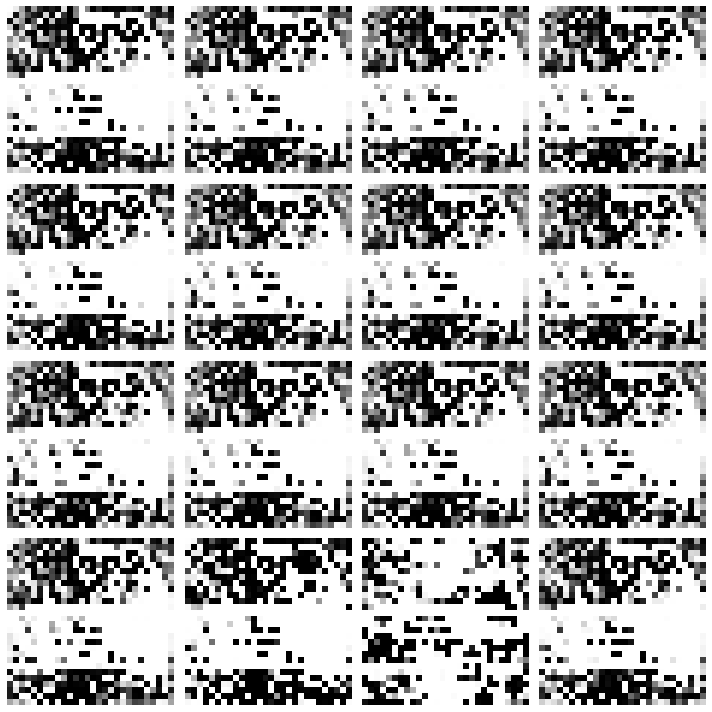

epoch: 14401, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14402, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14403, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14404, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14405, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14406, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14407, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14408, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14409, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14410, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14411, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14412, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

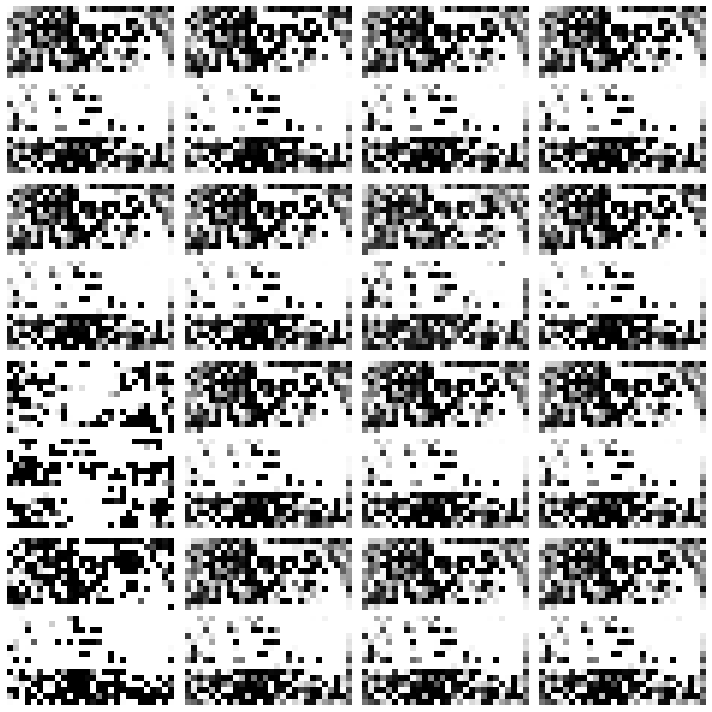

epoch: 14601, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14602, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14603, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14604, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14605, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14606, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14607, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14608, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14609, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14610, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14611, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14612, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

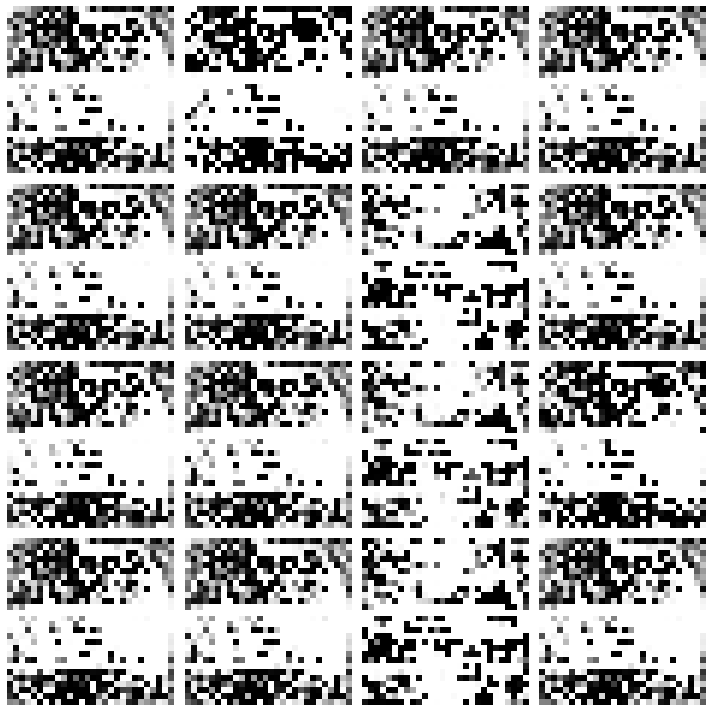

epoch: 14801, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14802, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14803, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14804, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14805, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14806, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14807, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14808, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14809, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14810, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14811, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 14812, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

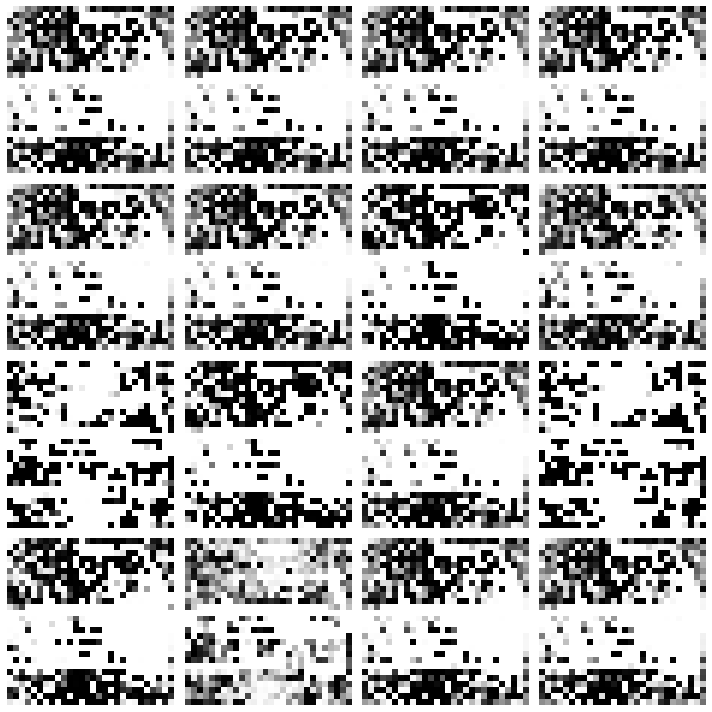

epoch: 15001, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15002, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15003, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15004, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15005, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15006, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15007, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15008, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15009, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15010, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15011, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15012, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

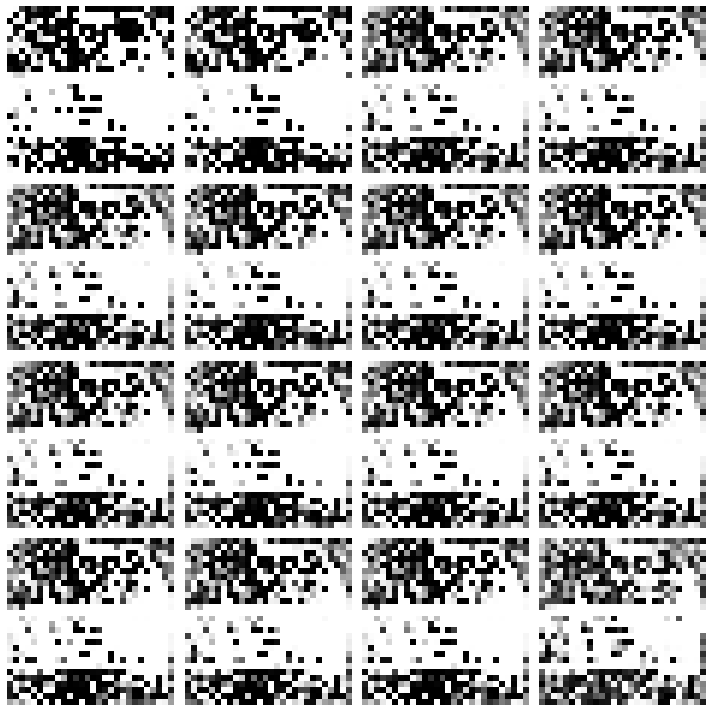

epoch: 15201, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15202, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15203, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15204, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15205, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15206, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15207, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15208, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15209, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15210, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15211, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15212, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

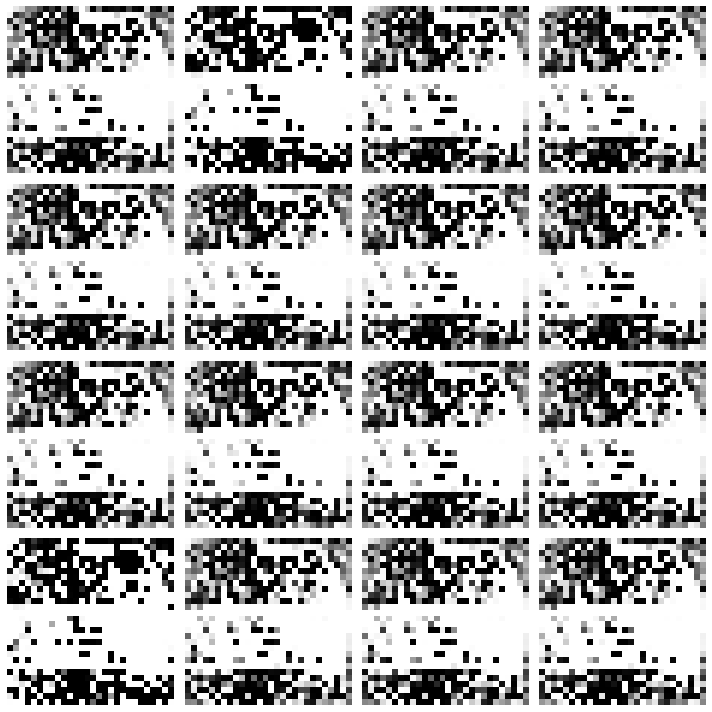

epoch: 15401, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15402, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15403, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15404, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15405, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15406, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15407, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15408, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15409, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15410, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15411, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15412, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

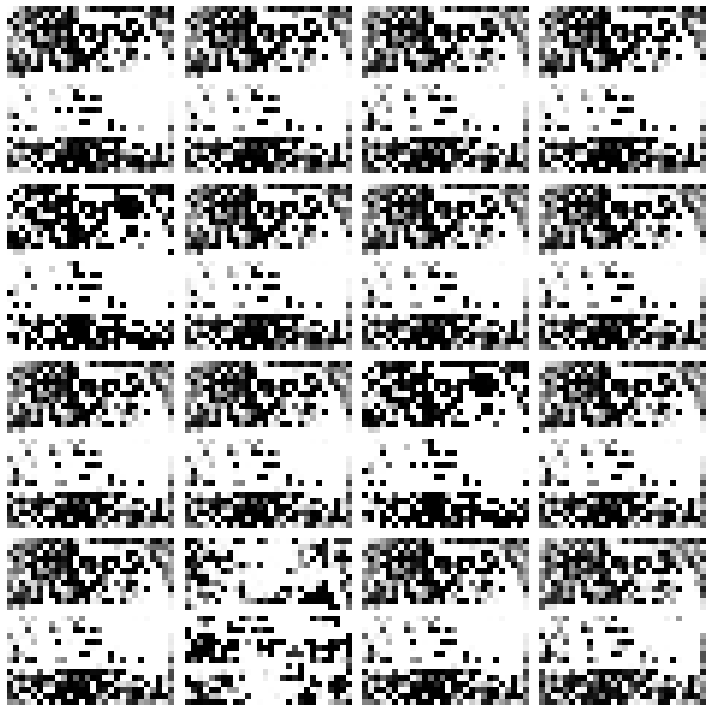

epoch: 15601, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15602, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15603, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15604, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15605, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15606, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15607, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15608, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15609, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15610, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15611, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15612, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

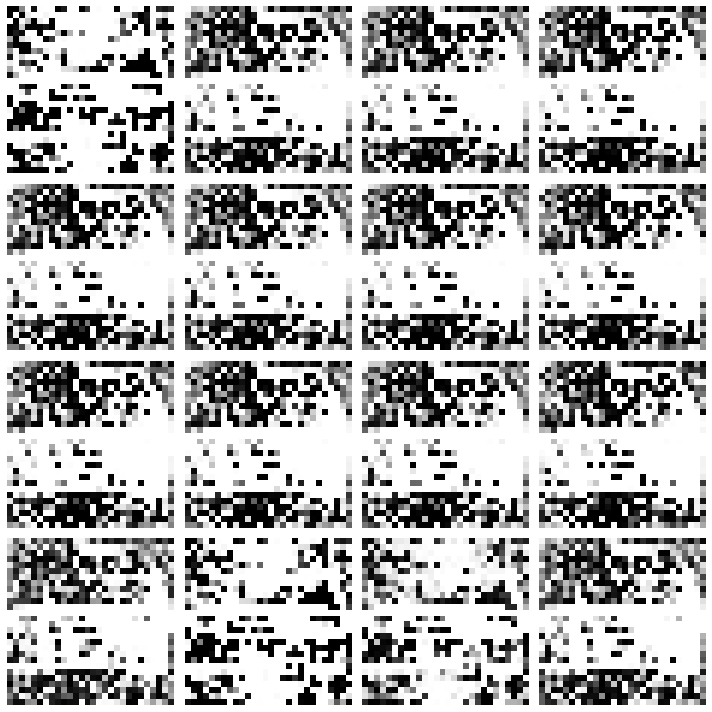

epoch: 15801, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15802, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15803, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15804, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15805, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15806, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15807, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15808, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15809, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15810, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15811, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 15812, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

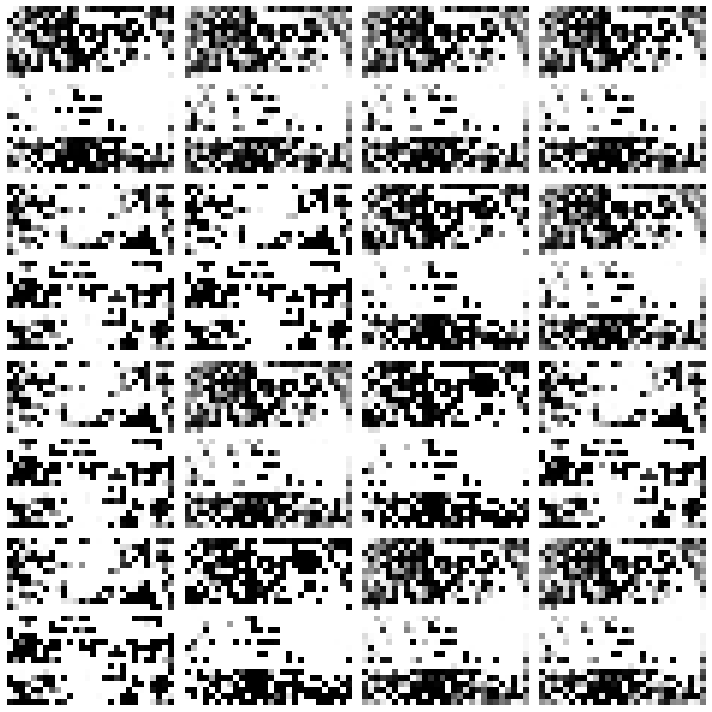

epoch: 16001, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16002, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16003, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16004, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16005, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16006, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16007, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16008, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16009, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16010, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16011, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16012, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

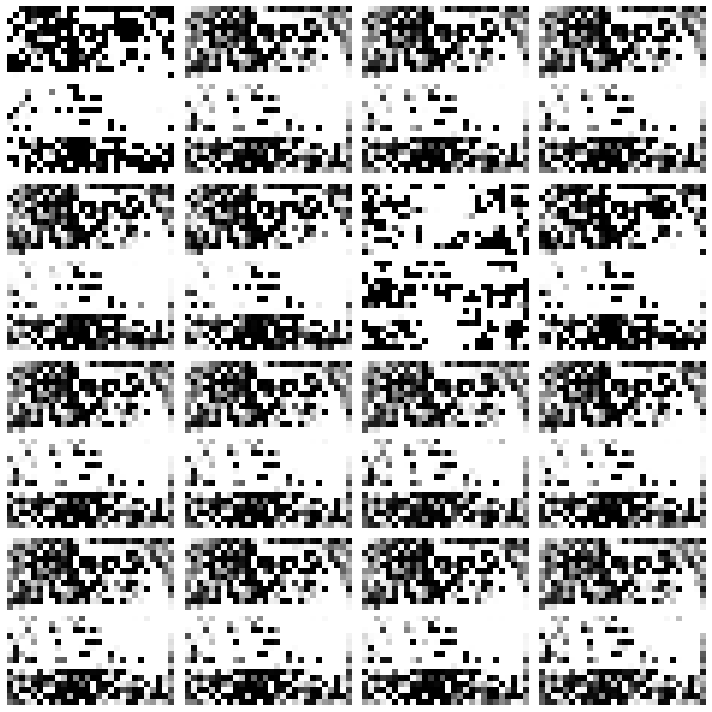

epoch: 16201, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16202, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16203, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16204, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16205, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16206, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16207, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16208, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16209, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16210, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16211, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16212, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

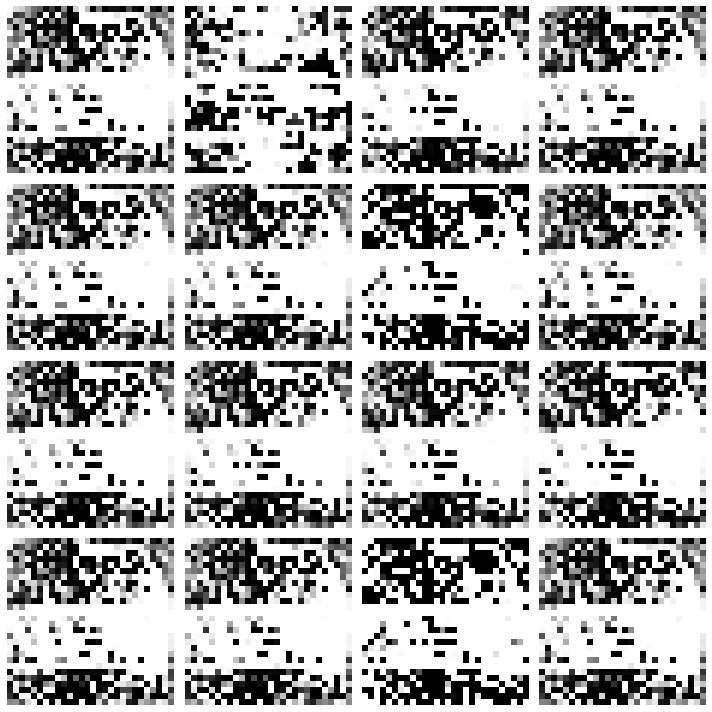

epoch: 16401, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16402, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16403, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16404, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16405, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16406, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16407, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16408, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16409, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16410, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16411, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16412, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

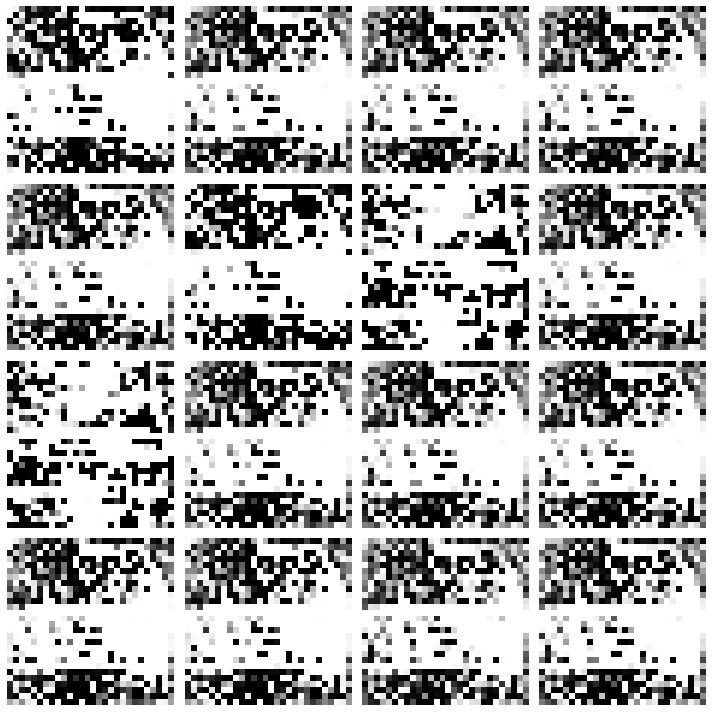

epoch: 16601, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16602, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16603, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16604, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16605, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16606, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16607, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16608, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16609, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16610, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16611, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16612, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

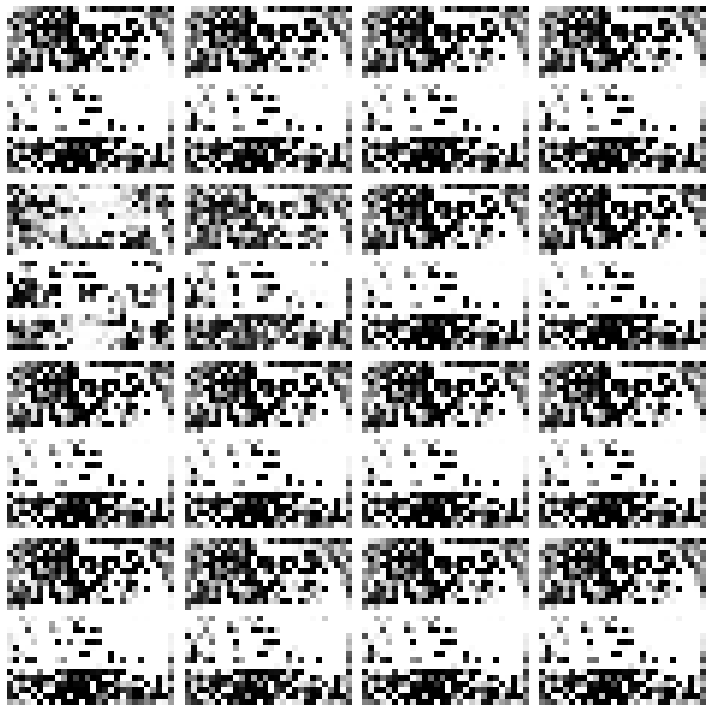

epoch: 16801, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16802, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16803, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16804, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16805, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16806, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16807, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16808, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16809, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16810, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16811, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 16812, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

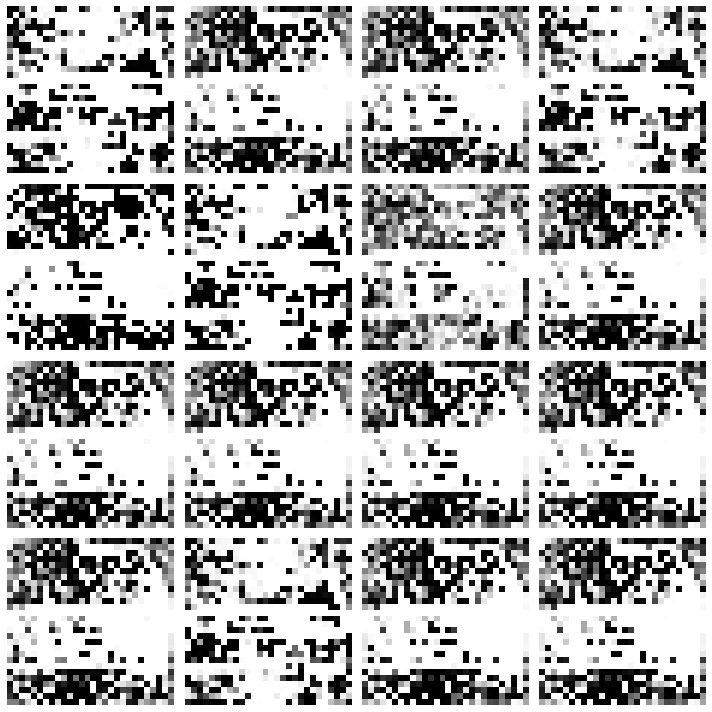

epoch: 17001, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17002, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17003, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17004, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17005, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17006, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17007, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17008, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17009, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17010, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17011, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17012, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

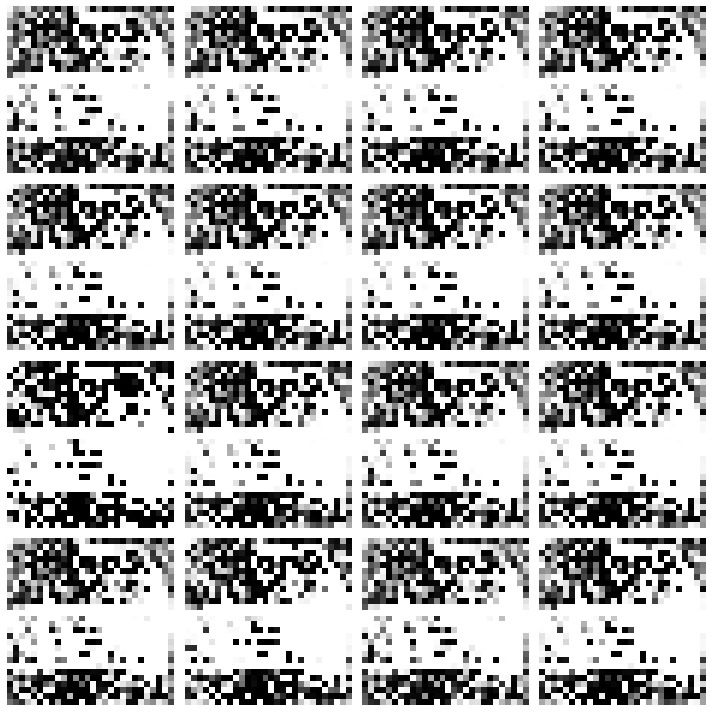

epoch: 17201, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17202, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17203, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17204, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17205, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17206, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17207, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17208, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17209, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17210, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17211, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17212, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

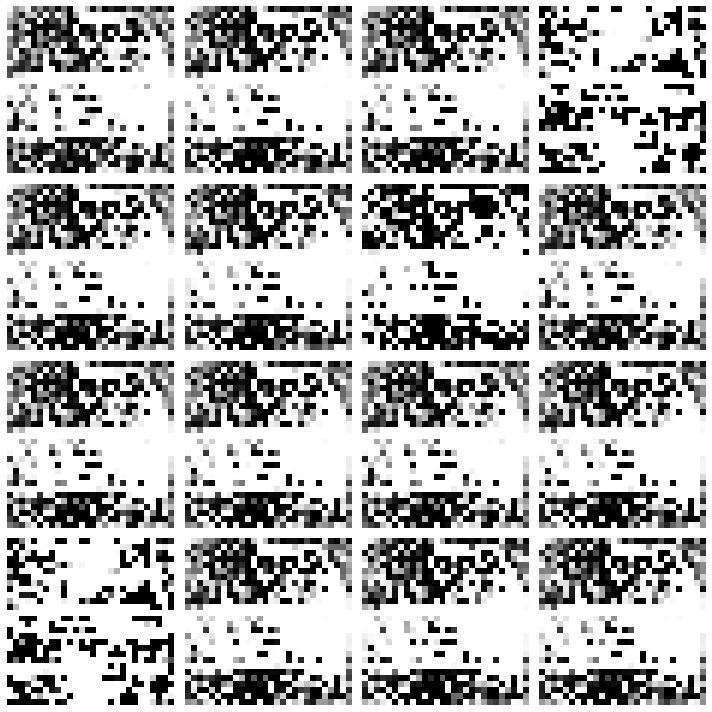

epoch: 17401, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17402, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17403, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17404, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17405, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17406, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17407, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17408, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17409, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17410, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17411, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17412, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

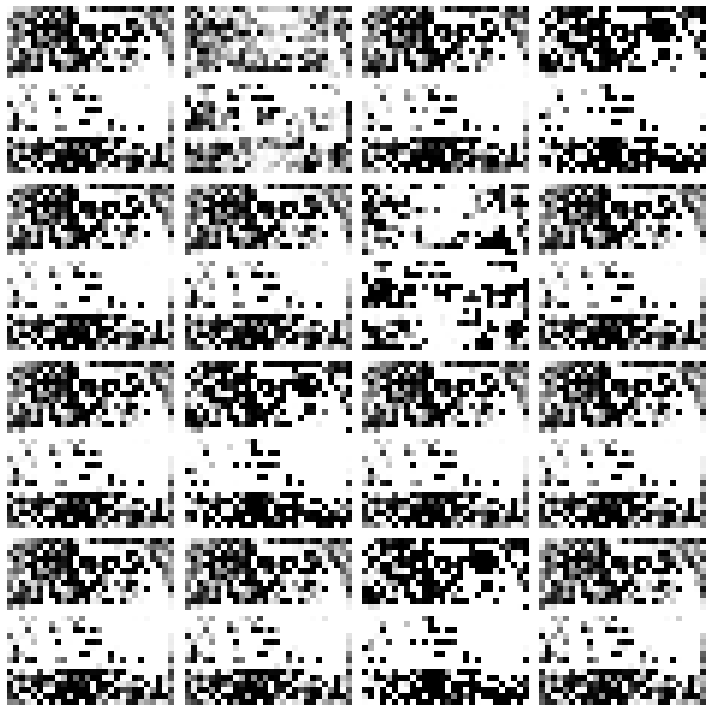

epoch: 17601, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17602, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17603, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17604, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17605, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17606, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17607, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17608, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17609, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17610, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17611, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17612, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

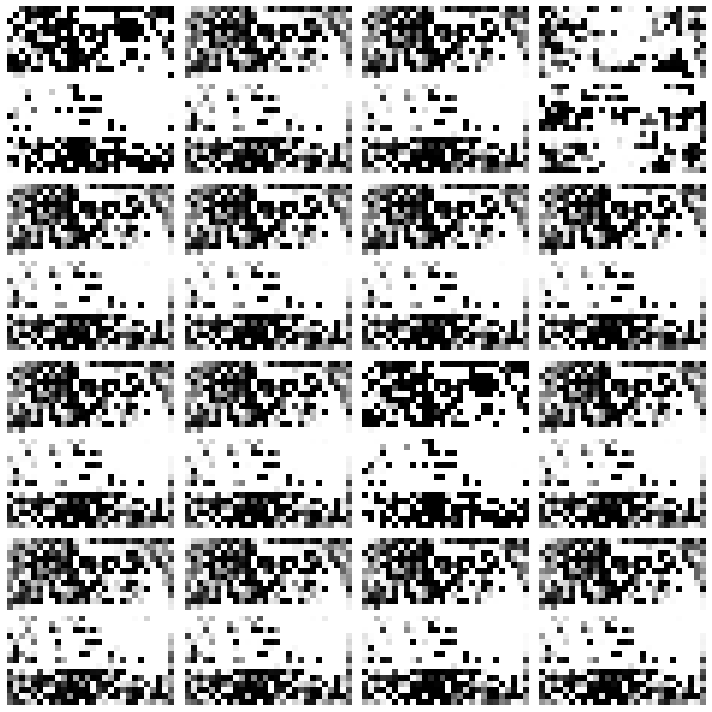

epoch: 17801, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17802, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17803, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17804, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17805, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17806, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17807, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17808, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17809, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17810, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17811, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 17812, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

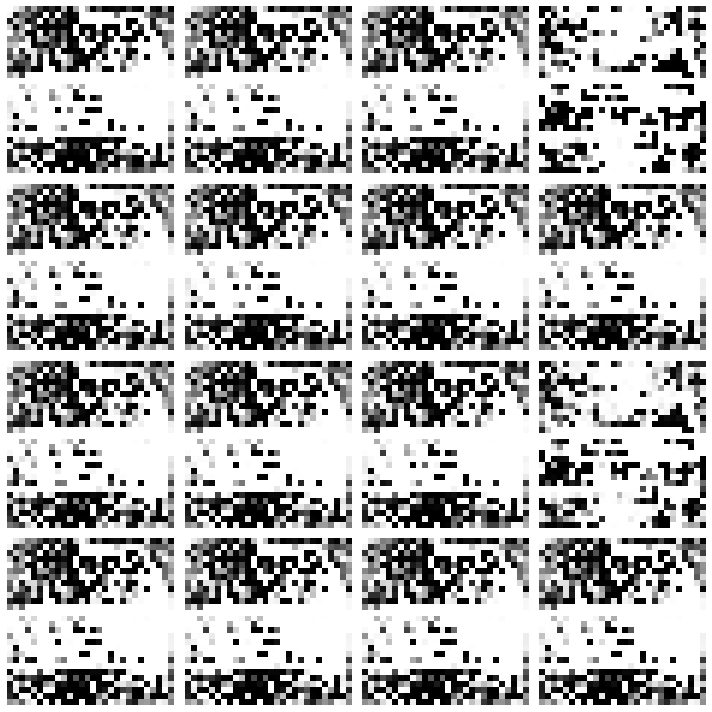

epoch: 18001, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18002, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18003, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18004, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18005, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18006, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18007, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18008, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18009, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18010, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18011, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18012, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

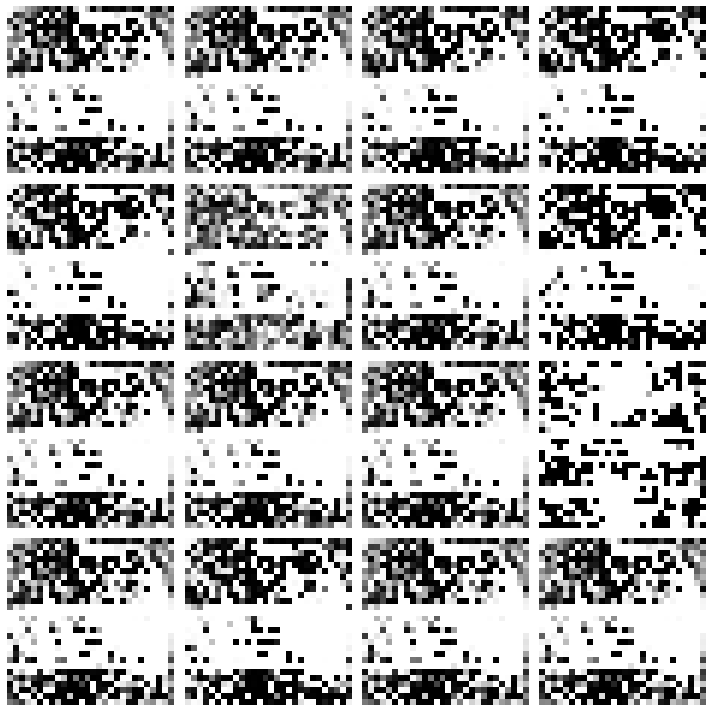

epoch: 18201, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18202, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18203, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18204, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18205, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18206, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18207, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18208, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18209, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18210, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18211, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18212, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

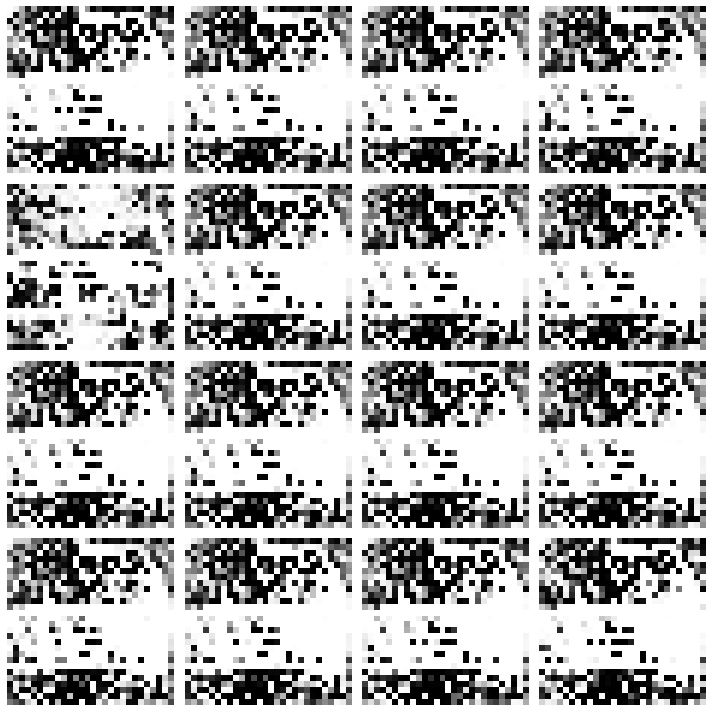

epoch: 18401, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18402, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18403, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18404, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18405, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18406, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18407, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18408, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18409, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18410, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18411, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18412, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

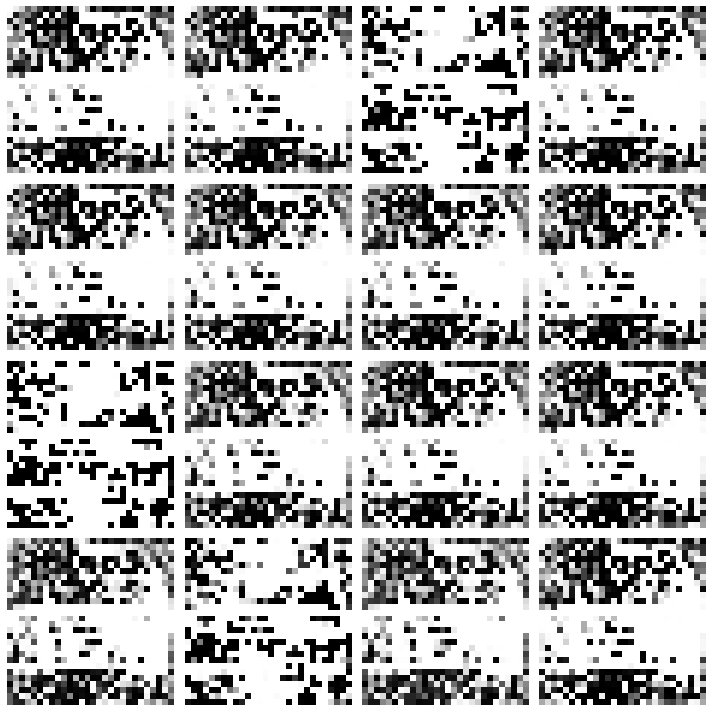

epoch: 18601, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18602, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18603, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18604, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18605, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18606, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18607, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18608, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18609, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18610, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18611, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18612, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

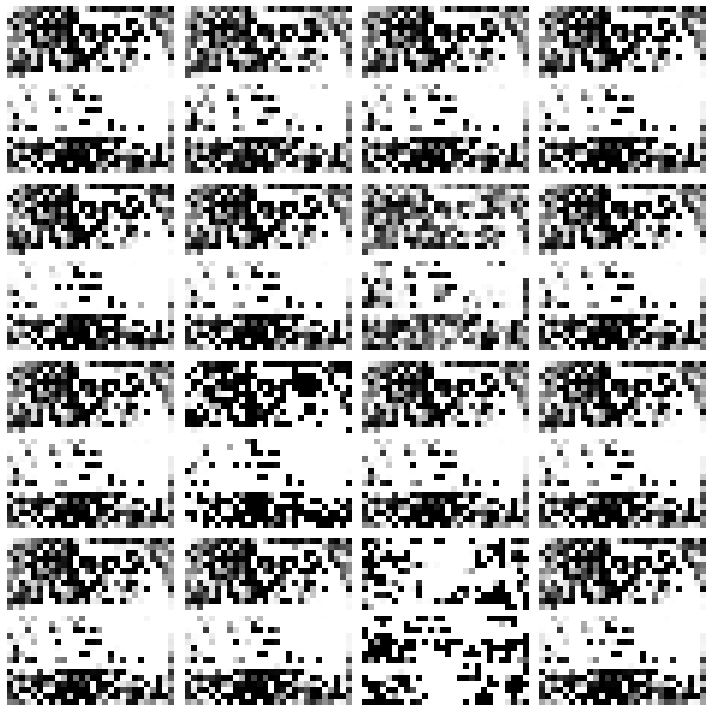

epoch: 18801, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18802, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18803, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18804, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18805, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18806, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18807, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18808, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18809, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18810, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18811, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 18812, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

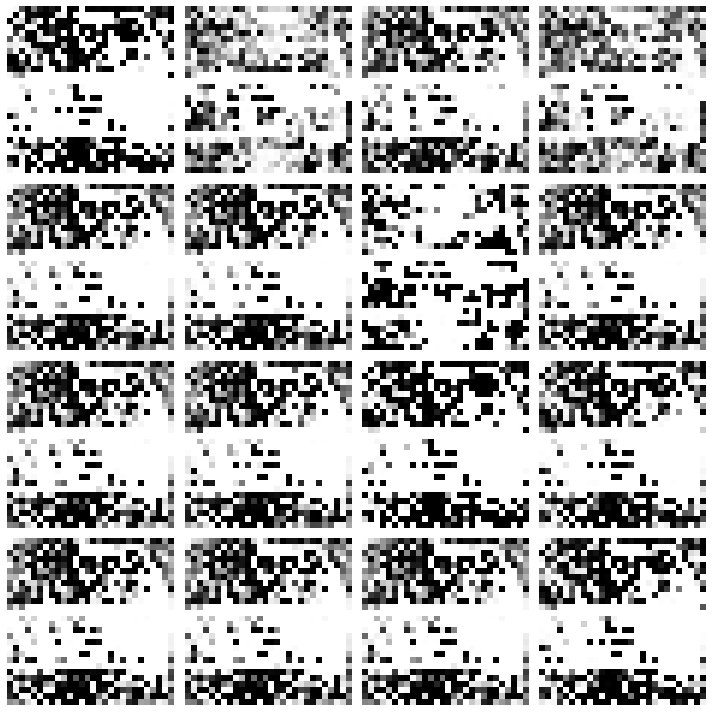

epoch: 19001, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19002, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19003, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19004, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19005, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19006, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19007, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19008, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19009, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19010, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19011, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19012, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

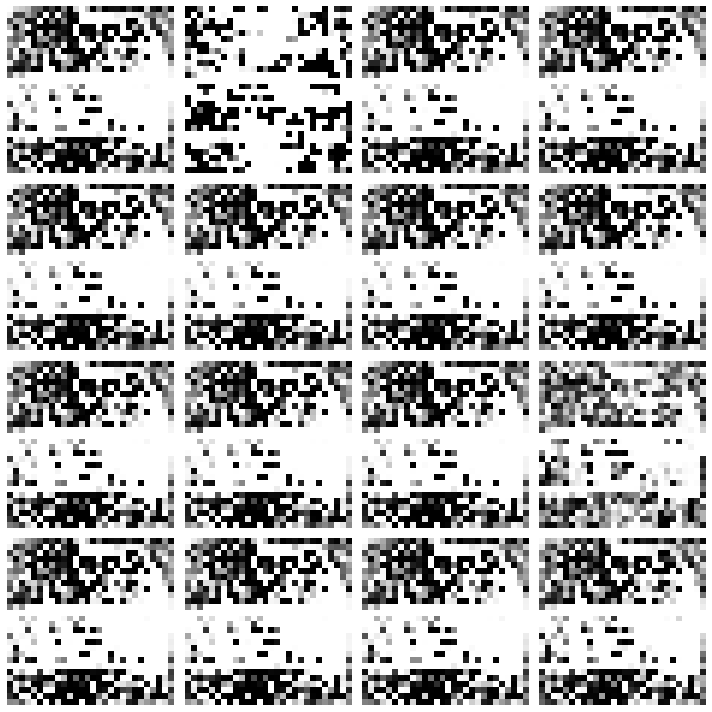

epoch: 19201, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19202, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19203, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19204, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19205, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19206, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19207, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19208, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19209, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19210, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19211, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19212, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

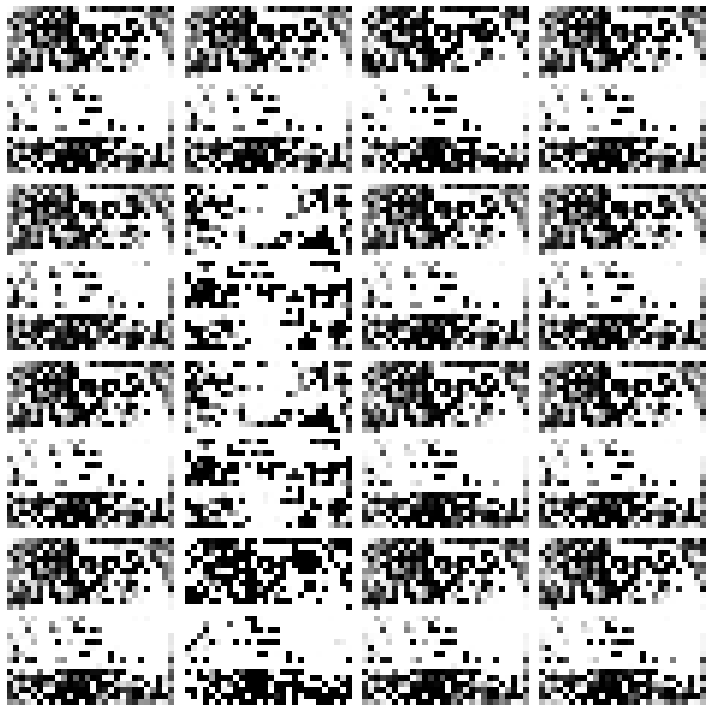

epoch: 19401, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19402, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19403, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19404, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19405, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19406, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19407, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19408, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19409, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19410, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19411, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19412, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

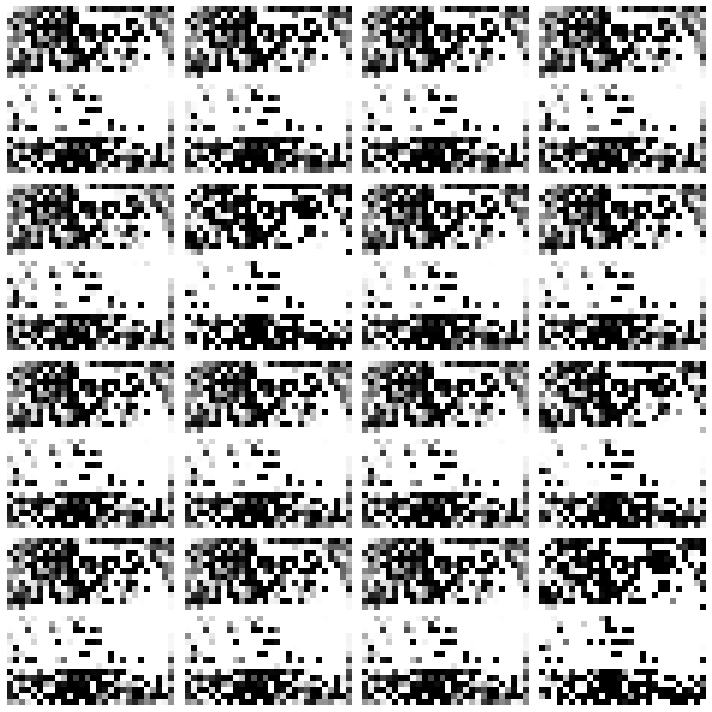

epoch: 19601, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19602, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19603, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19604, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19605, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19606, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19607, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19608, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19609, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19610, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19611, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19612, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

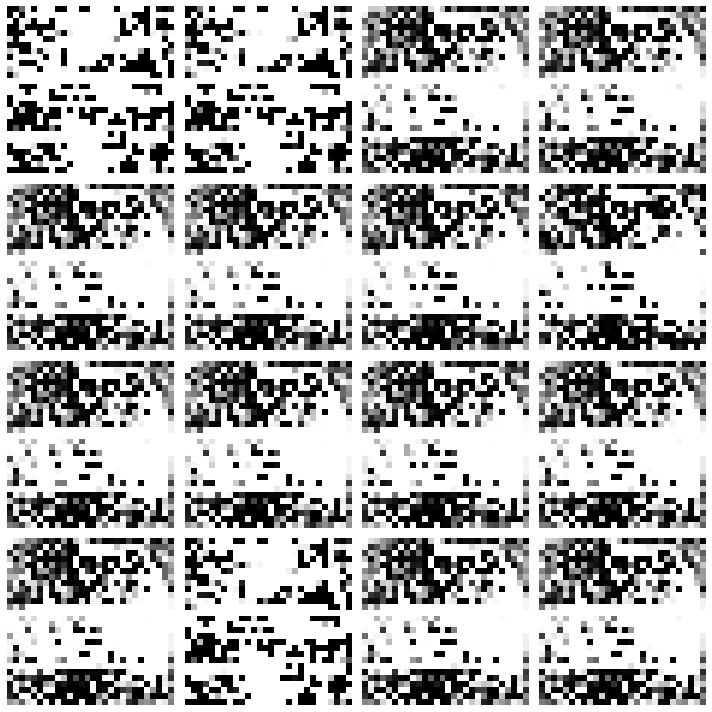

epoch: 19801, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19802, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19803, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19804, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19805, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19806, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19807, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19808, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19809, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19810, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19811, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoch: 19812, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]
epoc

In [0]:
# Proceso de entrenamiento

batch = 32 # tamaño del batch
epochs = 20000 # número de iteracione
interval = 200 # cada cuanto se comprueba

for cnt in range(epochs):
  ## Entrenar Discriminador

  idx =  np.random.randint(0, len(X_train) - int(batch/2))
  real_images = X_train[idx : idx + int(batch/2)].reshape(int(batch/2), WIDTH, HEIGHT, CHANNELS)
  noise = np.random.normal(0, 1, (int(batch/2),NOISE_SIZE))
  fake_images = gnrtr.predict(noise)
  x_mixed = np.concatenate((real_images, fake_images))
  y_mixed = np.concatenate((np.ones((int(batch/2), 1)), np.zeros((int(batch/2), 1)))) # 1 a las imagenes reales, 0 a las falsas
  dscrmntr_loss = dscrmntr.train_on_batch(x_mixed, y_mixed)


  # train generator

  noise = np.random.normal(0, 1, (batch,NOISE_SIZE))
  y_target = np.ones((batch, 1))
  gnrtr_loss = model.train_on_batch(noise, y_target)
  print ('epoch: %d, [Discriminator :: d_loss: %f], [ Generator :: loss: %f]' % (cnt, dscrmntr_loss[0], gnrtr_loss))
  if cnt % interval == 0 : 
    plot_images(gnrtr=gnrtr, step=cnt)

In [0]:
# Solution: https://www.kaggle.com/sgamez/fashion-ac-gan-with-keras
# https://github.com/eriklindernoren/Keras-GAN/blob/master/acgan/acgan.py